In [1]:
import sys
sys.path.append('/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana')

In [2]:
#..MODIFIED BY CHUYAN at Feb.15th, this file was intended to re-plot some former figures in a better way

import netCDF4
from numpy import *
import matplotlib.pyplot as plt
import xarray as xr
import PyNIO as Nio
import pandas as pd
import glob
from scipy.stats import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from area_mean import *
from scipy.optimize import curve_fit
import seaborn as sns
from useful_func_cy import *

In [82]:
import os

os.getcwd()

'/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana'

In [83]:
deck_nas  = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']
#..deck_nas  =    ['CESM2']
exp = 'piControl'

ACCESSCM2 = {'modn': 'ACCESS-CM2', 'consort': 'CSIRO-ARCCSS', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..dont have 'clwvi' variable, even in esgf-node website
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
        'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CNRMCM6 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}# time doesn't corresponding for 'evspsbl' in  'pi-Control' exper
CNRMESM2 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# repaired Dec.30th

GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
           'exper': 'abrupt-4xCO2', 'ensmem': 'r1i1p1f3', 'gg': 'gn', "typevar": 'Amon'}   #  Be careful, failure due to 'day time representation'
HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
            'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp

INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
INM_CM50 = {'modn': 'INM-CM5-0', 'consort': 'INM', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}#..'/glade/' dont have 'Amon' typevar

IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MIROCES2L= {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}   # dont have
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NORESM2LM = {'modn': 'NorESM2-LM', 'consort': 'NCC', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}# 'pr' variable start at 130th yr in 'abrupt-4xCO2', while other variable start at 0th yr

SAM0={'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}


UKESM10 = {'modn': 'UKESM1-0-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}   # the same day time representation issue as 'HadGEM3'
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..'abrupt-4xCO2' missing variables
CMCC = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6',
        'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'} #..'/glade/' dont have 'abrupt-4xCO2'/'piControl' exper
ECE = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'} #..dont have 'Amon' or variable 'tas'
#ECE has different variants for exper
ECEV = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}#..too hard to operate
# (ECEV has very discrete year in 'abrupt-4xCO2', seems continued but each in one yr file in 'piControl')


In [84]:
deck2 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0]   #..current # 18  E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1,INM_CM48, MPIESM12LR
deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']  # 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1','INM_CM48', 'MPIESM12LR'
#.. 18 models now

path1 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/'
path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/plot_file/'


In [85]:
## PLot 1 # read data for ordinary, 1-lrm(not best):

# deck_nas2 = ['CESM2']
#.. 18 models now

# deck2 = [CESM2]

output_ARRAY = {}   # storage output file
output_intermedia = {}   # storage the 'rawdata_dict'

output_dict0_PI = {}
output_dict0_abr = {}

output_GMT =  {}
output_2lrm_predicted = {}  # dict, store annualy, area_meaned prediction of variables: LWP,IWP, rsut,rsut_lL, albedo,albedo_lL
output_2lrm_report = {}  # dict, store annually, area_meaned actual values of GCMs output: LWP, IWP, rsut, albedo
output_2lrm_coef_LWP = {}
output_2lrm_coef_albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
# output_2lrm_coef_albedo_lL = {}
output_2lrm_coef_rsut = {}

# Report data: dictionaries
output_2lrm_yr_bin_abr =  {}
output_2lrm_yr_bin_PI  =  {}
output_2lrm_mon_bin_abr =  {}
output_2lrm_mon_bin_PI  =  {}   # above are 3d-strcture array
output_2lrm_flavra_abr =  {}
output_2lrm_flavra_PI  =  {}   # were monthly data in 1-d

# Predicted data: currently 'albedo_lL'
output_2lrm_mon_bin_predi_PI =  {}   # were monthly data in 1-d
output_2lrm_mon_bin_predi_abr = {}

# Statistic metrics for prediction: currently 'albedo_lL'
output_2lrm_stats_PI_rsut_lL = {}
output_2lrm_stats_abr_rsut_lL = {}
output_2lrm_stats_PI_albedo_lL = {}
output_2lrm_stats_abr_albedo_lL = {}


# Threshold conditions:
# Tr_sst = 271.79

for i in range(len(deck2)):
    folder_2lrm = glob.glob(path1+ deck2[i]['modn']+'_swrpredi(largestpiR2)_' +'*' +'_dats.npz')
    print(folder_2lrm)
    if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
        folder_best2lrm = folder_2lrm[1]
    else:
        folder_best2lrm = folder_2lrm[0]
    print(folder_best2lrm)
    
    output_ARRAY[deck_nas2[i]] = load(folder_best2lrm, allow_pickle=True)
    # output_ARRAY[deck_nas2[i]] =  load(path1+deck2[i]['modn']+'_swrpredi_'+ '*' +'_dats.npz', allow_pickle=True)  #+'_'+str(Tr_sst)
    
    output_intermedia[deck_nas2[i]] = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    
    
    output_dict0_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_PI_var']
    output_dict0_abr[deck_nas2[i]]= output_intermedia[deck_nas2[i]][()]['dict1_abr_var']
    
    output_GMT[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['GMT']
    output_2lrm_predicted[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['predicted_metrics']
    output_2lrm_report[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['report_metrics']
    output_2lrm_coef_LWP[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['Coef_dict']
    output_2lrm_coef_albedo[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['Coef_dict_albedo']

    output_2lrm_coef_rsut[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['Coef_dict_rsut']

    
    # Monthly data dict
    output_2lrm_mon_bin_PI[deck_nas2[i]]  =   output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']
    output_2lrm_mon_bin_abr[deck_nas2[i]]  =  output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    # Annually data dict
    output_2lrm_yr_bin_PI[deck_nas2[i]]  =   output_dict0_PI[deck_nas2[i]]['dict1_yr_bin_PI']
    output_2lrm_yr_bin_abr[deck_nas2[i]]  =  output_dict0_abr[deck_nas2[i]]['dict1_yr_bin_abr']
    # Flattened Report monthly data dict
    output_2lrm_flavra_PI[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict2_predi_fla_PI']
    output_2lrm_flavra_abr[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict2_predi_fla_abr']

    # Flattened Predicted monthly data
    output_2lrm_mon_bin_predi_PI[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['albedo_lL_predi_bin_PI']
    output_2lrm_mon_bin_predi_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['albedo_lL_predi_bin_abr']

    
    # Statistic metrics measures the predictions
    output_2lrm_stats_PI_rsut_lL[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['stats_dict_PI_rsut_lL']
    output_2lrm_stats_abr_rsut_lL[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['stats_dict_abr_rsut_lL']
    output_2lrm_stats_PI_albedo_lL[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['stats_dict_PI_albedo_lL']
    output_2lrm_stats_abr_albedo_lL[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['stats_dict_abr_albedo_lL']

print('Done read 2-LRM file(s)')

['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/BCC-ESM1_swrpredi(largestpiR2)_270.46_dats.npz', '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/BCC-ESM1_swrpredi(largestpiR2)_270.46K_ud-0.16_dats.npz']
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/BCC-ESM1_swrpredi(largestpiR2)_270.46_dats.npz
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CanESM5_swrpredi(largestpiR2)_256.87_dats.npz', '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CanESM5_swrpredi(largestpiR2)_256.87K_ud-0.8_dats.npz']
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CanESM5_swrpredi(largestpiR2)_256.87_dats.npz
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CESM2_swrpredi(largestpiR2)_269.42K_ud0.62_dats.npz', '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CESM2_swrpredi(largestpiR2)_269.42_dats.n

In [86]:
print(output_2lrm_coef_albedo['CESM2'])

[[array([-0.73681642]) 0.662725819880535]
 [array([0.87959449]) 0.3200557459037093]]


In [87]:
print(output_2lrm_stats_abr_albedo_lL[deck_nas2[2]])

print('  ')

print(output_2lrm_stats_PI_albedo_lL[deck_nas2[2]])

{'shape1': [0.07514181602223595, 0.5564230537708232], 'shape6': [0.07542205942274191, 0.11781361521390243], 'shape7': [0.0743597211074422, -0.0046245071227135615]}
  
{'shape1': [0.06378519501698075, 0.718913628831163], 'shape6': [0.06484247041155332, 0.08146538515437451], 'shape7': [0.06222524139830945, 0.14250657770464603]}


In [88]:
## PLot 1' # read data for best fit, 4-lrm:

# deck  = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, E3SM10, GFDLCM4,GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0]
#deck   =  [CESM2]

output_ARRAY_best4 = {}   # storage output file
output_intermedia_best4 = {}   # storage the 'rawdata_dict'

output_dict0_PI_best4 = {}
output_dict0_abr_best4 = {}

output_GMT =  {}
output_4lrm_predicted = {}  # dict, store annualy, area_meaned prediction of variables: LWP,IWP, rsut,rsut_lL, albedo,albedo_lL
output_4lrm_report = {}  # dict, store annually, area_meaned actual values of GCMs output: LWP, IWP, rsut, albedo
output_4lrm_coef_LWP = {}
output_4lrm_coef_albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
# output_4lrm_coef_albedo_lL = {}
output_4lrm_coef_rsut = {}

# Report data: dictionaries
output_4lrm_yr_bin_abr =  {}
output_4lrm_yr_bin_PI  =  {}
output_4lrm_mon_bin_abr =  {}
output_4lrm_mon_bin_PI  =  {}   # above are 3d-strcture array
output_4lrm_flavra_abr =  {}
output_4lrm_flavra_PI  =  {}   # were monthly data in 1-d

# Predicted data: currently 'albedo_lL'
output_4lrm_mon_bin_predi_PI =  {}   # were monthly data in 1-d
output_4lrm_mon_bin_predi_abr = {}

# Statistic metrics for prediction: currently 'albedo_lL'
output_4lrm_stats_PI_rsut_lL = {}
output_4lrm_stats_abr_rsut_lL = {}
output_4lrm_stats_PI_albedo_lL = {}
output_4lrm_stats_abr_albedo_lL = {}


TR_sst =  271.79
TR_sub =  1.0

for j in range(len(deck2)):
    # Best fit_files:
    folder_4lrm =  glob.glob(path1 +deck2[j]['modn']+'_swrpredi(largestpiR2)_' + '*K'+'_ud'+'*'+'_dats.npz')
    print(folder_4lrm)
    output_ARRAY_best4[deck_nas2[j]] =  load(folder_4lrm[0], allow_pickle=True)  # str(TR_sst)+str(TR_sub) 

    
    # defined Thresholds files:
    # output_ARRAY_best4[deck_nas2[j]] =  load(path1+deck2[j]['modn']+'_swrpredi_'+ str(TR_sst)+'K'+'_ud'+ str(TR_sub)+ '_dats.npz', allow_pickle=True)  
    output_intermedia_best4[deck_nas2[j]] = output_ARRAY_best4[deck_nas2[j]]['rawdata_dict']
    
    output_dict0_PI_best4[deck_nas2[j]] = output_intermedia[deck_nas2[j]][()]['dict1_PI_var']
    output_dict0_abr_best4[deck_nas2[j]]= output_intermedia[deck_nas2[j]][()]['dict1_abr_var']

    
    output_GMT[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['GMT']
    output_4lrm_predicted[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['predicted_metrics']
    output_4lrm_report[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['report_metrics']
    output_4lrm_coef_LWP[deck_nas2[j]] =  output_intermedia_best4[deck_nas2[j]][()]['Coef_dict']
    output_4lrm_coef_albedo[deck_nas2[j]] =  output_intermedia_best4[deck_nas2[j]][()]['Coef_dict_albedo']

    output_4lrm_coef_rsut[deck_nas2[j]] =  output_intermedia_best4[deck_nas2[j]][()]['Coef_dict_rsut']

    
    # Monthly data dict
    output_4lrm_mon_bin_PI[deck_nas2[j]]  =   output_dict0_PI_best4[deck_nas2[j]]['dict1_mon_bin_PI']
    output_4lrm_mon_bin_abr[deck_nas2[j]]  =  output_dict0_abr_best4[deck_nas2[j]]['dict1_mon_bin_abr']
    # Annually data dict
    output_4lrm_yr_bin_PI[deck_nas2[j]]  =   output_dict0_PI_best4[deck_nas2[j]]['dict1_yr_bin_PI']
    output_4lrm_yr_bin_abr[deck_nas2[j]]  =  output_dict0_abr_best4[deck_nas2[j]]['dict1_yr_bin_abr']
    # Flattened Report monthly data dict
    output_4lrm_flavra_PI[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['dict2_predi_fla_PI']
    output_4lrm_flavra_abr[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['dict2_predi_fla_abr']

    # Flattened Predicted monthly data
    output_4lrm_mon_bin_predi_PI[deck_nas2[j]] =  output_intermedia_best4[deck_nas2[j]][()]['albedo_lL_predi_bin_PI']
    output_4lrm_mon_bin_predi_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['albedo_lL_predi_bin_abr']

    
    # Statistic metrics measures the predictions
    output_4lrm_stats_PI_rsut_lL[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_PI_rsut_lL']
    output_4lrm_stats_abr_rsut_lL[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_abr_rsut_lL']
    output_4lrm_stats_PI_albedo_lL[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_PI_albedo_lL']
    output_4lrm_stats_abr_albedo_lL[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_abr_albedo_lL']

print('Done read 4-LRM file(s)')

['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/BCC-ESM1_swrpredi(largestpiR2)_270.46K_ud-0.16_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CanESM5_swrpredi(largestpiR2)_256.87K_ud-0.8_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CESM2_swrpredi(largestpiR2)_269.42K_ud0.62_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CESM2-FV2_swrpredi(largestpiR2)_269.39K_ud2.34_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CESM2-WACCM_swrpredi(largestpiR2)_269.5K_ud1.0_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CNRM-ESM2-1_swrpredi(largestpiR2)_269.85K_ud-1.05_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/GISS-E2-1-G_swrpredi(largestpiR2)_273.87K_ud-0.06_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_

In [89]:
print(output_4lrm_stats_abr_albedo_lL[deck_nas2[2]])

print('  ')

print(output_4lrm_stats_PI_albedo_lL[deck_nas2[2]])

{'shape1': [0.07361363849447114, 0.5742818549062965], 'shape7': [0.07198226579406306, 0.012671451498039388], 'shape8': [0.06931916314169606, 0.11095049363994558], 'shape9': [0.07779466157562007, -0.06388522736828661], 'shape10': [0.08332203501748163, 0.061341302294165234]}
  
{'shape1': [0.06313277844991165, 0.7246343149959333], 'shape7': [0.0623194162990817, 0.14987773480716815], 'shape8': [0.06178609610825142, 0.09166620329929065], 'shape9': [0.06087629573000855, 0.05016904240375519], 'shape10': [0.07060531377965645, 0.04269160121146531]}


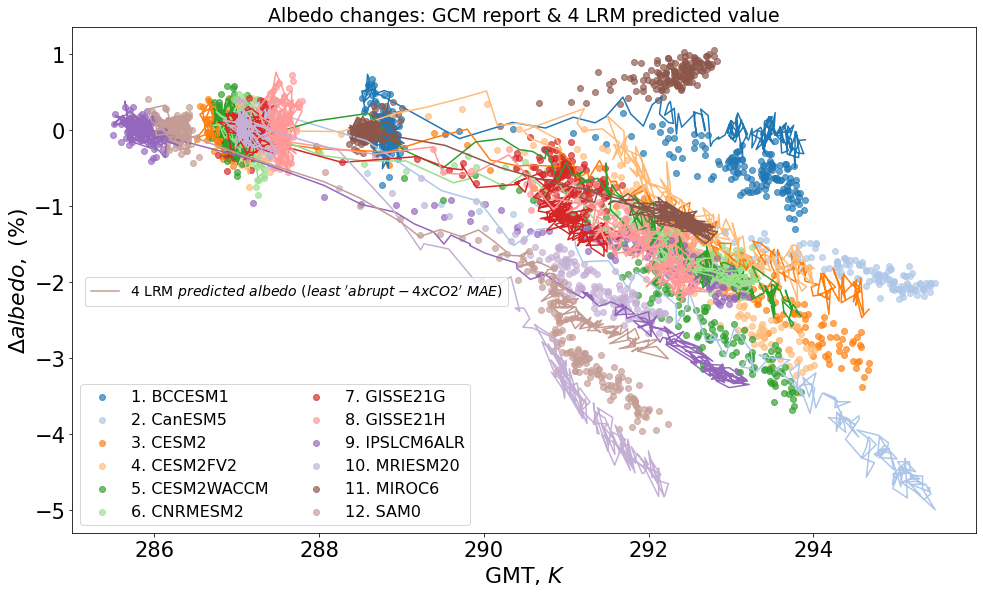

In [90]:
## PLot 1,2 #...pi-C + Abr Plot:

parameters = {'axes.labelsize': 22, 'legend.fontsize': 18,
         'axes.titlesize': 19,  'xtick.labelsize': 21,  'ytick.labelsize':21 }
plt.rcParams.update(parameters)

fig1, ax1  = plt.subplots(1, 1, figsize = (16.2, 9.3))  #(17.8, 12.6))

# These are the colors that will be used in the plot
my_colors= array([
        '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
        '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
        '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
        '#17becf', '#9edae5'])   #..plt.rcParams['axes.prop_cycle']()
my_colorst= my_colors


# dict, storage the annually, area_meaned prediction and actual values of variables: 
output_dabrmeanpi_report = {}
output_dabrmeanpi_report2 = {}
output_dabrmeanpi_predicted = {}

# print(output_2lrm_mon_bin_PI[deck_nas2[a]]['LWP_mon_bin'][0:99,:,:])

# Added a random value (s=1) to separate the lines 
at = random.rand(18)* 3.0
b = "4 LRM"

shape_yr_modelPI = 99
plot_lines1 = []
plot_lines2 = []

#..set are-mean range and define function
x_range  = arange(-180., 180., 5.)   #..logitude sequences edge: number:73
y_range  = arange(-85, -40, 5.) +2.5   #..southern-ocaen latitude edge:10

output_2report_pi  = {}
output_2report_abr ={}

for a in range(len(deck2)):
    
    GMT = 0
    Yrs = 0
    GMT_pxy = 0
    
    output_2report_pi[deck_nas2[a]] = area_mean(get_annually_metric(output_4lrm_mon_bin_PI[deck_nas2[a]]['albedo_mon_bin'][0:99*12,:,:], 99*12, 9, 72), y_range, x_range)
    output_2report_abr[deck_nas2[a]] = area_mean(get_annually_metric(output_4lrm_mon_bin_abr[deck_nas2[a]]['albedo_mon_bin'][0:150*12,:,:], 150*12, 9, 72), y_range, x_range) 
    
    # if deck_nas2[a]=='CESM2':   #.. FGOALSg3
    #if (deck_nas2[a] == 'E3SM10') or (deck_nas2[a]== 'BCCESM1') or (deck_nas2[a] =='GFDLCM4'): 
    ##..if deck_nas2[a]=='BCCESM1' or deck_nas2[a]=='CanESM5' or deck_nas2[a]=='GISSE21H' or deck_nas2[a]=='GISSE21G':
    # output_yrs[deck_nas2[a]]  = arange(shape_yr_modelPI + shape_yr_modelabr[deck_nas2[a]])


    output_dabrmeanpi_report[deck_nas2[a]] =  100. *(output_4lrm_report[deck_nas2[a]]['albedo'][0:] - nanmean(output_4lrm_report[deck_nas2[a]]['albedo'][0:shape_yr_modelPI]))
    output_dabrmeanpi_report2[deck_nas2[a]] = 100.* (concatenate([output_2report_pi[deck_nas2[a]][0:99], output_2report_abr[deck_nas2[a]][0:150]], axis = 0) - nanmean(output_2report_pi[deck_nas2[a]][0:99]))
    output_dabrmeanpi_predicted[deck_nas2[a]] = 100. *(output_4lrm_predicted[deck_nas2[a]]['albedo'][0:] - nanmean(output_4lrm_predicted[deck_nas2[a]]['albedo'][0:shape_yr_modelPI]))


    # Plotting section:
    # ax5.scatter(output_yrs[deck_nas2[a]][0:249], output_dabrmeanpi_report[deck_nas2[a]][0:249], alpha = .35, c = my_colors[a-9], label = str(a+1)+'. '+ deck_nas2[a], zorder=0) 
    ax1.scatter(output_GMT[deck_nas2[a]][0:249], output_dabrmeanpi_report2[deck_nas2[a]][0:249], alpha = .675, c = my_colors[a], label = str(a+1)+'. '+ deck_nas2[a], zorder=0)   #, move the line a little, +at[a]
    l2, = ax1.plot(output_GMT[deck_nas2[a]][0:249], output_dabrmeanpi_predicted[deck_nas2[a]][0:249], c = my_colors[a]) #.., label='predict change: '+deck_nas2[a]+ f': 2LRM: TR_sst= {Tr_sst}K' 
    plot_lines2.append(l2)

    GMT = output_GMT[deck_nas2[a]][0:249]
    Yrs = arange(0, 250)

    GMT_pxy = linspace(min(GMT[99:249]), max(GMT[99:249]), 150)
    GMT_pxy = append(GMT[0:99], GMT_pxy)

    # plot fitting lines of report values:
    # parameter = polyfit(GMT[0:249], output_dabrmeanpi_report2[deck_nas2[a]][0:249], 3)
    # y2 = parameter[0]*GMT**3 + parameter[1]*GMT**2 +parameter[2]*GMT + parameter[3]
    # l1, = ax1.plot(GMT, 1000.* y2, alpha = 1.0, linewidth= 2.40,  c = my_colors[a], zorder = 2) # , label='Best fit of '+ deck_nas2[a]
    # plot_lines1.append(l1)

    # plot fitting lines of predicted values
    # parameter2 = polyfit(GMT[0:249], output_dabrmeanpi_predicted[deck_nas2[a]][0:249], 3)
    # y3 = parameter2[0]*GMT_pxy**3 + parameter2[1]*GMT_pxy**2 + parameter2[2]*GMT_pxy + parameter2[3]
    # l2, = ax1.plot(GMT_pxy, y3, alpha = 1.0, linewidth = 2.20, linestyle='-.', c = my_colors[a], zorder = 3)
    # plot_lines2.append(l2)


plt.xlabel('GMT, '+ r'$K$' )
plt.ylabel(r'$\Delta albedo,\ $' + r'$(\%)$') 
plt.title(" Albedo changes: GCM report & "+ b + " predicted value ")

# legend and Add additional legends:
#legend1 = plt.legend([ plot_lines1[-1], plot_lines2[-1]], [ r'$\ polyfit\ of\ GCM\ \Delta LWP$', ' smoothed 4lrm'], loc='upper right', bbox_to_anchor=(0.32, 00.54), fontsize =19) # bboxtoanchor(argu: x, y, width, height)
legend1 = plt.legend([plot_lines2[-1]], [ b +r"$\ predicted\ albedo\ (least\ 'abrupt-4xCO2'\ MAE)$"], loc='upper right', bbox_to_anchor=(0.49, 0.52), fontsize = 14) # bboxtoanchor(argu: x, y, width, height) 

plt.legend(loc='lower left', ncol =2, borderpad=0.34, fontsize = 16)
plt.gca().add_artist(legend1)


# save the last value of report /predicted values

lyr_abr_actual  =[]
lyr_abr_predict  =[]
for i in range(len(deck_nas2)):
    
    lyr_abr_actual.append(area_mean(get_annually_metric(output_4lrm_mon_bin_abr[deck_nas2[i]]['albedo_mon_bin'][0:150*12,:,:], 150*12, 9, 72), y_range, x_range)[-1])
    # print(output_2lrm_report[deck_nas2[i]]['albedo'])
    # print(output_2lrm_predicted[deck_nas2[i]]['albedo_lL'])
    lyr_abr_predict.append(output_4lrm_predicted[deck_nas2[i]]['albedo_lL'][-1])
    

# plt.savefig(path6+"plot_swradiation_lwpbest4lrm", dpi = 250)

[[ 104.28737502]
 [-166.575146  ]
 [  87.95944947]
 [  97.3931355 ]
 [  88.44534799]
 [  20.82572611]
 [  60.71696988]
 [  69.93529468]
 [ -51.37405089]
 [-162.75577427]
 [ -35.84034626]
 [ -57.25632245]]
[[ 104.28737502 -166.575146     87.95944947   97.3931355    88.44534799
    20.82572611   60.71696988   69.93529468  -51.37405089 -162.75577427
   -35.84034626  -57.25632245]
 [ -48.34364046 -380.38024491  -73.68164182  -77.45478037  -71.17184809
  -362.41489836  -89.40862893  -54.67175461 -131.83037264 -137.05406867
   -57.70740319 -207.72241945]]


Text(0.5, 1.0, '2 LRM$\\ Coef\\ of\\ \\frac{\\Delta albedo} {\\Delta lwp},\\ Unit\\ in\\ \\frac{\\%}{Kg*m^{-2}}$')

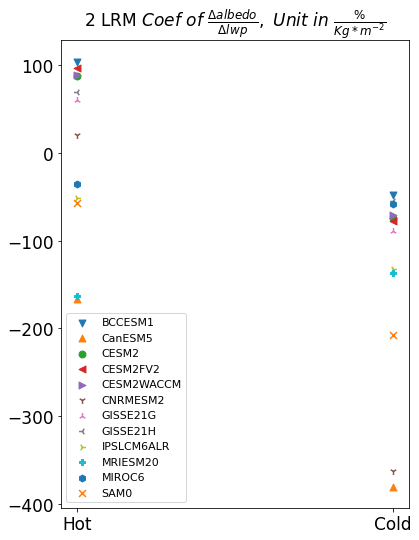

In [91]:
# coefs: 2 lrm 
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 18, 'legend.fontsize': 11, 
       'axes.titlesize': 17, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

fig2, ax2  = plt.subplots(1, 1, figsize =(6.24, 8.6))  # (16.2, 9.3))


b = "2 LRM"
x_15yr = linspace(0.0005, 0.018, 18) *1000.  #..15 yr
y_15yr = x_15yr
x   = linspace(0.002, 0.031, 18) * 1000.   # for all 150yr
y   = x

deck_marker = ['v', '^', 'o', '<', '>', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
# n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

# put into pandas DataFrame structure:
stcoef1 = []
stcoef2 = []
for i in arange(len(deck_nas2)):
    stcoef1.append(output_2lrm_coef_albedo[deck_nas2[i]][0][0])
    stcoef2.append(output_2lrm_coef_albedo[deck_nas2[i]][1][0])
stcoef1 = asarray(stcoef1) * 100
stcoef2 = asarray(stcoef2) * 100

print(stcoef2)
d1 = {'col1': arange(0, 12), 'value': stcoef1.ravel(), 'Regimes': array(['Cold']*12 )}
data1  = pd.DataFrame(data=d1, index=arange(0, 12*1))

d2 = {'col1': arange(0, 12), 'value': stcoef2.ravel(), 'Regimes': array(['Hot' ]*12 )}
data2  = pd.DataFrame(data=d2, index = arange(0, 12*1))
print(asarray([stcoef2, stcoef1]).reshape(2, 12))

for j in arange(len(deck_nas2)):
    
    plt.scatter([1, 2], [stcoef2[j], stcoef1[j]], marker = deck_marker[j], label = deck_nas2[j], s= 48)
plt.xticks([1, 2], ['Hot', 'Cold'])
plt.legend()
plt.title(b + r"$\ Coef\ of\ \frac{\Delta albedo} {\Delta lwp},\ Unit\ in\ \frac{\%}{Kg*m^{-2}}$")

# plt.savefig(path6+ "plot_Coef_2lrm_dalbedodlwp", dpi = 250)

[[  76.02667103]
 [-160.22763641]
 [  78.09761291]
 [  96.53046336]
 [  80.58216631]
 [ -18.58873845]
 [  43.73804519]
 [  57.87608138]
 [ -56.29188101]
 [-160.36639728]
 [ -35.33396128]
 [ -66.0605823 ]]
[[  76.02667103 -160.22763641   78.09761291   96.53046336   80.58216631
   -18.58873845   43.73804519   57.87608138  -56.29188101 -160.36639728
   -35.33396128  -66.0605823 ]
 [ -41.35306999 -323.42531775  -67.08705281  -75.07715049  -65.19011759
  -299.23740788  -81.16831652  -48.38270835  -95.33501204 -101.49836528
   -39.77686568 -188.62853299]]


Text(0.5, 1.0, '4 LRM$\\ Coef\\ of\\ \\frac{\\Delta albedo} {\\Delta lwp},\\ Unit\\ in\\ \\frac{\\%}{Kg*m^{-2}}$')

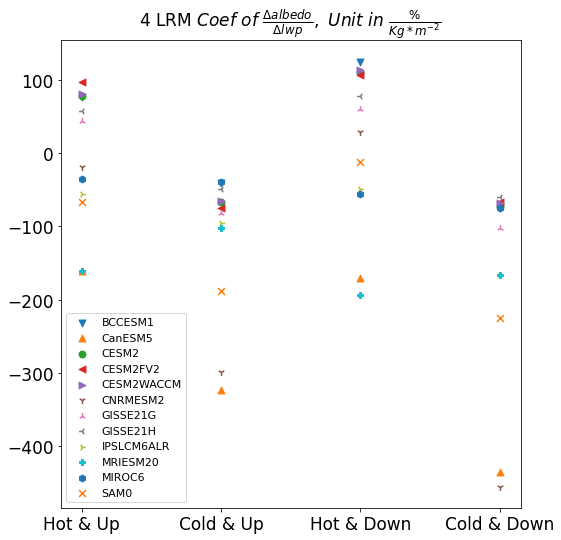

In [92]:
# coefs: 4 lrm
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 18, 'legend.fontsize': 11, 
       'axes.titlesize': 17, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

fig2, ax2  = plt.subplots(1, 1, figsize =(8.24, 8.6))  # (16.2, 9.3))


b = "4 LRM"
x_15yr = linspace(0.0005, 0.018, 18) *1000.  #..15 yr
y_15yr = x_15yr
x   = linspace(0.002, 0.031, 18) * 1000.   # for all 150yr
y   = x

deck_marker = ['v', '^', 'o', '<', '>', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
# n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

# put into pandas DataFrame structure:
stcoef1 = []
stcoef2 = []
stcoef3 = []
stcoef4 = []

for i in arange(len(deck_nas2)):
    stcoef1.append(output_4lrm_coef_albedo[deck_nas2[i]][0][0])
    stcoef2.append(output_4lrm_coef_albedo[deck_nas2[i]][1][0])
    stcoef3.append(output_4lrm_coef_albedo[deck_nas2[i]][2][0])
    stcoef4.append(output_4lrm_coef_albedo[deck_nas2[i]][3][0])
stcoef1 = asarray(stcoef1) * 100
stcoef2 = asarray(stcoef2) * 100
stcoef3 = asarray(stcoef3) * 100
stcoef4 = asarray(stcoef4) * 100
print(stcoef2)

d1 = {'col1': arange(0, 12), 'value': stcoef1.ravel(), 'Regimes': array(['Cold & Up']*12 )}
data1  = pd.DataFrame(data=d1, index=arange(0, 12*1))

d2 = {'col1': arange(0, 12), 'value': stcoef2.ravel(), 'Regimes': array(['Hot & Up']*12 )}
data2  = pd.DataFrame(data=d2, index = arange(0, 12*1))
d3 = {'col1': arange(0, 12), 'value': stcoef3.ravel(), 'Regimes': array(['Cold & Down']*12 )}
data3  = pd.DataFrame(data=d3, index=arange(0, 12*1))

d4 = {'col1': arange(0, 12), 'value': stcoef4.ravel(), 'Regimes': array(['Hot & Down']*12 )}
data4  = pd.DataFrame(data=d4, index = arange(0, 12*1))
print(asarray([stcoef2, stcoef1]).reshape(2, 12))

for j in arange(len(deck_nas2)):
    
    plt.scatter([1, 2, 3, 4], [stcoef2[j], stcoef1[j], stcoef4[j], stcoef3[j]], marker = deck_marker[j], label = deck_nas2[j], s= 48)
plt.xticks([1, 2, 3, 4], ['Hot & Up', 'Cold & Up', 'Hot & Down', 'Cold & Down'])
plt.legend()
plt.title(b + r"$\ Coef\ of\ \frac{\Delta albedo} {\Delta lwp},\ Unit\ in\ \frac{\%}{Kg*m^{-2}}$")

# plt.savefig(path6+ "plot_Coef_4lrm_dalbedodlwp", dpi = 250)

In [16]:
## PLot 3: coefficient plot for 0k(1-LRM) OR 2-lrm

# calc data (monthly) standard deviation:

sigma1 = full((len(deck2), 4), 0.0)
sigma2 = full((len(deck2), 4), 0.0)

coef1 =  []
coef2 =  []
stcoef1 = full((len(deck2), 4), 0)
stcoef2 = full((len(deck2), 4), 0)
itcp1 =  []
itcp2 =  []

dX_dTg1  = full((len(deck2), 4), 0.000)
dX_dTg2  = full((len(deck2), 4), 0.000)

dX_dTg_modelresponse = full(len(deck2), 0.000)
f5yr_index = [0*12*730, 5*12*730]
l5yr_index = [145*12*730+1, 150*12*730]

for i in range(len(deck2)):
    
    ind1 = isnan(output_2lrm_flavra_PI[deck_nas2[i]]['LTS'])==False

    ind_true = nonzero(ind1==True)
    ind_false = nonzero(ind1==False)
    #..Sign the the indexing into YB, or YB value will have a big changes
    # print('shape2: ', array(ind_true).shape)        # shape2
    #  print(argwhere(isnan(dict2_predi_fla_PI['LTS'][ind_true])==True))
    
    '''
    ## TR_sst, TR_sub
    folder_2lrm = glob.glob(path1+deck2[i]['modn']+'_best(test5)fit_' +'*' +'_dats.npz')
    if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
        folder_best2lrm = folder_2lrm[1]
    else:
        folder_best2lrm = folder_2lrm[0]
    print(folder_best2lrm)
    
    index_st_sst = str(folder_best2lrm).index('fit') +4
    index_ed_sst = str(folder_best2lrm).index('_dats')
    print(list(folder_best2lrm)[index_st_sst], list(folder_best2lrm)[index_ed_sst])
    
    TR_sst = float(str(folder_best2lrm)[index_st_sst:index_ed_sst])
    print('TR_sst =', TR_sst)
    # TR_sub = 0.0
    '''
    
    # start calculating SD of CCFs on monthly scale:

    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    TR_sst = 0.0     # only for1-lrm
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sst_le  = nonzero(output_2lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst)
    ind_sst_st  = nonzero(output_2lrm_flavra_PI[deck_nas2[i]]['SST'] <  TR_sst)
    

    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true, ind_sst_le)
    # print('shape7: ', ind7.shape)   #.. points, shape7
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true, ind_sst_st)
    # print('shape8: ', ind8.shape)   #.. points, shape8
    
    
    ## calc standard_deviation for CCFs at PI:
    sigma1[i,:]  = array([nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SST'][ind7]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['p_e'][ind7]), 
                          nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['LTS'][ind7]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SUB'][ind7])])

    sigma2[i,:]  = array([nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SST'][ind8]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['p_e'][ind8]), 
                          nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['LTS'][ind8]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SUB'][ind8])])
    
    
    # Calc the Change of Standard deviation of CCFs in each regime with/ to the per degree change of air temperature changes
    # print(sigma1[i,:].shape)
    
    
    delta_LWP_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['LWP'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['LWP'][f5yr_index[0]:f5yr_index[1]])
    
    delta_SST_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['SST'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['SST'][f5yr_index[0]:f5yr_index[1]])
    delta_p_e_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['p_e'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['p_e'][f5yr_index[0]:f5yr_index[1]])
    delta_LTS_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['LTS'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['LTS'][f5yr_index[0]:f5yr_index[1]])
    delta_SUB_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['SUB'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['SUB'][f5yr_index[0]:f5yr_index[1]])
    
    delta_gmt_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['gmt'][l5yr_index[0]:l5yr_index[1]:730]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['gmt'][f5yr_index[0]:f5yr_index[1]:730])
    # print(delta_SST_l5_f5, delta_gmt_l5_f5)
    
    dX_dTg1[i,:]   =  array([delta_SST_l5_f5/delta_gmt_l5_f5, delta_p_e_l5_f5/delta_gmt_l5_f5, 
                            delta_LTS_l5_f5/delta_gmt_l5_f5, delta_SUB_l5_f5/delta_gmt_l5_f5]).flatten() /sigma1[i,:]
    
    # dX_dTg2[i,:]  =  
    
    
    # Calc the True model response of CLOUD LWP changes with/ to change of air temperature changes
    dX_dTg_modelresponse[i]  = 1000.*  delta_LWP_l5_f5 / delta_gmt_l5_f5


# print(dX_dTg1.shape, dX_dTg1)

## switch 'nan' points to 0
ind_sg1 = isnan(sigma2)== True
ind_sgtrue = nonzero(ind_sg1==True)
sigma2[ind_sgtrue] = 0.0
# print(sigma1, sigma2)


# Retrieved the 1/2-lrm coefficients:

for j in range(len(deck2)):
    a_le  = output_LRM_le[deck_nas2[j]][0].copy()
    a_lt  = output_LRM_lt[deck_nas2[j]][0].copy()
    
    a0_le = output_LRM_le[deck_nas2[j]][1]
    a0_lt = output_LRM_lt[deck_nas2[j]][1]
    
    coef1.append(array(a_le))
    coef2.append(array(a_lt))
    itcp1.append(array(a0_le))
    itcp2.append(array(a0_lt))
    
print(array(coef1), array(coef2), array(itcp1))

# product of monthly variations and coefficients
stcoef1 = ( 1000. * array(coef1))  * sigma1[i,:] 
stcoef2 = ( 1000. * array(coef2))  * sigma2[i,:] 
#print(stcoef2.shape, stcoef1)



# #Test d(SST)_d(gmt)
# regr2 = linear_model.LinearRegression()
# # re_SST = regr2.fit(output_2lrm_flavra_abr[deck_nas2[0]]['gmt'].reshape(-1,1), output_2lrm_flavra_abr[deck_nas2[0]]['SST'])
# re_SST = regr2.fit(gmt_per10yr.reshape(-1,1), sst_per10yr)
# print(re_SST.intercept_, re_SST.coef_)


# Calc the CCF- Driven Change in Low Cloud LWP:
##.. Per Cloud Properties(lwp) changes to per degree change of air temperature changes for each Cloud Controling Factors: 
dC_dg_Cs =  stcoef1 * dX_dTg1

dC_dg_Cs_sum  = sum(dC_dg_Cs, axis = 1)

# print(dC_dg_Cs, dC_dg_Cs_sum)


CC_ccfdriven = append(dC_dg_Cs_sum.reshape(-1,1), dC_dg_Cs, axis =1)
# print(CC_ccfdriven)
# print(dX_dTg_modelresponse)

CC_ccfdriven_withtruemodel  = append(dX_dTg_modelresponse.reshape(-1, 1), CC_ccfdriven, axis=1)
# print(CC_ccfdriven_withtruemodel[:,:2], sum((CC_ccfdriven_withtruemodel[:,0] - nanmean(CC_ccfdriven_withtruemodel[:,0]))**2) /18.)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


[[ 2.37869544e-03  4.55390993e-02 -1.16072581e-03  8.12036901e-02]
 [ 1.58170067e-03  1.56069538e-02 -6.09283028e-04  3.32025522e-01]
 [ 2.47831802e-03  1.10754505e-02 -3.64025957e-04  1.82281643e-01]
 [ 2.17016405e-03  9.26951549e-03  6.79100862e-06  2.52433709e-01]
 [ 2.47129850e-03  1.10215750e-02 -3.41560476e-04  1.89853173e-01]
 [ 1.11396849e-03  1.22503763e-02  1.78066239e-04  1.96797846e-01]
 [ 2.06429065e-03  3.30420044e-02  5.32799196e-04 -4.99667571e-02]
 [ 2.09684390e-03  3.18582868e-02  9.25242821e-04 -8.41494952e-02]
 [ 2.27198240e-03  1.84610488e-02 -9.62166505e-04  2.05959206e-01]
 [ 2.31556117e-03  2.69833941e-02  1.13371918e-04  1.57887695e-01]
 [ 3.88325351e-03  4.25354358e-02  3.32612906e-04  4.60245841e-01]
 [ 1.07629404e-03  6.16173315e-03  5.86881373e-04  2.98022877e-01]
 [ 1.34420072e-03  1.20536151e-02  1.52319105e-05  5.11894149e-02]
 [ 2.18991795e-03  1.07119511e-02  3.06750193e-04  3.59495827e-02]
 [ 1.54855165e-03  1.34949077e-02  3.13790456e-05  2.57031690e

In [15]:
# calc annually data standard Deviation for 1/2-lrm:

sigma1_yr = full((len(deck2), 4), 0.0)
sigma2_yr = full((len(deck2), 4), 0.0)


stcoef1_yr = full((len(deck2), 4), 0)
stcoef2_yr = full((len(deck2), 4), 0)

# print(output_2lrm_yr_bin_abr[deck_nas2[1]])

for i in range(len(deck2)):
    
    ind1 = isnan(output_2lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'])==False

    ind_true = nonzero(ind1==True)
    ind_false = nonzero(ind1==False)
    #..Sign the the indexing into YB, or YB value will have a big changes
    # print('shape2: ', array(ind_true).shape)        # shape2
    #  print(argwhere(isnan(dict2_predi_fla_PI['LTS'][ind_true])==True))
    
    '''
    ## TR_sst, TR_sub
    folder_4lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test3)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_4lrm)
    index_st_sst = folder_4lrm[0].index('fit') +4

    index_ed_sst = folder_4lrm[0].index('K')
    print(list(folder_4lrm[0])[index_st_sst +4], list(folder_4lrm[0])[index_ed_sst])
    index_st_sub  = folder_4lrm[0].index('_ud') +4
    index_ed_sub  = folder_4lrm[0].index('_dats')

    TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
    TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))

    print('TR_sst= ', TR_sst)
    print('TR_sub= ', TR_sub)
    '''
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    TR_sst = 0.0     # only for 1-lrm
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sst_le  = nonzero(output_2lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'] >= TR_sst)
    ind_sst_st  = nonzero(output_2lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'] <  TR_sst)
    
    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true, ind_sst_le)
    # print('shape7: ', ind7)   #.. points, shape7
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true, ind_sst_st)
    # print('shape8: ', ind8)   #.. points, shape8
    
    
    ## calc standard_deviation for CCFs at PI:
    sigma1_yr[i,:]  = array([nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'][ind7]), nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'][ind7]), 
                          nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'][ind7]), nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'][ind7])])

    sigma2_yr[i,:]  = array([nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'][ind8]), nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'][ind8]), 
                          nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'][ind8]), nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'][ind8])])


## switch 'nan' points to 0
ind_sg1_yr = isnan(sigma2_yr)== True
ind_sgtrue_yr = nonzero(ind_sg1_yr==True)
sigma2_yr[ind_sgtrue_yr] = 0.0

# print(sigma1_yr, sigma2_yr)

# product of interannual variations and coefficients
stcoef1_yr = (1000.*array(coef1)) * sigma1_yr[i,:]
stcoef2_yr = (1000.*array(coef2)) * sigma2_yr[i,:]

# print(stcoef1_yr.shape, stcoef1_yr)

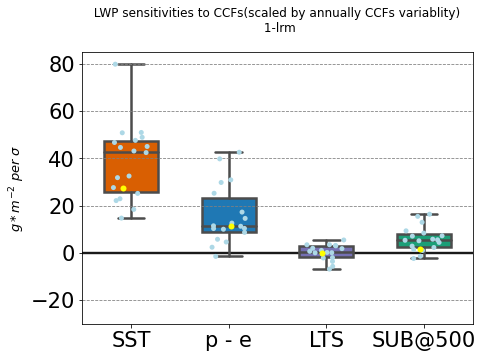

In [13]:
## PLot 3: seaborn coefficience plot for 1-lrm:
fig = plt.figure(figsize = (7, 5))
ax  = fig.add_subplot(111)

parameters = {'axes.labelsize': 23, 'legend.fontsize': 13,
          'axes.titlesize': 12, 'xtick.labelsize':17, 'ytick.labelsize':17}
plt.rcParams.update(parameters)


d1 = {'col1': arange(0, 18*4), 'value': stcoef1.ravel(), 'CCFs': array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
# print(arange(0, 18*4).reshape(-1,1), d, (array(['SST', 'p-e', 'LTS', 'SUB@500']*18)).reshape(-1,1))
data1  = pd.DataFrame(data=d1, index=arange(0, 18*4))

d2 = {'col1': arange(0, 18*4), 'value': stcoef2.ravel(), 'CCFs': array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
data2  = pd.DataFrame(data=d2, index=arange(0, 18*4))

d_specGCM = {'col1': arange(0, 4), 'value': stcoef1[12,:].ravel(), 'CCFs': array(['SST', 'p - e', 'LTS', 'SUB@500'])}
# sns.boxplot(data=[d for d in stcoef1.T])

# plot1 = sns.boxplot(data=[f for f in stcoef1.T])
# sns.boxplot(data=[[stcoef1[:,0], stcoef1[:,1], stcoef1[:,2], stcoef1[:,3]], ['dLWP/d(SST)', 'dLWP/d(p-e)','dLWP/d(LTS)', 'dLWP/d(SUB)']])
# plot2 = sns.boxplot(data=[y for y in stcoef1_yr.T])


sns.set_theme(style="whitegrid")
bplot = sns.boxplot(x='CCFs', y='value', data=d1, width = 0.55, linewidth = 2.5, whis =2.0)
stplot = sns.stripplot(x='CCFs',  y ='value', data=d1, color="lightblue", jitter=0.2, size = 5)
stplot_specGCM = sns.stripplot(x='CCFs', y='value', data = d_specGCM, color='yellow', size = 6)
# print(d1, d2)
# print(stcoef1)
# Plot setting
plt.ylim(-30., 85.)
ax.axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax.axhline(-20., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(20., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(40., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(60., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(80., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.set_ylabel(r"$ g*m^{-2}\ per\ \sigma $", fontsize = 13)

at = ax.set_title(" LWP sensitivities to CCFs(scaled by annually CCFs variablity) \n 1-lrm", pad = 20)
# at.set_position([.5, 1.90])

# Hex code for each CCF's color
CCFs = ['SST', 'p - e', 'LTS', 'SUB@500']
CCFs_colors = ["#d95f02", "#1f78b4", "#7570b3", "#1b9e77"]

color_dict = dict(zip(CCFs, CCFs_colors))

for i in range(0,4):
    mybox = bplot.artists[i]
    mybox.set_facecolor(color_dict[CCFs[i]])

# tips = sns.load_dataset("tips")

# print(tips)

# plt.savefig("plot3_1lrm_Coefficients(monthly)", dpi= 500)



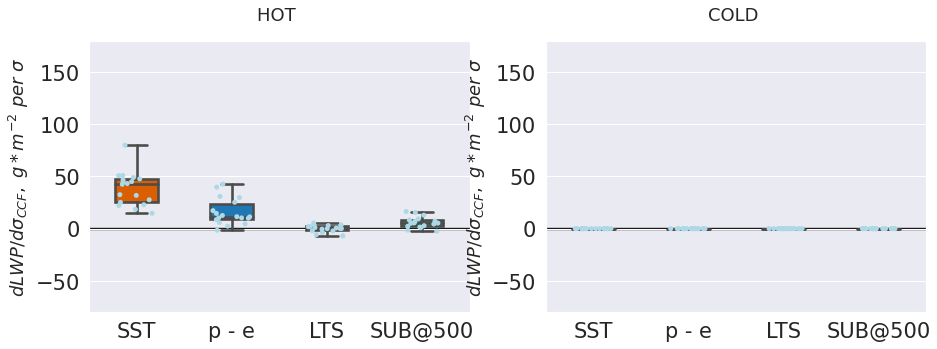

In [85]:
## PLot3: 2-lrm best fit Coefficients plot

fig3, ax3 =  plt.subplots(1,2, figsize = (15, 5))

parameters = {'axes.labelsize': 22, 'legend.fontsize': 12,
          'axes.titlesize': 11, 'xtick.labelsize':15, 'ytick.labelsize':16}
plt.rcParams.update(parameters)

# Data Frame:

d01 = {"col1": arange(0, 18*4), "value": stcoef1.ravel(), "CCFs": array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
# print(arange(0, 18*4).reshape(-1,1), d, (array(['SST', 'p-e', 'LTS', 'SUB@500']*18)).reshape(-1,1))
data1  = pd.DataFrame(data=d01, index=arange(0, 18*4))

d02 = {"col1": arange(0, 18*4), "value": stcoef2.ravel(), "CCFs": array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
data2  = pd.DataFrame(data=d02, index=arange(0, 18*4))


bplot1 = sns.boxplot(ax=ax3[0], x ="CCFs", y="value", data=d01, width = 0.45, linewidth = 2.6, whis =2.0)
stplot1 = sns.stripplot(ax=ax3[0], x="CCFs", y ="value", data=d01, color="lightblue", jitter=0.2,size = 5)
ax3[0].set_title("HOT ", loc = 'center', fontsize = 18, pad =20)
ax3[0].set_ylim(-80., 180.)

bplot2 = sns.boxplot(ax=ax3[1], x ="CCFs", y="value", data=d02, width = 0.45, linewidth = 2.6, whis =2.0)
stplot2 = sns.stripplot(ax=ax3[1], x="CCFs", y ="value", data=d02,  color="lightblue", jitter=0.2,size = 5)
ax3[1].set_title("COLD ", loc = 'center', fontsize = 18, pad =20)
ax3[1].set_ylim(-80., 180.)


# Plot setting
ax3[0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax3[1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)

ax3[0].set_ylabel(r"$dLWP/d\sigma_{CCF},\ g*m^{-2}\ per\ \sigma $", fontsize = 18)
# ax3[0].set_ylabel(r"$dLWP/d\sigma_{CCF},\ g*m^{-2}\ per\ \sigma $", fontsize = 17)
ax3[1].set_ylabel(r"$dLWP/d\sigma_{CCF},\ g*m^{-2}\ per\ \sigma $", fontsize = 18)
# ax3[1].set_ylabel(r"$dLWP/d\sigma_{CCF},\ g*m^{-2}\ per\ \sigma $", fontsize = 17)

# at = ax3.set_title(" LWP sensitivities to CCFs(scaled by annually CCFs variablity) \n 1-lrm", pad = 20)
# at.set_position([.5, 1.90])


# Hex code for each CCF's color
CCFs = ['SST', 'p - e', 'LTS', 'SUB@500']
CCFs_colors = ["#d95f02", "#1f78b4", "#7570b3", "#1b9e77"]

color_dict = dict(zip(CCFs, CCFs_colors))

for i in range(0,4):
    mybox1 = bplot1.artists[i]
    mybox1.set_facecolor(color_dict[CCFs[i]])
    
    mybox2 = bplot2.artists[i]
    mybox2.set_facecolor(color_dict[CCFs[i]])

sns.set_style("whitegrid", {"grid.color": "gray", "grid.linestyle": ":"})
# plt.savefig("plot3_bestfit5_Coefficients( Annually)", dpi= 5

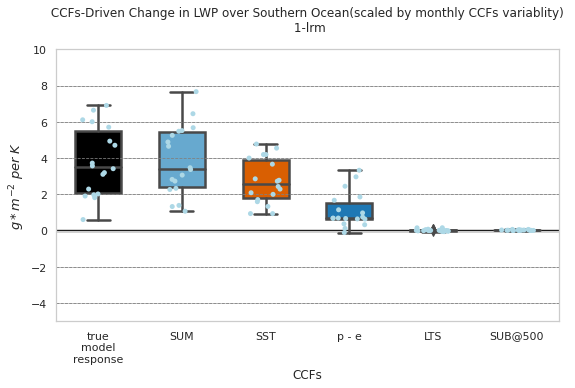

In [24]:
## PLot 3_Alternate: seaborn ccf-driven cloud LWP changes_plot for 1-lrm:
fig = plt.figure(figsize = (9, 5))
ax  = fig.add_subplot(111)

parameters = {'axes.labelsize': 23, 'legend.fontsize': 13,
          'axes.titlesize': 12, 'xtick.labelsize':17, 'ytick.labelsize':17}
plt.rcParams.update(parameters)


d1 = {'col1': arange(0, 18*6), 'value': CC_ccfdriven_withtruemodel.ravel(), 'CCFs': array(['true\nmodel\nresponse', 'SUM', 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
# print(arange(0, 18*4).reshape(-1,1), d, (array(['SST', 'p-e', 'LTS', 'SUB@500']*18)).reshape(-1,1))
data1  = pd.DataFrame(data=d1, index=arange(0, 18*6))

# d2 = {'col1': arange(0, 18*5), 'value': .ravel(), 'CCFs': array(['SUM', 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
# data2  = pd.DataFrame(data=d2, index=arange(0, 18*4))

# sns.boxplot(data=[d for d in stcoef1.T])

# plot1 = sns.boxplot(data=[f for f in stcoef1.T])
# sns.boxplot(data=[[stcoef1[:,0], stcoef1[:,1], stcoef1[:,2], stcoef1[:,3]], ['dLWP/d(SST)', 'dLWP/d(p-e)','dLWP/d(LTS)', 'dLWP/d(SUB)']])
# plot2 = sns.boxplot(data=[y for y in stcoef1_yr.T])


bplot = sns.boxplot(x='CCFs', y='value', data=data1, whis =2.0, width = 0.55, linewidth = 2.5)
stplot = sns.stripplot(x='CCFs',  y ='value', data=data1, color="lightblue", jitter=0.2, size = 5)
sns.set_theme(style="darkgrid")

plt.ylim(-5., 10.)
ax.axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax.axhline(-2., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(2., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(-4.0, c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(4.0, c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(10., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(6., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(8., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.set_ylabel(r"$ g*m^{-2}\ per\ K $", fontsize = 13)

at = ax.set_title(" CCFs-Driven Change in LWP over Southern Ocean(scaled by monthly CCFs variablity) \n 1-lrm", pad = 18)
# at.set_position([.5, 1.90])

# Hex code for each CCF's color
CCFs = ['true\nmodel\nresponse', 'SUM', 'SST', 'p - e', 'LTS', 'SUB@500']
CCFs_colors = ["black", "#67a9cf", "#d95f02", "#1f78b4", "#7570b3", "#1b9e77"]

color_dict = dict(zip(CCFs, CCFs_colors))

for i in range(0 ,5):
    mybox = bplot.artists[i]
    mybox.set_facecolor(color_dict[CCFs[i]])

# tips = sns.load_dataset("tips")
# print(tips)

# plt.savefig("plot3_1lrm_CCFs-Driven_LWPchanges(monthly)", dpi= 500)


In [17]:
novALUE = full(2*18, NaN)

stcoef1_withtruemodel = append(novALUE.reshape(18, 2), stcoef1, axis=1)

dX_dTg1_withtruemodel = append(novALUE.reshape(18, 2), dX_dTg1, axis=1)

# (novALUE.shape, stcoef1_withtruemodel, dX_dTg1_withtruemodel)

PathPatch6((-0.275, 2.0845) ...)
PathPatch6((0.725, 2.42718) ...)
PathPatch6((1.725, 1.77991) ...)
PathPatch6((2.725, 0.632418) ...)
PathPatch6((3.725, -0.0139128) ...)
PathPatch6((4.725, 0.00532519) ...)


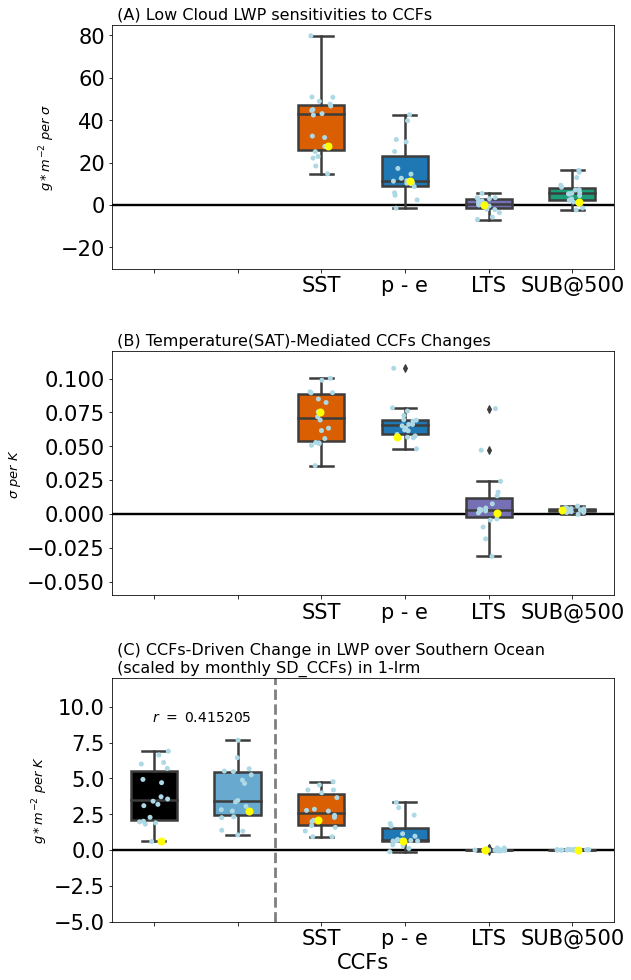

In [18]:
## AS Zelinka_Fig3_ Alternate: seaborn Coefficient_plot + sigma_changesof CCFS mediated by GMT + ccf-driven cloud LWP changes_plot for 1-lrm:

fig32, ax32 = plt.subplots(3, 1, figsize = (9, 16.5))

parameters = {'axes.labelsize': 16, 'legend.fontsize': 13,
          'axes.titlesize': 16, 'xtick.labelsize':14, 'ytick.labelsize':14}
plt.rcParams.update(parameters)


d1 = {'col1': arange(0, 18*6), 'value': stcoef1_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data1  = pd.DataFrame(data=d1, index=arange(0, 18*6))
d_specGCM1 = {'col1': arange(0, 4), 'value': stcoef1_withtruemodel[12,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}

d2 = {'col1': arange(0, 18*6), 'value': dX_dTg1_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data2  = pd.DataFrame(data=d2, index=arange(0, 18*6))
d_specGCM2 = {'col1': arange(0, 4), 'value': dX_dTg1_withtruemodel[12,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}

d3 = {'col1': arange(0, 18*6), 'value': CC_ccfdriven_withtruemodel.ravel(), 'CCFs': array(['true\nmodel\nresponse', 'SUM', 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data3  = pd.DataFrame(data=d3, index=arange(0, 18*6))
d_specGCM3 = {'col1': arange(0, 4), 'value': CC_ccfdriven_withtruemodel[12,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}

# plot 3 panel data:

bplot1 = sns.boxplot(x='CCFs', y='value', data=d1, ax = ax32[0], whis =2.0, width = 0.55, linewidth = 2.5)
stplot1 = sns.stripplot(x='CCFs',  y ='value', data=d1, ax =  ax32[0], color="lightblue", jitter=0.15, size = 5)
stplot_specGCM1 = sns.stripplot(x='CCFs',  y ='value', data=d_specGCM1, ax =  ax32[0], color="yellow", jitter=0.15, size =8)

bplot2 = sns.boxplot(x='CCFs', y='value', data=d2, ax = ax32[1], whis =2.0, width = 0.55, linewidth = 2.5)
stplot2 = sns.stripplot(x='CCFs',  y ='value', data=d2, ax =  ax32[1], color="lightblue", jitter=0.15, size = 5)
stplot_specGCM2 = sns.stripplot(x='CCFs',  y ='value', data=d_specGCM2, ax =  ax32[1], color="yellow", jitter=0.15, size =8)

bplot3 = sns.boxplot(x='CCFs', y='value', data=data3, ax = ax32[2], whis =2.0, width = 0.55, linewidth = 2.5)
stplot3 = sns.stripplot(x='CCFs',  y ='value', data=data3, ax = ax32[2], color="lightblue", jitter=0.20, size = 5)
stplot_specGCM3 = sns.stripplot(x='CCFs',  y ='value', data=d_specGCM3, ax =  ax32[2], color="yellow", jitter=0.15, size =8)

ax32[0].set_ylim(-30., 85.)
ax32[1].set_ylim(-0.06, 0.12)
ax32[2].set_ylim(-5., 12.)
ax32[0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax32[1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax32[2].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax32[2].axvline(1.45, c = 'gray', linestyle = '--', linewidth = 2.8, zorder=0)
'''
ax.axhline(2., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(-4.0, c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(4.0, c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(10., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(6., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(8., c = 'gray', linestyle = '--', linewidth = 0.8)
'''
ax32[0].set_ylabel(r"$ g*m^{-2}\ per\ \sigma $", fontsize = 13)
ax32[1].set_ylabel(r"$ \sigma\ per\ K $", fontsize = 13)
ax32[2].set_ylabel(r"$ g*m^{-2}\ per\ K $", fontsize = 13)

ax32[0].set_title(" (A) Low Cloud LWP sensitivities to CCFs ", loc = "left")
ax32[1].set_title(" (B) Temperature(SAT)-Mediated CCFs Changes ", loc = "left")
ax32[2].set_title(" (C) CCFs-Driven Change in LWP over Southern Ocean\n (scaled by monthly SD_CCFs) in 1-lrm "
                  , loc ="left")
# at.set_position([.5, 1.90])

# Hex code for each CCF's color:
CCFs = ['true\nmodel\nresponse', 'SUM', 'SST', 'p - e', 'LTS', 'SUB@500']
CCFs2 = ['SST', 'p - e', 'LTS', 'SUB@500']

CCFs_colors = ["black", "#67a9cf", "#d95f02", "#1f78b4", "#7570b3", "#1b9e77"]
CCFs_colors2 = ["#d95f02", "#1f78b4", "#7570b3", "#1b9e77"]

color_dict = dict(zip(CCFs, CCFs_colors))
color_dict2 = dict(zip(CCFs2, CCFs_colors2) )

for i in range(0, 6):

    if i < 4:
        mybox1 = bplot1.artists[i]
        mybox1.set_facecolor(color_dict2[CCFs2[i]])

        mybox2 = bplot2.artists[i]
        mybox2.set_facecolor(color_dict2[CCFs2[i]])
    
    
    mybox3 = bplot3.artists[i]
    print(mybox3)
    mybox3.set_facecolor(color_dict[CCFs[i]])
    
    
R2_Totalccfsdriven_LWP =  r2_score(CC_ccfdriven_withtruemodel[:, 0], CC_ccfdriven_withtruemodel[:, 1])
r_Totalccfsdriven_LWP, p_value = pearsonr(CC_ccfdriven_withtruemodel[:, 1], CC_ccfdriven_withtruemodel[:, 0])   #p= 0.08
ax32[2].annotate(r"$r\ =\ %4f$"%r_Totalccfsdriven_LWP, xy=(0.45, 3.24), textcoords = 'axes fraction', xytext=(0.08, 0.82), fontsize =14)

sns.set_style("whitegrid", {"grid.color": "gray", "grid.linestyle": ":"})
plt.subplots_adjust(left=0.125, bottom = 0.085, right=0.9, top = 0.84, wspace=0.2, hspace = 0.34)

plt.savefig("plot3", dpi = 500)
# plt.savefig("plot3_1lrm_asZelinkaPLot(monthly, r)", dpi= 500)

# plt.subplot_tool()
# plt.cla()

# plt.savefig("plotCESM2_1lrm_asZelinkaPLot(monthly, r)", dpi= 100)

In [9]:
## PLot 7_Alternate CCFs-Driven cloud changes(LWP)
# 4 LRM Calc
# Calc the Change of Standard deviation of CCFs in each regime with/ to the per degree change of air temperature changes:

f5yr_index = [0*730, 5*12*730]
l5yr_index = [145*12*730+1, 150*12*730]

delta_gmt  = full(len(deck2), 0.00)
delta_SST = full((len(deck2), 4), 0.)
delta_p_e = full((len(deck2), 4), 0.)
delta_LTS = full((len(deck2), 4), 0.)
delta_SUB = full((len(deck2), 4), 0.)
delta_LWP = full((len(deck2), 4), 0.)


for j in range(len(deck2)):
    
    ind1_4lrm = isnan(output_4lrm_flavra_abr[deck_nas2[j]]['LTS'])==False
    ind_true_4lrm = nonzero(ind1_4lrm==True)
    ind_false_4lrm = nonzero(ind1_4lrm==False)
    # print(ind_true_4lrm)
    # print('shape2: ', array(ind_true_4lrm).shape)        # shape2
    
    ## TR_sst, TR_sub
    folder_4lrm =  glob.glob(path1+deck2[j]['modn']+'_best(test6)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    # print(folder_4lrm)
    index_st_sst = folder_4lrm[0].index('fit') +4
    index_ed_sst = folder_4lrm[0].index('K')
    # print(list(folder_4lrm[0])[index_st_sst], list(folder_4lrm[0])[index_ed_sst])
    
    index_st_sub  = folder_4lrm[0].index('_ud') +3
    index_ed_sub  = folder_4lrm[0].index('_dats')
    TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
    TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))
    
    # print('TR_sst= ', TR_sst)
    # print('TR_sub= ', TR_sub)
    
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sstlt_up =  nonzero((output_4lrm_flavra_abr[deck_nas2[j]]['SST'] < TR_sst) & (output_4lrm_flavra_abr[deck_nas2[j]]['SUB'] <= TR_sub))
    ind_sstle_up =  nonzero((output_4lrm_flavra_abr[deck_nas2[j]]['SST'] >= TR_sst) & (output_4lrm_flavra_abr[deck_nas2[j]]['SUB']<= TR_sub))
    ind_sstlt_dw  = nonzero((output_4lrm_flavra_abr[deck_nas2[j]]['SST'] < TR_sst) &  (output_4lrm_flavra_abr[deck_nas2[j]]['SUB']> TR_sub))
    ind_sstle_dw  = nonzero((output_4lrm_flavra_abr[deck_nas2[j]]['SST'] >= TR_sst) & (output_4lrm_flavra_abr[deck_nas2[j]]['SUB']> TR_sub))
    print(ind_sstle_up)
    print(ind_sstlt_dw)

    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true_4lrm, ind_sstlt_up)
    
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true_4lrm, ind_sstle_up)
    # print(ind8, f5yr_index)
    # shape9:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 > TR_sub
    ind9  = intersect1d(ind_true_4lrm, ind_sstlt_dw)
    
    # shape10:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 > TR_sub                                                                         
    ind10 =  intersect1d(ind_true_4lrm, ind_sstle_dw)
    
    
    # shape index of 4 regime but only remain the first 5 yr& thE last 5 yr
    ind7_f5  = ind7[where((ind7>= f5yr_index[0]) & (ind7 <=f5yr_index[1]))]
    ind7_l5  = ind7[where((ind7>= l5yr_index[0]) & (ind7 <=l5yr_index[1]))]
    
    ind8_f5  = ind8[where((ind8>= f5yr_index[0]) & (ind8 <=f5yr_index[1]))]
    ind8_l5  = ind8[where((ind8>= l5yr_index[0]) & (ind8 <=l5yr_index[1]))]
    
    
    ind9_f5  = ind9[where((ind9>= f5yr_index[0]) & (ind9 <=f5yr_index[1]))]
    ind9_l5  = ind9[where((ind9>= l5yr_index[0]) & (ind9 <=l5yr_index[1]))]
    
    ind10_f5 = ind10[where((ind10>= f5yr_index[0]) & (ind10 <=f5yr_index[1]))]
    ind10_l5 = ind10[where((ind10>= l5yr_index[0]) & (ind10 <=l5yr_index[1]))]
    
    # print(ind8_f5)
    # print(ind8_l5)
    print(ind7.shape, ind8.shape, ind9.shape, ind10.shape)
    
    delta_LWPr1 = (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['LWP'][ind7_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['LWP'][ind7_f5]))
    delta_LWPr2 = (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['LWP'][ind8_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['LWP'][ind8_f5]))
    delta_LWPr3 = (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['LWP'][ind9_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['LWP'][ind9_f5]))
    delta_LWPr4= (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['LWP'][ind10_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['LWP'][ind10_f5]))
    delta_LWP[j,:] = array([delta_LWPr1, delta_LWPr2, delta_LWPr3, delta_LWPr4]).ravel()
    
    delta_SSTr1 = (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['SST'][ind7_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['SST'][ind7_f5]))
    delta_SSTr2 = (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['SST'][ind8_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['SST'][ind8_f5]))
    delta_SSTr3 = (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['SST'][ind9_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['SST'][ind9_f5]))
    delta_SSTr4= (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['SST'][ind10_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['SST'][ind10_f5]))
    delta_SST[j,:] = array([delta_SSTr1, delta_SSTr2, delta_SSTr3, delta_SSTr4]).ravel()
    
    delta_p_er1 = (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['p_e'][ind7_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['p_e'][ind7_f5]))
    delta_p_er2 = (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['p_e'][ind8_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['p_e'][ind8_f5]))
    delta_p_er3 = (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['p_e'][ind9_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['p_e'][ind9_f5]))
    delta_p_er4= (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['p_e'][ind10_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['p_e'][ind10_f5]))
    delta_p_e[j,:] = array([delta_p_er1, delta_p_er2, delta_p_er3, delta_p_er4]).ravel()
    
    
    delta_LTSr1 = (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['LTS'][ind7_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['LTS'][ind7_f5]))
    delta_LTSr2 = (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['LTS'][ind8_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['LTS'][ind8_f5]))
    delta_LTSr3 = (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['LTS'][ind9_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['LTS'][ind9_f5]))
    delta_LTSr4= (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['LTS'][ind10_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['LTS'][ind10_f5]))
    delta_LTS[j,:] = array([delta_LTSr1, delta_LTSr2, delta_LTSr3, delta_LTSr4]).ravel()
    
    delta_SUBr1 = (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['SUB'][ind7_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['SUB'][ind7_f5]))
    delta_SUBr2 = (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['SUB'][ind8_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['SUB'][ind8_f5]))
    delta_SUBr3 = (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['SUB'][ind9_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['SUB'][ind9_f5]))
    delta_SUBr4= (nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['SUB'][ind10_l5]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['SUB'][ind10_f5]))
    delta_SUB[j,:] = array([delta_SUBr1, delta_SUBr2,  delta_SUBr3,  delta_SUBr4]).ravel()
    
    # print(output_4lrm_flavra_abr[deck_nas2[j]]['gmt'][l5yr_index[0]:l5yr_index[1]:730],  ' ',  output_4lrm_flavra_abr[deck_nas2[j]]['gmt'][f5yr_index[0]:f5yr_index[1]:730])
    delta_gmt[j] =(nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['gmt'][l5yr_index[0]:l5yr_index[1]:730]) - nanmean(output_4lrm_flavra_abr[deck_nas2[j]]['gmt'][f5yr_index[0]:f5yr_index[1]:730]))
    
# print(delta_SUB, delta_gmt)
# target func: y = m*k + d
# Par_Warm, pocv = curve_fit(target_func, output_4lrm_yr_bin_abr[deck_nas2[2]]['gmt_yr_bin'].ravel(), output_4lrm_yr_bin_abr[deck_nas2[2]]['SST_yr_bin'].ravel())

# print(Par_Warm)




(array([    146,     147,     148, ..., 1322757, 1322758, 1322759]),)
(array([      0,       1,      18, ..., 1322313, 1322314, 1322315]),)
(187695,) (529729,) (326886,) (278450,)
(array([      0,      12,      13, ..., 1322757, 1322758, 1322759]),)
(array([      6,       7,      25, ..., 1322238, 1322239, 1322240]),)
(82358,) (491362,) (273388,) (475652,)
(array([     76,     147,     148, ..., 2628727, 2628728, 2628729]),)
(array([      3,       4,       5, ..., 2628280, 2628281, 2628282]),)
(346287,) (1314207,) (297713,) (453402,)
(array([     73,      74,      75, ..., 1313997, 1313998, 1313999]),)
(array([     82,     122,     123, ..., 1313556, 1313557, 1313619]),)
(279463,) (794621,) (82263,) (38709,)
(array([     73,      74,      75, ..., 1313996, 1313998, 1313999]),)
(array([     16,      17,      18, ..., 1313553, 1313554, 1313555]),)
(221618,) (688820,) (138883,) (153384,)
(array([      0,       1,       2, ..., 1313990, 1313992, 1313998]),)
(array([      7,       8,       

In [11]:
## PLot7: coefficient plot for bestK 4-lrm

# calc data (monthly) standard deviation:

sigma3 = full((len(deck2), 4), 0.0)
sigma4 = full((len(deck2), 4), 0.0)
sigma5 = full((len(deck2), 4), 0.0)
sigma6 = full((len(deck2), 4), 0.0)

coef3 =  []
coef4 =  []
coef5 =  []
coef6 =  []
stcoef3  = full((len(deck2), 4), 0)
stcoef4  = full((len(deck2), 4), 0)
stcoef5  = full((len(deck2), 4), 0)
stcoef6  = full((len(deck2), 4), 0)
itcp3 =  []
itcp4 =  []
itcp5 =  []
itcp6 =  []

dX_dTg1  = full((len(deck2), 4), 0.000)
dX_dTg2  = full((len(deck2), 4), 0.000)
dX_dTg3  = full((len(deck2), 4), 0.000)
dX_dTg4  = full((len(deck2), 4), 0.000)


# true LWP response to warming, this array storaged the four regimes response:
dX_dTg_modelresponse1 = full(len(deck2), 0.000)
dX_dTg_modelresponse2 = full(len(deck2), 0.000)
dX_dTg_modelresponse3 = full(len(deck2), 0.000)
dX_dTg_modelresponse4 = full(len(deck2), 0.000)

# start calculating SD of CCFs on monthly scale:
for i in range(len(deck_nas2)):
    
    ind1_4lrm = isnan(output_4lrm_flavra_PI[deck_nas2[i]]['LTS'])==False

    ind_true_4lrm = nonzero(ind1_4lrm==True)
    ind_false_4lrm = nonzero(ind1_4lrm==False)
    
    # print('shape2: ', array(ind_true_4lrm).shape)        # shape2
    
    
    ## TR_sst, TR_sub
    folder_4lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test6)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_4lrm)
    index_st_sst = folder_4lrm[0].index('fit') +4
    index_ed_sst = folder_4lrm[0].index('K')
    # print(list(folder_4lrm[0])[index_st_sst], list(folder_4lrm[0])[index_ed_sst])
    
    index_st_sub  = folder_4lrm[0].index('_ud') +3
    index_ed_sub  = folder_4lrm[0].index('_dats')
    TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
    TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))
    # 
    print('TR_sst= ', TR_sst)
    print('TR_sub= ', TR_sub)
    
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sstlt_up =  nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] < TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB'] <= TR_sub))
    ind_sstle_up =  nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']<= TR_sub))
    ind_sstlt_dw  = nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] < TR_sst) &  (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']> TR_sub))
    ind_sstle_dw  = nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']> TR_sub))
    # print(ind_sstle_up)
    # print(ind_sstlt_dw)

    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true_4lrm, ind_sstlt_up)
    
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true_4lrm, ind_sstle_up)
    # print(ind_true_4lrm)

    # shape9:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 > TR_sub
    ind9  = intersect1d(ind_true_4lrm, ind_sstlt_dw)
    
    # shape10:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 > TR_sub                                                                         
    ind10 =  intersect1d(ind_true_4lrm, ind_sstle_dw)
    

    ## calc standard_deviation for CCFs at PI:
    
    sigma3[i,:]  = array([ nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind7]), nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind7]), 
                          nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind7]), nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind7])]) 
    sigma4[i,:]  = array([ nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind8]), nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind8]), 
                          nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind8]), nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind8])])
    sigma5[i,:]  = array([ nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind9]), nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind9]), 
                          nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind9]), nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind9])])
    sigma6[i,:]  = array([ nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind10]), nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind10]), 
                          nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind10]),  nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind10])])
    
    
    # Calc the Change of Standard deviation of CCFs in each regime with/ to the per degree change of air temperature changes
    # print(sigma1[i,:].shape)
    dX_dTg1[i,:]   =  array([delta_SST[i,0], delta_p_e[i,0], delta_LTS[i,0], delta_SUB[i,0]] / delta_gmt[i]).flatten() / sigma3[i,:]
    dX_dTg2[i,:]   =  array([delta_SST[i,1], delta_p_e[i,1], delta_LTS[i,1], delta_SUB[i,1]] / delta_gmt[i]).flatten() / sigma4[i,:]
    dX_dTg3[i,:]   =  array([delta_SST[i,2], delta_p_e[i,2], delta_LTS[i,2], delta_SUB[i,2]] / delta_gmt[i]).flatten() / sigma5[i,:]
    dX_dTg4[i,:]   =  array([delta_SST[i,3], delta_p_e[i,3], delta_LTS[i,3], delta_SUB[i,3]] / delta_gmt[i]).flatten() / sigma6[i,:]
    
    # print(array(list(output_2lrm_dX_dTg[deck_nas2[i]][2:])).flatten(), sigma1[i,:], dX_dTg1[i,:])
    
    # Calc the True model response of CLOUD LWP changes with/ to change of air temperature changes
    dX_dTg_modelresponse1[i]  =  1000.* delta_LWP[i,0] / delta_gmt[i]
    dX_dTg_modelresponse2[i]  =  1000.* delta_LWP[i,1] / delta_gmt[i]
    dX_dTg_modelresponse3[i]  =  1000.* delta_LWP[i,2] / delta_gmt[i]
    dX_dTg_modelresponse4[i]  =  1000.* delta_LWP[i,3] / delta_gmt[i]
    
# print(dX_dTg1)

## switch 'nan' points to 0
ind_sg3 = isnan(sigma3)== True
ind_sg3false = nonzero(ind_sg3==True)
sigma3[ind_sg3false] = 0.0

ind_sg5 = isnan(sigma5)== True
ind_sg5false = nonzero(ind_sg5==True)
sigma5[ind_sg5false] = 0.0
# print(sigma3, sigma6)


# Retrieved the 4-lrm coefficients:
for j in range(len(deck2)):
    a_lt_up  = output_LRM_sstlt_up[deck_nas2[j]][0].copy()
    a_le_up  = output_LRM_sstle_up[deck_nas2[j]][0].copy()
    a_lt_dn  = output_LRM_sstlt_down[deck_nas2[j]][0].copy()
    a_le_dn  = output_LRM_sstle_down[deck_nas2[j]][0].copy()
    
    a0_lt_up  = output_LRM_sstlt_up[deck_nas2[j]][1]
    a0_le_up  = output_LRM_sstle_up[deck_nas2[j]][1]
    a0_lt_dn  = output_LRM_sstlt_down[deck_nas2[j]][1]
    a0_le_dn  = output_LRM_sstle_down[deck_nas2[j]][1]
    
    # print(m, t, e, f)
    coef3.append(array(a_lt_up))
    coef4.append(array(a_le_up))
    coef5.append(array(a_lt_dn))
    coef6.append(array(a_le_dn))
    itcp3.append(array(a0_lt_up))
    itcp4.append(array(a0_le_up))
    itcp5.append(array(a0_lt_dn))
    itcp6.append(array(a0_le_dn))

print( array(coef3), array(coef6), itcp4)

stcoef3 = (1000.*array(coef3)) * sigma3[i,:]
stcoef4 = (1000.*array(coef4)) * sigma4[i,:]
stcoef5 = (1000.*array(coef5)) * sigma5[i,:]
stcoef6 = (1000.*array(coef6)) * sigma6[i,:]
# print(stcoef5.shape, stcoef3)


# Calc the CCF- Driven Change in Low Cloud LWP:
##.. Per Cloud Properties(lwp) changes to per degree change of air temperature changes for each Cloud Controling Factors:
dC_dg_Cs1 =  stcoef3 * dX_dTg1
dC_dg_Cs2 =  stcoef4 * dX_dTg2
dC_dg_Cs3 =  stcoef5 * dX_dTg3
dC_dg_Cs4 =  stcoef6 * dX_dTg4

dC_dg_Cs_sum1  = sum(dC_dg_Cs1, axis = 1)
dC_dg_Cs_sum2  = sum(dC_dg_Cs2, axis = 1)
dC_dg_Cs_sum3  = sum(dC_dg_Cs3, axis = 1)
dC_dg_Cs_sum4  = sum(dC_dg_Cs4, axis = 1)

# print(dC_dg_Cs4.shape, dC_dg_Cs1)

CC_ccfdriven1 = append(dC_dg_Cs_sum1.reshape(-1,1), dC_dg_Cs1, axis =1)
CC_ccfdriven2 = append(dC_dg_Cs_sum2.reshape(-1,1), dC_dg_Cs2, axis =1)
CC_ccfdriven3 = append(dC_dg_Cs_sum3.reshape(-1,1), dC_dg_Cs3, axis =1)
CC_ccfdriven4 = append(dC_dg_Cs_sum4.reshape(-1,1), dC_dg_Cs4, axis =1)


CC_ccfdriven_withtruemodel1 = append(dX_dTg_modelresponse1.reshape(-1,1), CC_ccfdriven1, axis =1)
CC_ccfdriven_withtruemodel2 = append(dX_dTg_modelresponse2.reshape(-1,1), CC_ccfdriven2, axis =1)
CC_ccfdriven_withtruemodel3 = append(dX_dTg_modelresponse3.reshape(-1,1), CC_ccfdriven3, axis =1)
CC_ccfdriven_withtruemodel4 = append(dX_dTg_modelresponse4.reshape(-1,1), CC_ccfdriven4, axis =1)
# print(CC_ccfdriven_withtruemodel3)

['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1_best(test6)fit_270.46K_ud-0.2_dats.npz']
TR_sst=  270.46
TR_sub=  -0.002
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5_best(test6)fit_256.87K_ud-0.8_dats.npz']
TR_sst=  256.87
TR_sub=  -0.008
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2_best(test6)fit_269.42K_ud0.6_dats.npz']
TR_sst=  269.42
TR_sub=  0.006
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2-FV2_best(test6)fit_269.39K_ud2.3_dats.npz']
TR_sst=  269.39
TR_sub=  0.023
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2-WACCM_best(test6)fit_269.5K_ud1.0_dats.npz']
TR_sst=  269.5
TR_sub=  0.01
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CNRM-ESM2-1_best(test6)fit_269.85K_ud-1.0_dats.npz']
TR_sst=  269.85
TR_sub=  -0.01
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/GISS-E2-1-G_best(test6)fit_273.87K_ud-0.1_dats.npz']
TR_sst=  273.87
TR_sub=  -0.001
['/glade/work/chuyan/Research/C

In [15]:
# calc ANNUALLY data standard deviation:

sigma3_yr = full((len(deck2), 4), 0.0)
sigma4_yr = full((len(deck2), 4), 0.0)
sigma5_yr = full((len(deck2), 4), 0.0)
sigma6_yr = full((len(deck2), 4), 0.0)


stcoef3_yr = full((len(deck2), 4), 0)
stcoef4_yr = full((len(deck2), 4), 0)
stcoef5_yr = full((len(deck2), 4), 0)
stcoef6_yr = full((len(deck2), 4), 0)


# start calculating SD of CCFs on annually scale:
for i in range(len(deck_nas2)):
    
    ind1_4lrm_yr = isnan(output_4lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'].flatten()) == False

    ind_true_4lrm_yr = nonzero(ind1_4lrm_yr ==True)
    ind_false_4lrm_yr = nonzero(ind1_4lrm_yr ==False)
    
    print('shape1v.s2: ', array(ind1_4lrm_yr).shape, array(ind_true_4lrm_yr).shape )        # shape2
    
    
    '''
    ## TR_sst, TR_sub
    folder_4lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test6)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_4lrm)
    index_st_sst = folder_4lrm[0].index('fit')+ 4
    index_ed_sst = folder_4lrm[0].index('K')
    # print(list(folder_4lrm[0])[index_st_sst], list(folder_4lrm[0])[index_ed_sst])
    
    index_st_sub  = folder_4lrm[0].index('_ud') +3
    index_ed_sub  = folder_4lrm[0].index('_dats')
    TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
    TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))
    # print('TR_sst= ', TR_sst)
    print('TR_sub= ', TR_sub)
    '''
    
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sstlt_up_yr =  nonzero((output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten() < TR_sst) & (output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten() <= TR_sub))
    ind_sstle_up_yr =  nonzero((output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten() >= TR_sst) & (output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()<= TR_sub))
    ind_sstlt_dw_yr  = nonzero((output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten() < TR_sst) &  (output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten() > TR_sub))
    ind_sstle_dw_yr  = nonzero((output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten() >= TR_sst) & (output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()> TR_sub))
    # print(ind_sstle_up_yr)
    # print(ind_sstlt_dw_yr)

    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7_yr  = intersect1d(ind_true_4lrm_yr, ind_sstlt_up_yr)
    
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8_yr = intersect1d(ind_true_4lrm_yr, ind_sstle_up_yr)
    # print(ind8_yr)

    # shape9:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 > TR_sub
    ind9_yr  = intersect1d(ind_true_4lrm_yr, ind_sstlt_dw_yr)
    
    # shape10:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 > TR_sub                                                                         
    ind10_yr =  intersect1d(ind_true_4lrm_yr, ind_sstle_dw_yr)
    # print(ind10_yr)

    ## calc standard_deviation for CCFs at PI:
    
    sigma3_yr[i,:]  = array([ nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten()[ind7_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'].flatten()[ind7_yr]), 
                          nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'].flatten()[ind7_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()[ind7_yr])]) 
    sigma4_yr[i,:]  = array([ nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten()[ind8_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'].flatten()[ind8_yr]), 
                          nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'].flatten()[ind8_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()[ind8_yr])])
    sigma5_yr[i,:]  = array([ nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten()[ind9_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'].flatten()[ind9_yr]), 
                          nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'].flatten()[ind9_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()[ind9_yr])])
    sigma6_yr[i,:]  = array([ nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten()[ind10_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'].flatten()[ind10_yr]), 
                          nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'].flatten()[ind10_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()[ind10_yr])])
    

## switch 'nan' points to 0
ind_sg3_yr = isnan(sigma3_yr)== True
ind_sg3false_yr = nonzero(ind_sg3_yr==True)
sigma3_yr[ind_sg3false_yr] = 0.0

ind_sg5_yr = isnan(sigma5_yr)== True
ind_sg5false_yr = nonzero(ind_sg5_yr==True)
sigma5_yr[ind_sg5false_yr] = 0.0
# print(sigma3_yr, sigma6_yr)


stcoef3_yr = (1000.*array(coef3)) * sigma3_yr[i,:]
stcoef4_yr = (1000.*array(coef4)) * sigma4_yr[i,:]
stcoef5_yr = (1000.*array(coef5)) * sigma5_yr[i,:]
stcoef6_yr = (1000.*array(coef6)) * sigma6_yr[i,:]
# print(stcoef5_yr)

shape1v.s2:  (72270,) (1, 72270)
shape1v.s2:  (72270,) (1, 72270)
shape1v.s2:  (72270,) (1, 66527)
shape1v.s2:  (72270,) (1, 66064)
shape1v.s2:  (72270,) (1, 66530)
shape1v.s2:  (72270,) (1, 68199)
shape1v.s2:  (72270,) (1, 67095)
shape1v.s2:  (72270,) (1, 67076)
shape1v.s2:  (72270,) (1, 67914)
shape1v.s2:  (72270,) (1, 67184)
shape1v.s2:  (72270,) (1, 67964)
shape1v.s2:  (72270,) (1, 66535)
shape1v.s2:  (72270,) (1, 67582)
shape1v.s2:  (72270,) (1, 65050)
shape1v.s2:  (72270,) (1, 67620)
shape1v.s2:  (72270,) (1, 72270)
shape1v.s2:  (72270,) (1, 72270)
shape1v.s2:  (72270,) (1, 72270)


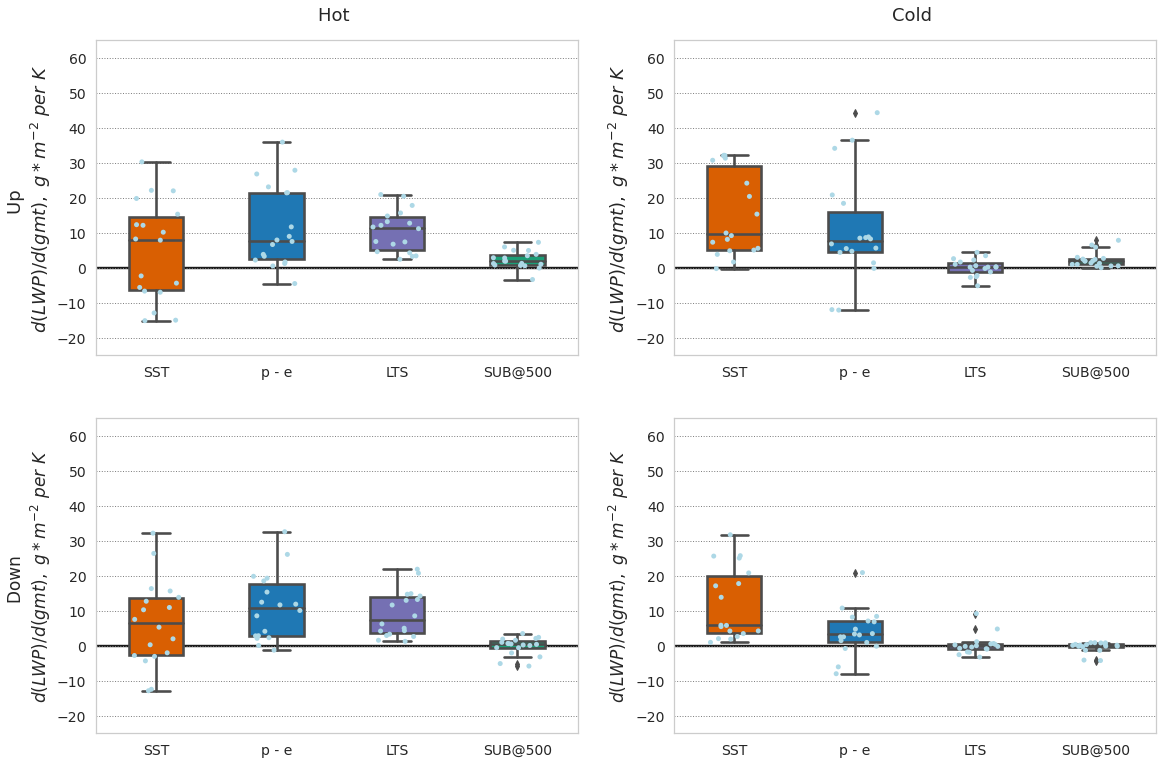

<Figure size 432x288 with 0 Axes>

In [57]:
## PLot 3: seaborn coefficience plot for best 4-lrm:

fig7, ax7 = plt.subplots(2, 2, figsize = (19, 11))

parameters = {'axes.labelsize': 22, 'legend.fontsize': 12,
          'axes.titlesize': 11, 'xtick.labelsize':15, 'ytick.labelsize':16}
plt.rcParams.update(parameters)

# Data Frame:

d1 = {"col1": arange(0, 18*4), "value": stcoef3.ravel(), "CCFs": array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
# print(arange(0, 18*4).reshape(-1,1), d, (array(['SST', 'p-e', 'LTS', 'SUB@500']*18)).reshape(-1,1))
data1  = pd.DataFrame(data=d1, index=arange(0, 18*4))

d2 = {"col1": arange(0, 18*4), "value": stcoef4.ravel(), "CCFs": array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
data2  = pd.DataFrame(data=d2, index=arange(0, 18*4))

d3 = {"col1": arange(0, 18*4), "value": stcoef5.ravel(), "CCFs": array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
# print(arange(0, 18*4).reshape(-1,1), d, (array(['SST', 'p-e', 'LTS', 'SUB@500']*18)).reshape(-1,1))
data3  = pd.DataFrame(data=d3, index=arange(0, 18*4))

d4 = {"col1": arange(0, 18*4), "value": stcoef6.ravel(), "CCFs": array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
data4  = pd.DataFrame(data=d4, index=arange(0, 18*4))

bplot1 = sns.boxplot(ax=ax7[0,1], x ="CCFs", y="value", data= d1, width = 0.45, linewidth = 2.6, whis =2.0)
stplot1 = sns.stripplot(ax=ax7[0,1], x="CCFs", y ="value", data= d1, color="lightblue", jitter=0.2,size = 5)
ax7[0,1].set_title("Cold ", loc = 'center', fontsize = 18, pad =20)

ax7[0,1].set_ylim([-25., 65.])

bplot2 = sns.boxplot(ax=ax7[0,0], x ="CCFs", y="value", data= d2, width = 0.45, linewidth = 2.6, whis =2.0)
stplot2 = sns.stripplot(ax=ax7[0,0], x="CCFs", y ="value", data= d2,  color="lightblue", jitter=0.2,size = 5)
ax7[0,0].set_title("Hot ", loc = 'center', fontsize = 18, pad =20)

ax7[0,0].set_ylim([-25., 65.])


bplot3 = sns.boxplot(ax=ax7[1,1], x ="CCFs", y="value", data= d3, width = 0.45, linewidth = 2.6, whis =2.0)
stplot3 = sns.stripplot(ax=ax7[1,1], x="CCFs", y ="value", data= d3, color="lightblue", jitter=0.2,size = 5)
# ax7[1,1].set_title("Cold ", loc = 'center')

ax7[1,1].set_ylim([-25., 65.])

bplot4 = sns.boxplot(ax=ax7[1,0], x ="CCFs", y="value", data= d4, width = 0.45, linewidth = 2.6, whis =2.0)
stplot4 = sns.stripplot(ax=ax7[1,0], x="CCFs", y ="value", data= d4, color="lightblue",jitter=0.2,size = 5)
# ax7[1,0].set_title(" Hot ", loc = 'center')

ax7[1,0].set_ylim([-25., 65.])

# Plot setting
ax7[0,0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax7[0,1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax7[1,0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax7[1,1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax7[0,0].set_ylabel("Up \n" + r"$d(LWP)/d(gmt),\ g*m^{-2}\ per\ K $", fontsize = 18)
ax7[1,0].set_ylabel("Down \n" + r"$d(LWP)/d(gmt),\ g*m^{-2}\ per\ K $", fontsize = 17)
ax7[0,1].set_ylabel(r"$d(LWP)/d(gmt),\ g*m^{-2}\ per\ K $", fontsize = 18)
ax7[1,1].set_ylabel(r"$d(LWP)/d(gmt),\ g*m^{-2}\ per\ K $", fontsize = 17)

# at = ax.set_title(" LWP sensitivities to CCFs(scaled by annually CCFs variablity) \n 1-lrm", pad = 20)
# at.set_position([.5, 1.90])

# Hex code for each CCF's color
CCFs = [ 'SST', 'p - e', 'LTS', 'SUB@500']
CCFs_colors = [ "#d95f02", "#1f78b4", "#7570b3", "#1b9e77"]

color_dict = dict(zip(CCFs, CCFs_colors))

for i in range(0, 4):
    
    mybox1 = bplot1.artists[i]
    mybox1.set_facecolor(color_dict[CCFs[i]])
    mybox2 = bplot2.artists[i]
    mybox2.set_facecolor(color_dict[CCFs[i]])
    mybox3 = bplot3.artists[i]
    mybox3.set_facecolor(color_dict[CCFs[i]])
    mybox4 = bplot4.artists[i]
    mybox4.set_facecolor(color_dict[CCFs[i]])
    

sns.set_style("whitegrid", {"grid.color": "gray", "grid.linestyle": ":"})
# sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
# set the spacing between subplots and plot 
plt.subplots_adjust(left=0.125, bottom = 0.105, right=0.9, top = 0.98, wspace=0.2, hspace=0.2)

# plt.savefig("plot7_bestfit5_CCFsDrivenLWPchanges_(monthly)", dpi = 500)

# plt.subplot_tool()
plt.show()
plt.clf()


In [13]:
# novALUE = full(2*18, NaN)

stcoef3_withtruemodel = append(novALUE.reshape(18, 2), stcoef3, axis=1)
stcoef4_withtruemodel = append(novALUE.reshape(18, 2), stcoef4, axis=1)
stcoef5_withtruemodel = append(novALUE.reshape(18, 2), stcoef5, axis=1)
stcoef6_withtruemodel = append(novALUE.reshape(18, 2), stcoef6, axis=1)


dX_dTg1_withtruemodel = append(novALUE.reshape(18, 2), dX_dTg1, axis=1)
dX_dTg2_withtruemodel = append(novALUE.reshape(18, 2), dX_dTg2, axis=1)
dX_dTg3_withtruemodel = append(novALUE.reshape(18, 2), dX_dTg3, axis=1)
dX_dTg4_withtruemodel = append(novALUE.reshape(18, 2), dX_dTg4, axis=1)


(novALUE.shape, stcoef3_withtruemodel, dX_dTg1_withtruemodel.shape)

((36,),
 array([[            nan,             nan,  3.21519537e+01,
          4.43180710e+01, -5.14563976e+00,  7.85930407e+00],
        [            nan,             nan,  3.76214152e+00,
          7.12311492e+00,  6.17954191e-01,  2.00514326e+00],
        [            nan,             nan,  2.76319502e+01,
          9.89076515e+00, -2.82702112e+00,  2.00517589e+00],
        [            nan,             nan,  2.35207049e+01,
          4.63531066e+00, -1.20534717e+00,  2.27271286e+00],
        [            nan,             nan,  2.72474384e+01,
          9.52843194e+00, -2.57381762e+00,  1.81765324e+00],
        [            nan,             nan,  6.99417916e+00,
          6.25375215e+00,  5.54804648e-01,  1.02555507e+00],
        [            nan,             nan,  3.16836271e+01,
          3.46095147e+01,  4.33000828e+00,  1.35879511e+00],
        [            nan,             nan,  3.08361059e+01,
          3.70351114e+01,  3.25787636e+00,  1.28568257e+00],
        [            nan

# 

NameError: name 'stcoef3_withtruemodel' is not defined

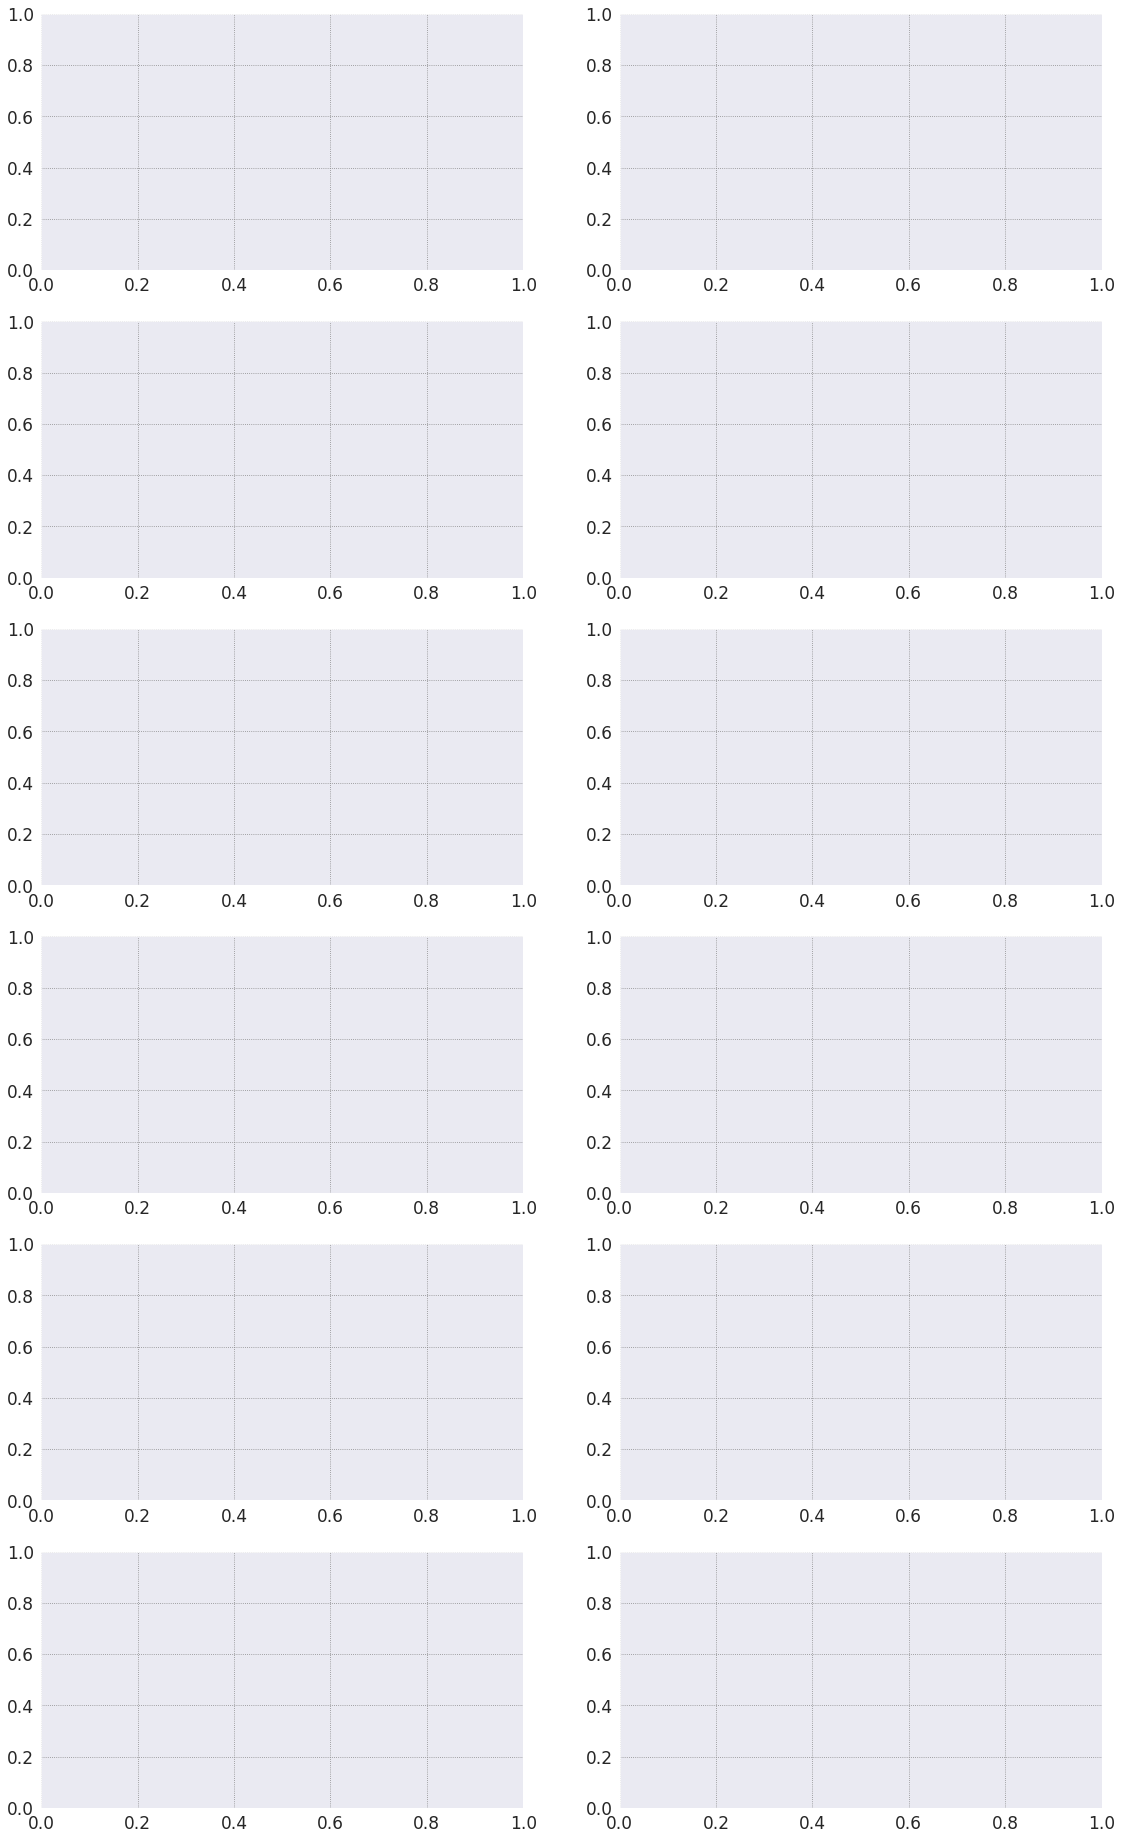

In [13]:
1## PLot3(AsZelinkaplot): Coefficient plot + Temperature-mediated CCFS change + CCF-Drivens CLoud changes for best 4-lrm:

fig72, ax72 = plt.subplots(6, 2, figsize = (19, 33))

parameters = {'axes.labelsize': 16, 'legend.fontsize': 13,
          'axes.titlesize': 14, 'xtick.labelsize':14, 'ytick.labelsize':14}
plt.rcParams.update(parameters)

# Data Frame:

d1 = {'col1': arange(0, 18*6), 'value': stcoef3_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data1  = pd.DataFrame(data=d1, index=arange(0, 18*6))
d_specGCM1 = {'col1': arange(0, 4), 'value': stcoef3_withtruemodel[2,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d2 = {'col1': arange(0, 18*6), 'value': stcoef4_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data2  = pd.DataFrame(data=d2, index=arange(0, 18*6))
d_specGCM2 = {'col1': arange(0, 4), 'value': stcoef4_withtruemodel[2,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d3 = {'col1': arange(0, 18*6), 'value': stcoef5_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data3  = pd.DataFrame(data=d3, index=arange(0, 18*6))
d_specGCM3 = {'col1': arange(0, 4), 'value': stcoef5_withtruemodel[2,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d4 = {'col1': arange(0, 18*6), 'value': stcoef6_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data4  = pd.DataFrame(data=d4, index=arange(0, 18*6))
d_specGCM4 = {'col1': arange(0, 4), 'value': stcoef6_withtruemodel[2,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}


d5 = {'col1': arange(0, 18*6), 'value': dX_dTg1_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data5  = pd.DataFrame(data=d5, index=arange(0, 18*6))
d_specGCM5 = {'col1': arange(0, 4), 'value': dX_dTg1_withtruemodel[2,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d6 = {'col1': arange(0, 18*6), 'value': dX_dTg2_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data6  = pd.DataFrame(data=d6, index=arange(0, 18*6))
d_specGCM6 = {'col1': arange(0, 4), 'value': dX_dTg2_withtruemodel[2,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d7 = {'col1': arange(0, 18*6), 'value': dX_dTg3_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data7  = pd.DataFrame(data=d7, index=arange(0, 18*6))
d_specGCM7 = {'col1': arange(0, 4), 'value': dX_dTg3_withtruemodel[2,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d8 = {'col1': arange(0, 18*6), 'value': dX_dTg4_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data8  = pd.DataFrame(data=d8, index=arange(0, 18*6))
d_specGCM8 = {'col1': arange(0, 4), 'value': dX_dTg4_withtruemodel[2,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}


d9 = {'col1': arange(0, 18*6), 'value': CC_ccfdriven_withtruemodel1.ravel(), 'CCFs': array(['true\nmodel\nresponse', 'SUM', 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data9  = pd.DataFrame(data=d9, index=arange(0, 18*6))
d_specGCM9 = {'col1': arange(0, 4), 'value': CC_ccfdriven_withtruemodel1[2,:].ravel(), 'CCFs':array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d10 = {"col1": arange(0, 18*6), "value": CC_ccfdriven_withtruemodel2.ravel(), "CCFs": array(['true\nmodel\nresponse', 'SUM', 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data10  = pd.DataFrame(data=d10, index=arange(0, 18*6))
d_specGCM10 = {'col1': arange(0, 4), 'value': CC_ccfdriven_withtruemodel2[2,:].ravel(), 'CCFs':array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d11 = {"col1": arange(0, 18*6), "value": CC_ccfdriven_withtruemodel3.ravel(), "CCFs": array(['true\nmodel\nresponse', 'SUM', 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data11  = pd.DataFrame(data=d11, index=arange(0, 18*6))
d_specGCM11 = {'col1': arange(0, 4), 'value': CC_ccfdriven_withtruemodel3[2,:].ravel(), 'CCFs':array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d12 = {"col1": arange(0, 18*6), "value": CC_ccfdriven_withtruemodel4.ravel(), "CCFs": array(['true\nmodel\nresponse', 'SUM', 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data12  = pd.DataFrame(data=d12, index=arange(0, 18*6))
d_specGCM12 = {'col1': arange(0, 4), 'value': CC_ccfdriven_withtruemodel4[2,:].ravel(), 'CCFs':array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}

#Coefficient plot
bplot1 = sns.boxplot(ax=ax72[0,1], x ="CCFs", y="value", data= d1, width = 0.45, linewidth = 2.6, whis =2.0)
stplot1 = sns.stripplot(ax=ax72[0,1], x="CCFs", y ="value", data= d1, color="lightblue", jitter=0.2,size = 5)
stplot_specGCM1 = sns.stripplot(ax=ax72[0,1], x="CCFs", y ="value", data= d_specGCM1, color="yellow", jitter=0.2, size =8)
ax72[0,1].set_title(" Cold ", loc = 'center', fontsize = 18, pad =12)
ax72[0,1].set_ylim([-25, 65])

bplot2 = sns.boxplot(ax=ax72[0,0], x ="CCFs", y="value", data =d2, width = 0.45, linewidth = 2.6, whis =2.0)
stplot2 = sns.stripplot(ax=ax72[0,0], x="CCFs", y ="value", data =d2,  color="lightblue", jitter=0.2,size = 5)
stplot_specGCM1 = sns.stripplot(ax=ax72[0,0], x="CCFs", y ="value", data= d_specGCM2, color="yellow", jitter=0.2, size =8)
ax72[0,0].set_title(" Hot ", loc = 'center', fontsize = 18, pad =12)
ax72[0,0].text(-0.29, 83., "(A) Cloud LWP Sensitivities with SD_CCFs ", fontsize = 16, horizontalalignment = 'left')
ax72[0,0].set_ylim([-25, 65])

bplot3 = sns.boxplot(ax=ax72[1,1], x ="CCFs", y="value", data= d3, width = 0.45, linewidth = 2.6, whis =2.0)
stplot3 = sns.stripplot(ax=ax72[1,1], x="CCFs", y ="value", data= d3, color="lightblue", jitter=0.2, size = 5)
stplot_specGCM3 = sns.stripplot(ax=ax72[1,1], x="CCFs", y ="value", data= d_specGCM3, color="yellow", jitter=0.2, size =8)
ax72[1,1].set_ylim([-25, 65])

bplot4 = sns.boxplot(ax=ax72[1,0], x ="CCFs", y="value", data= d4, width = 0.45, linewidth = 2.6, whis =2.0)
stplot4 = sns.stripplot(ax=ax72[1,0], x="CCFs", y ="value", data= d4, color="lightblue",jitter=0.2, size = 5)
stplot_specGCM4 = sns.stripplot(ax=ax72[1,0], x="CCFs", y ="value", data= d_specGCM4, color="yellow", jitter=0.2, size =8)
ax72[1,0].set_ylim([-25, 65])


#Temperature-mediated CCFS changes

bplot5 = sns.boxplot(ax=ax72[2,1], x ="CCFs", y="value", data= d5, width = 0.45, linewidth = 2.6, whis =2.0)
stplot5 = sns.stripplot(ax=ax72[2,1], x="CCFs", y ="value", data= d5, color="lightblue", jitter=0.2,size = 5)
stplot_specGCM5 = sns.stripplot(ax=ax72[2,1], x="CCFs", y ="value", data= d_specGCM5, color="yellow", jitter=0.2, size =8)
ax72[2,1].set_title(" Cold ", loc = 'center', fontsize = 18, pad = 12)
ax72[2,1].set_ylim([-0.15, 0.28])

bplot6 = sns.boxplot(ax=ax72[2,0], x ="CCFs", y="value", data= d6, width = 0.45, linewidth = 2.6, whis =2.0)
stplot6 = sns.stripplot(ax=ax72[2,0], x="CCFs", y ="value", data= d6, color="lightblue", jitter=0.2,size = 5)
stplot_specGCM6 = sns.stripplot(ax=ax72[2,0], x="CCFs", y ="value", data= d_specGCM6, color="yellow", jitter=0.2, size =8)
ax72[2,0].set_title(" Hot ", loc = 'center', fontsize = 18, pad =12)
ax72[2,0].text(-0.29, 0.36, "(B) Temperature-mediated CCFs Change ", fontsize = 16, horizontalalignment = 'left')
ax72[2,0].set_ylim([-0.15, 0.28])

bplot7 = sns.boxplot(ax=ax72[3,1], x ="CCFs", y="value", data = d7, width = 0.45, linewidth = 2.6, whis =2.0)
stplot7 = sns.stripplot(ax=ax72[3,1], x="CCFs", y ="value", data = d7, color="lightblue", jitter=0.2,size = 5)
stplot_specGCM7 = sns.stripplot(ax=ax72[3,1], x="CCFs", y ="value", data= d_specGCM7, color="yellow", jitter=0.2, size =8)
ax72[3,1].set_ylim([-0.15, 0.28])

bplot8 = sns.boxplot(ax=ax72[3,0], x ="CCFs", y="value", data= d8, width = 0.45, linewidth = 2.6, whis =2.0)
stplot8 = sns.stripplot(ax=ax72[3,0], x="CCFs", y ="value", data= d8, color="lightblue",jitter=0.2,size = 5)
stplot_specGCM8 = sns.stripplot(ax=ax72[3,0], x="CCFs", y ="value", data= d_specGCM8, color="yellow", jitter=0.2, size =8)
ax72[3,0].set_ylim([-0.15, 0.28])

#CCF-Driven CLoud changes
bplot9 = sns.boxplot(ax=ax72[4,1], x ="CCFs", y="value", data= d9, width = 0.45, linewidth = 2.6, whis =2.0)
stplot9 = sns.stripplot(ax=ax72[4,1], x="CCFs", y ="value", data= d9, color="lightblue", jitter=0.2,size = 5)
stplot_specGCM9 = sns.stripplot(ax = ax72[4,1], x="CCFs", y ="value", data=d_specGCM9, color="yellow", jitter=0.2, size =8)  ## 
ax72[4,1].set_title(" Cold ", loc = 'center', fontsize = 18, pad = 12)
ax72[4,1].set_ylim([-7.5, 12.57])
R2_Totalccfsdriven_LWP1 =  r2_score(CC_ccfdriven_withtruemodel1[:, 0], CC_ccfdriven_withtruemodel1[:, 1])
r_Totalccfsdriven_LWP1, p_value1 = pearsonr(CC_ccfdriven_withtruemodel1[:, 1], CC_ccfdriven_withtruemodel1[:, 0]) 
ax72[4,1].annotate(r"$r\ =\ %4f$"%r_Totalccfsdriven_LWP1, xy=(0.45, 3.24), textcoords = 'axes fraction', xytext=(0.08, 0.82), fontsize =14)


bplot10 = sns.boxplot(ax=ax72[4,0], x ="CCFs", y="value", data= d10, width = 0.45, linewidth = 2.6, whis =2.0)
stplot10 = sns.stripplot(ax=ax72[4,0], x="CCFs", y ="value", data= d10,  color="lightblue", jitter=0.2, size = 5)
stplot_specGCM10 = sns.stripplot(ax = ax72[4,0], x="CCFs", y ="value", data=d_specGCM10, color="yellow", jitter=0.2, size =7)
ax72[4,0].set_title(" Hot ", loc = 'center', fontsize = 18, pad = 12)
ax72[4,0].text(-0.29, 15.2,  "(C) CCFs-Driven LWP Changes over SO \n    (sclaed by monthly SD_CCFs) ", fontsize =16, horizontalalignment = 'left')
ax72[4,0].set_ylim([-7.5, 12.5])
R2_Totalccfsdriven_LWP2 =  r2_score(CC_ccfdriven_withtruemodel2[:, 0], CC_ccfdriven_withtruemodel2[:, 1])
r_Totalccfsdriven_LWP2, p_value2 = pearsonr(CC_ccfdriven_withtruemodel2[:, 1], CC_ccfdriven_withtruemodel2[:, 0]) 
ax72[4,0].annotate(r"$r\ =\ %4f$"%r_Totalccfsdriven_LWP2, xy=(0.45, 3.24), textcoords = 'axes fraction', xytext=(0.10, 0.78), fontsize =14)


bplot11 = sns.boxplot(ax=ax72[5,1], x ="CCFs", y="value", data= d11, width = 0.45, linewidth = 2.6, whis =2.0)
stplot11 = sns.stripplot(ax=ax72[5,1], x="CCFs", y ="value", data= d11, color="lightblue", jitter=0.2, size = 5)
stplot_specGCM11 = sns.stripplot(ax = ax72[5,1], x="CCFs", y ="value", data=d_specGCM11, color="yellow", jitter=0.2, size =7)
ax72[5,1].set_ylim([-7.5, 12.51])
R2_Totalccfsdriven_LWP3 =  r2_score(CC_ccfdriven_withtruemodel3[:, 0], CC_ccfdriven_withtruemodel3[:, 1])
r_Totalccfsdriven_LWP3, p_value3 = pearsonr(CC_ccfdriven_withtruemodel3[:, 1], CC_ccfdriven_withtruemodel3[:, 0]) 
ax72[5,1].annotate(r"$r\ =\ %4f$"%r_Totalccfsdriven_LWP3, xy=(0.45, 2.16), textcoords = 'axes fraction', xytext=(0.10, 0.78), fontsize =14)

bplot12 = sns.boxplot(ax=ax72[5,0], x ="CCFs", y="value", data= d12, width = 0.45, linewidth = 2.6, whis =2.0)
stplot12 = sns.stripplot(ax=ax72[5,0], x="CCFs", y ="value", data= d12, color="lightblue",jitter=0.2,size = 5)
stplot_specGCM12 = sns.stripplot(ax = ax72[5,0], x="CCFs", y ="value", data=d_specGCM12, color="yellow", jitter=0.2, size =7)
ax72[5,0].set_ylim([-7.5, 12.5])
R2_Totalccfsdriven_LWP4 =  r2_score(CC_ccfdriven_withtruemodel4[:, 0], CC_ccfdriven_withtruemodel4[:, 1])
r_Totalccfsdriven_LWP4, p_value4 = pearsonr(CC_ccfdriven_withtruemodel4[:, 1], CC_ccfdriven_withtruemodel4[:, 0]) 
ax72[5,0].annotate(r"$r\ =\ %4f$"%r_Totalccfsdriven_LWP4, xy=(0.45, 3.24), textcoords = 'axes fraction', xytext=(0.10, 0.82), fontsize =14)

print(p_value1, p_value2, p_value3, p_value4)

# Plot setting
ax72[0,0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[0,1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[1,0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[1,1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[2,0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[2,1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[3,0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[3,1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[4,0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.5, zorder=0)
ax72[4,1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.5, zorder=0)
ax72[5,0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.5, zorder=0)
ax72[5,1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.5, zorder=0)

ax72[4,0].axvline(1.46, c = 'k', linestyle = '--', linewidth = 2.4)
ax72[4,1].axvline(1.46, c = 'k', linestyle = '--', linewidth = 2.4)
ax72[5,0].axvline(1.46, c = 'k', linestyle = '--', linewidth = 2.4)
ax72[5,1].axvline(1.46, c = 'k', linestyle = '--', linewidth = 2.4)

ax72[0,0].set_ylabel("Up \n" + r"$\ g*m^{-2}\ per\ \sigma $", fontsize = 17)
ax72[1,0].set_ylabel("Down \n" + r"$\ g*m^{-2}\ per\ \sigma $", fontsize = 17)
# ax72[0,1].set_ylabel(r"$\ g*m^{-2}\ per\ \sigma $", fontsize = 17)
# ax72[1,1].set_ylabel(r"$\ g*m^{-2}\ per\ \sigma $", fontsize = 17)
ax72[2,0].set_ylabel("Up \n" + r"$\ \sigma\ per\ K $", fontsize = 17)
ax72[3,0].set_ylabel("Down \n" + r"$\ \sigma\ per\ K $", fontsize = 17)
# ax72[2,1].set_ylabel(r"$\ \sigma\ per\ K $", fontsize = 17)
# ax72[3,1].set_ylabel(r"$\ \sigma\ per\ K $", fontsize = 17)
ax72[4,0].set_ylabel("Up \n" + r"$\ g*m^{-2}\ per\ K $", fontsize = 17)
ax72[5,0].set_ylabel("Down \n" + r"$\ g*m^{-2}\ per\ K $", fontsize = 17)
# ax72[4,1].set_ylabel(r"$\ g*m^{-2}\ per\ K $", fontsize = 17)
# ax72[5,1].set_ylabel(r"$\ g*m^{-2}\ per\ K $", fontsize = 17)





# Hex code for each CCF's color
CCFs = ['true\nmodel\nresponse', 'SUM', 'SST', 'p - e', 'LTS', 'SUB@500']
CCFs_colors = ["black", "#67a9cf", "#d95f02", "#1f78b4", "#7570b3", "#1b9e77"]

CCFs2 = ['SST', 'p - e', 'LTS', 'SUB@500']
CCFs_colors2 = ["#d95f02", "#1f78b4", "#7570b3", "#1b9e77"]

color_dict =  dict(zip(CCFs, CCFs_colors))
color_dict2 = dict(zip(CCFs2, CCFs_colors2))

for i in range(0, 6):
    if i < 4:
        mybox1 = bplot1.artists[i]
        mybox1.set_facecolor(color_dict2[CCFs2[i]])
        
        mybox2 = bplot2.artists[i]
        mybox2.set_facecolor(color_dict2[CCFs2[i]])
        mybox3 = bplot3.artists[i]
        mybox3.set_facecolor(color_dict2[CCFs2[i]])
        mybox4 = bplot4.artists[i]
        mybox4.set_facecolor(color_dict2[CCFs2[i]])
        
        mybox5 = bplot5.artists[i]
        mybox5.set_facecolor(color_dict2[CCFs2[i]])
        
        mybox6 = bplot6.artists[i]
        mybox6.set_facecolor(color_dict2[CCFs2[i]])
        mybox7 = bplot7.artists[i]
        mybox7.set_facecolor(color_dict2[CCFs2[i]])
        mybox8 = bplot8.artists[i]
        mybox8.set_facecolor(color_dict2[CCFs2[i]])
    
    
    mybox9 = bplot9.artists[i]
    mybox9.set_facecolor(color_dict[CCFs[i]] )
    mybox10 = bplot10.artists[i]
    mybox10.set_facecolor(color_dict[CCFs[i]])
    mybox11 = bplot11.artists[i]
    mybox11.set_facecolor(color_dict[CCFs[i]])
    mybox12 = bplot12.artists[i]
    mybox12.set_facecolor(color_dict[CCFs[i]])
    

sns.set_style("whitegrid", {"grid.color": "gray", "grid.linestyle": ":"})
# sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
# set the spacing between subplots and plot 
plt.subplots_adjust(left=0.125, bottom = 0.105, right=0.9, top = 0.78, wspace = 0.14, hspace = 0.470)

# plt.savefig("plot7_bestfit5_CCFsDrivenLWPchanges_(monthly)", dpi = 500)

# plt.subplot_tool()
# plt.show()
# plt.clf()

# plt.savefig("plotCESM2_Best4lrm_asZelinkaPLot(monthly, r)", dpi= 100)
# plt.savefig("plot7_bestfit6", dpi = 500)

In [43]:
##PLot 5:
# determine model:
a  = 8
modn = deck_nas2[a]
print(modn)

# TR_sst, TR_sub
folder_4lrm =  glob.glob(path1+deck2[a]['modn']+'_best(test6)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
print(folder_4lrm)
index_st_sst = folder_4lrm[0].index('fit') +4
index_ed_sst = folder_4lrm[0].index('K')
# print(list(folder_4lrm[0])[index_st_sst], list(folder_4lrm[0])[index_ed_sst])

index_st_sub  = folder_4lrm[0].index('_ud') +3
index_ed_sub  = folder_4lrm[0].index('_dats')
TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))
print('TR_sst= ', TR_sst)
print('TR_sub= ', TR_sub)


# Read best_fit 6 data
WD = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/'   # Plots_proposal

folder =  glob.glob(WD+ modn+'__'+ 'STAT_pi+abr_'+'22x_31y'+'.npz')
print(folder)

output_ARRAY  =  load(folder[0], allow_pickle=True)  # str(TR_sst)
x_gcm      =   array(output_ARRAY['bound_x'])
y_gcm      =   array(output_ARRAY['bound_y'])
output_stat1   = output_ARRAY['stats_1']
output_stat2   = output_ARRAY['stats5']

TR_sst_bestfit5  = output_ARRAY['TR_minabias_SST']
TR_sub_bestfit5  = output_ARRAY['TR_minabias_SUB']
TR_sst_bestfit6  = output_ARRAY['TR_maxR2_SST']
TR_sub_bestfit6  = output_ARRAY['TR_maxR2_SUB']
print(TR_sst_bestfit5, TR_sub_bestfit6)
#..defined a proper LWP ticks within its range

p10_valuespace1 = nanpercentile(output_stat1, 25.) - nanpercentile(output_stat1, 15.)
levels_value1 = linspace(nanpercentile(output_stat1, 0.05)-p10_valuespace1, round(( nanpercentile(output_stat1, 99.75)+p10_valuespace1), 2), 164)   # arange(0.368, 0.534, 0.002) 
levels_value1 = 1000.*levels_value1   #  transfer to g m^-2
# print(levels_value1)
p10_valuespace2 = nanpercentile(output_stat2, 25.) - nanpercentile(output_stat2, 15.)
levels_value2  = linspace(nanpercentile(output_stat2, 0.5)-p10_valuespace2, nanpercentile(output_stat2, 99.75)+p10_valuespace2, 164)
# print(levels_value2)

IPSLCM6ALR
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/IPSL-CM6A-LR_best(test6)fit_265.92K_ud-0.2_dats.npz']
TR_sst=  265.92
TR_sub=  -0.002
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/IPSLCM6ALR__STAT_pi+abr_22x_31y.npz']
263.5006368192037 -0.002073441816370078


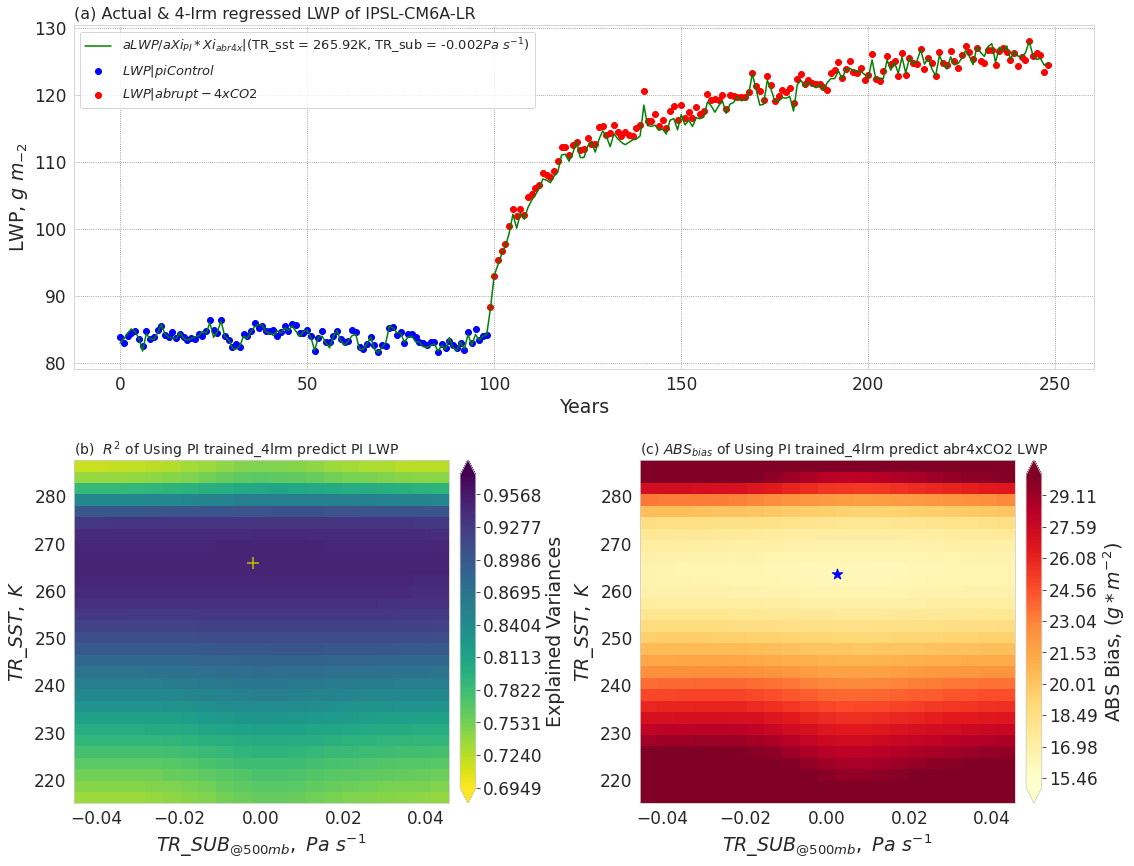

In [53]:
## PLot 5:

# modn = 'IPSLCM6ALR'

# plot settings:
parameters = {'axes.labelsize': 19, 'legend.fontsize': 17,
      'axes.titlesize': 16, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


#..print(linspace(nanpercentile(output_stat, 1.5), nanpercentile(output_stat, 99.5), 164))
#..pick the desired colormap
cmap  = plt.get_cmap('YlOrRd') 
cmap_2 = plt.get_cmap('viridis_r')   # 'YlOrRd'
norm1 = BoundaryNorm(levels_value1, ncolors= cmap.N, extend='both')
norm2 = BoundaryNorm(levels_value2, ncolors= cmap_2.N, extend='both')

fig5 =  plt.figure(figsize = (16.2, 12.64))
ax51  =  fig5.add_subplot(2, 2, (1, 2))
# subplot3 :
output_yrs = {}
output_yrs[deck_nas2[a]] = arange(0, shape_yr_modelPI[deck_nas2[a]]+150)
# print(output_yrs[deck_nas2[b]].shape)

ax51.scatter(output_yrs[deck_nas2[a]][:99], 1000.*output_4lrm_report[deck_nas2[a]][:99], label = 
            "$LWP|piControl $", c='b')
ax51.scatter(output_yrs[deck_nas2[a]][99:249], 1000.*output_4lrm_report[deck_nas2[a]][99:249], label = 
            "$LWP|abrupt-4xCO2 $", c= 'r')
ax51.plot(output_yrs[deck_nas2[a]], 1000.*output_4lrm_predict[deck_nas2[a]][:249], "g", 
         label="$aLWP/aXi_{PI}*{Xi_{abr4x}}| $"+ "(TR_sst = "+ str(TR_sst)+"K, "+ "TR_sub = "+ str(TR_sub)+ r"$Pa\ s^{-1}$" +")")
 
ax51.set_xlabel("Years")

ax51.set_ylabel("LWP, " + r"$g\ m_{-2}$")
ax51.set_title("(a) Actual & 4-lrm regressed LWP of IPSL-CM6A-LR", loc = 'left')
ax51.legend(loc = "upper left", prop={'size': 13})
#ax1.ylim((0.105, 0.121))


# subplot1
ax52  = plt.subplot(223)  #(16.2, 9.3))

im2  = ax52.pcolormesh(x_gcm, y_gcm, array(output_stat2), cmap=cmap_2, norm= norm2)
ax52.set_xlabel(r"$TR\_SUB_{@500mb},\ $"+ r"$Pa\ s^{-1}$")
ax52.set_ylabel(r"$TR\_SST,\ $" + r"$K $")
ax52.set_title("(b) " +r"$\ R^{2}$" + " of Using PI trained_4lrm predict PI LWP", loc='left', fontsize = 14)
# ax3.set_title("exp 'abrupt-4xCO2' GCM: BCCESM1 predict R_2", loc='left', fontsize = 11)
#.. add bestfit points
ax52.scatter(TR_sub_bestfit6, TR_sst_bestfit6, marker = '+', s= 125, c ='y')
fig5.colorbar(im2, ax = ax52, label= "Explained Variances", pad = 0.0235)


# subplot2
ax53  = plt.subplot(224)  #(16.2, 9.3))

im1  = ax53.pcolormesh(x_gcm, y_gcm, array(1000.*output_stat1), cmap=cmap, norm= norm1)   #..anmean_LWP_bin_Tskew_wvp..LWP_bin_Tskin_sub
ax53.set_xlabel(r"$TR\_SUB_{@500mb},\ $"+ r"$Pa\ s^{-1}$")
ax53.set_ylabel(r"$TR\_SST,\ $" + r"$K $")
ax53.set_title("(c) " +r"$ABS_{bias}$" + " of Using PI trained_4lrm predict abr4xCO2 LWP", loc='left', fontsize = 14)
ax53.scatter(TR_sub_bestfit5, TR_sst_bestfit5, marker = '*', s = 120, c='b')
fig5.colorbar(im1, ax = ax53, label= "ABS Bias,"+ r"$\ (g*m^{-2})$", pad = 0.0235, values = arange(15.00, 30.10, 0.011))



# # plt.suptitle( modn+ " Bias Metrics for USING piControl data Predict abr4xCO2 LWP", fontsize =18)

# # plt.legend(loc='upper right',  fontsize= 12)


# set the spacing between subplots and plot 
plt.subplots_adjust(left = 0.095, bottom=0.125, right = 0.97, top=0.98, wspace = 0.245, hspace = 0.265)
# # plt.savefig(path6+"plot5_model_bias_metrics_ipslcm6aLR", dpi=500)

# plt.subplot_tool()
#\# plt.show()
plt.savefig("plot5", dpi=500)

In [19]:
# Choice the model you wants:
a =8   # IPSL-CM6A-LR

TR_sst = 260.0   #K

ind_sstlt_PI =  nonzero(output_2lrm_flavra_PI[deck_nas2[a]]['SST'] < TR_sst)

ind_sstle_PI =  nonzero(output_2lrm_flavra_PI[deck_nas2[a]]['SST'] >= TR_sst)

ind_sstlt_abr =  nonzero(output_2lrm_flavra_abr[deck_nas2[a]]['SST'] < TR_sst)

ind_sstle_abr  =  nonzero(output_2lrm_flavra_abr[deck_nas2[a]]['SST'] >= TR_sst)

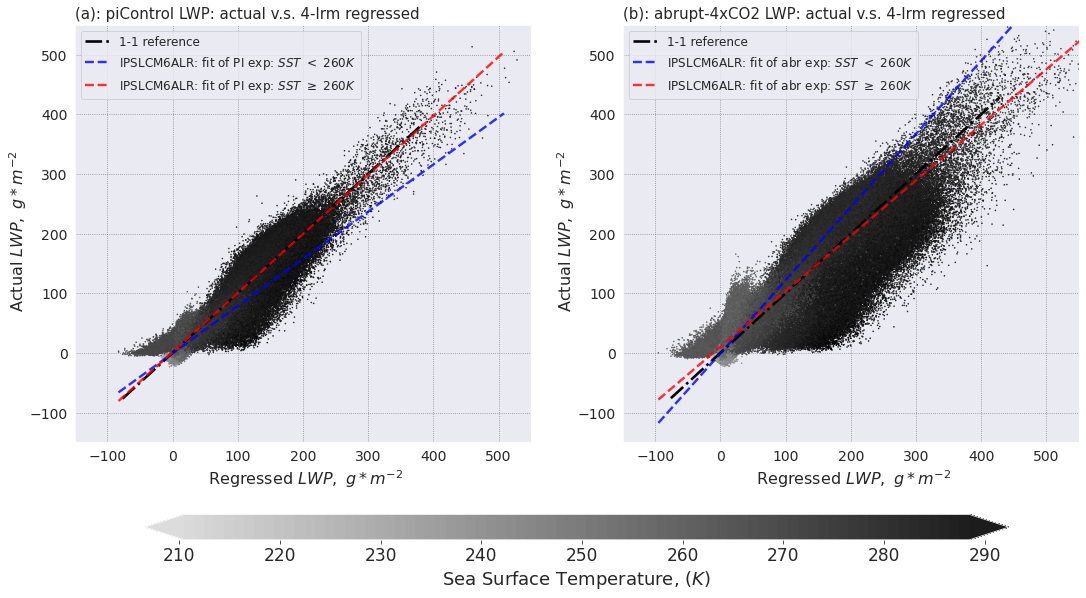

In [31]:
## PLot 4

# for a in range(len(deck2)):
a =8

TR_sst = 260.0   #K

ind_sstlt_PI =  nonzero(output_4lrm_flavra_PI[deck_nas2[a]]['SST'] < TR_sst)

ind_sstle_PI =  nonzero(output_4lrm_flavra_PI[deck_nas2[a]]['SST'] >= TR_sst)

ind_sstlt_abr =  nonzero(output_4lrm_flavra_abr[deck_nas2[a]]['SST'] < TR_sst)

ind_sstle_abr  =  nonzero(output_4lrm_flavra_abr[deck_nas2[a]]['SST'] >= TR_sst)



fig4, ax4 = plt.subplots(1, 2, figsize = (18., 10.6))   #(16.2, 9.3))

parameters = {'axes.labelsize': 18, 'legend.fontsize': 12,
          'axes.titlesize': 15, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

my_colors= array([
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])   #..plt.rcParams['axes.prop_cycle']()
my_colorst= my_colors


# actual & regressed MONTHLY LWP data: 
PI_2lrm_actual  = array(output_4lrm_flavra_PI[deck_nas2[a]]['LWP'])
abr_2lrm_actual  = array(output_4lrm_flavra_abr[deck_nas2[a]]['LWP'])
PI_2lrm_predict  =  array(output_4lrm_mon_bin_LWPpredi_PI[deck_nas2[a]]).flatten()
abr_2lrm_predict  =  array(output_4lrm_mon_bin_LWPpredi_abr[deck_nas2[a]]).flatten()

# print(PI_2lrm_predict.shape, PI_2lrm_actual.shape)


cax_1 = ax4[1].scatter(1000.*abr_2lrm_predict,  1000.*abr_2lrm_actual,  c = array(output_2lrm_flavra_abr[deck_nas2[a]]['SST']), s= 0.3, cmap= 'gist_yarg')


cax_0 = ax4[0].scatter(1000.*PI_2lrm_predict,  1000.*PI_2lrm_actual,  c = array(output_2lrm_flavra_PI[deck_nas2[a]]['SST']), s = 0.3, cmap= 'gist_yarg')

fig4.colorbar(cax_1, ax = [ax4[0], ax4[1]], label ="Sea Surface Temperature," + r"$\ (K)$", orientation='horizontal', extend='both', pad = 0.125, shrink = 0.86, aspect=31, 
             values = arange(210., 290., 1.))   #.. viridis_r
# cb1.set_ticks(array([210., 220., 230., 240., 260., 275., 290.]))
# cb1.set_ticklabels([210, 220, 230, 240, 260, 270, 275, 290])


# Reference line added:
x1  = linspace(nanpercentile(1000.*abr_2lrm_actual, 0.01)- 60., nanpercentile(1000.*abr_2lrm_actual, 99)+180., 50)
y1  = x1
x2  = linspace(nanpercentile(1000.*PI_2lrm_actual, 0.01)- 60., nanpercentile(1000.*PI_2lrm_actual, 99)+180., 50)
y2  = x2


ax4[0].plot(x2, y2, color= 'k', linewidth =2.6, linestyle = '-.', label = "1-1 reference")
ax4[1].plot(x1, y1, color= 'k', linewidth =2.6, linestyle = '-.', label = "1-1 reference")


# add 2 polyfit line for group_1: SST<240K and points group_2: SST>= 240K

#  axes[1]:
par_cold_abr = polyfit(1000.*abr_2lrm_predict[ind_sstlt_abr], 1000.*abr_2lrm_actual[ind_sstlt_abr], 1)
par_warm_abr = polyfit(1000.*abr_2lrm_predict[ind_sstle_abr], 1000.*abr_2lrm_actual[ind_sstle_abr], 1)

x_abr =  linspace(1000.*min(abr_2lrm_predict) , 1000.*max(abr_2lrm_predict)-20.,  30)
yc_abr = par_cold_abr[0]*x_abr + par_cold_abr[1]
l1, = ax4[1].plot(x_abr, yc_abr, alpha = 0.8, linestyle = '--',  c = 'b', linewidth= 2.4, label=deck_nas2[a]+ ": fit of abr exp: "+ r"$SST\ <\ 260K$")

yw_abr = par_warm_abr[0]*x_abr + par_warm_abr[1]
l2, = ax4[1].plot(x_abr, yw_abr, alpha = 0.8, linestyle = '--',  c = 'r', linewidth= 2.4,  label=deck_nas2[a]+ ": fit of abr exp: "+ r"$SST\ \geq\ 260K$")
ax4[1].legend(loc = 'upper left')


# axes[0]:
par_cold_PI = polyfit(1000.*PI_2lrm_predict[ind_sstlt_PI], 1000.*PI_2lrm_actual[ind_sstlt_PI], 1)
par_warm_PI = polyfit(1000.*PI_2lrm_predict[ind_sstle_PI], 1000.*PI_2lrm_actual[ind_sstle_PI], 1)

x_PI =  linspace(1000.*min(PI_2lrm_predict), 1000.*max(PI_2lrm_predict)- 20., 30)
yc_PI = par_cold_PI[0] *x_PI + par_cold_PI[1]
l3, = ax4[0].plot(x_PI, yc_PI, alpha = 0.8, linestyle = '--',  c = 'b', linewidth= 2.4, label=deck_nas2[a]+ ": fit of PI exp: "+ r"$SST\ <\ 260K$" )

yw_PI = par_warm_PI[0]*x_PI + par_warm_PI[1]
l4, = ax4[0].plot(x_PI, yw_PI, alpha = 0.8, linestyle = '--',  c = 'r', linewidth= 2.4, label=deck_nas2[a]+ ": fit of PI exp: "+ r"$SST\ \geq\ 260K$" )
ax4[0].legend(loc = 'upper left')


ax4[0].set_xlabel(" Regressed "+r"$LWP,\ g*m^{-2}$")
ax4[0].set_ylabel(" Actual "+ r"$LWP,\ g*m^{-2}$", labelpad= 0.65)

ax4[1].set_xlabel(" Regressed "+r"$LWP,\ g*m^{-2}$")
ax4[1].set_ylabel(" Actual "+ r"$LWP,\ g*m^{-2}$", labelpad= 0.525)

ax4[0].set_title("(a): piControl LWP: actual v.s. 4-lrm regressed", loc = 'left')
ax4[1].set_title("(b): abrupt-4xCO2 LWP: actual v.s. 4-lrm regressed", loc = 'left')

# plt.suptitle(deck_nas2[a] + "_Contrast between GCM output and 4-lrm regressed LWP ", fontsize = 23)
ax4[0].set_xlim([-150., 550.])
ax4[0].set_ylim([-150., 550.])
ax4[1].set_xlim([-150., 550.])
ax4[1].set_ylim([-150., 550.])
ax4[0].set_xticks([-100., 0., 100., 200., 300., 400., 500.])
ax4[1].set_xticks([-100, 0, 100, 200, 300, 400, 500])


#.. plot
#..plt.savefig("Actual&RegressedValues_"+ deck_nas[a]+ "_1LRM_" +str(round(TR_sst))+'K', dpi= 100)
# plt.savefig("plot4_ActualvsRegressed_LWP_ipslcm6aLR_bestfit5", dpi = 500)



plt.savefig("plot4", dpi = 500)

In [7]:
##PLot 6: scatter plot for 18 GCMs regressed_bias of diff lrm (INCLUDING BESTFIT5/ BESTFIT6):


output_ARRAY = {}
output_intermedia = {}

output_dict0_PI =  {}
output_dict0_abr = {}
output_mon_bin_abr={}
output_mon_bin_PI ={}
output_mon_bin_LWPactual_abr = {}
output_mon_bin_LWPactual_PI = {}

output_mon_bin_LWPpredi_PI =  {}
output_mon_bin_LWPpredi_abr = {}
# output_LRM_st =  {}
# output_LRM_le = {}
shape_mon_modelPI =  {}
shape_mon_modelabr = {}

for i in range(len(deck2)):

    #.. Bestfit6_2lrm
    folder_bestfit6_2lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test6)fit_'+'*'+'_dats.npz')
    if len(str(folder_bestfit6_2lrm[0])) < len(str(folder_bestfit6_2lrm[1])):
        folder_2lrm = folder_bestfit6_2lrm[0]
    
    else:
        folder_2lrm = folder_bestfit6_2lrm[1]
    #.. 273K-(/0.0Pa) 2lrm
    # folder_2lrm = glob.glob(path1+deck2[i]['modn']+'mond_273_dats.npz')
    print(folder_2lrm)
    
    output_ARRAY[deck_nas2[i]] =  load(folder_2lrm, allow_pickle=True)  #+'_'+str(Tr_sst)
    
    # output_ARRAY[deck_nas2[i]] =  load(path1+deck2[i]['modn']+'mond_'+str(273)+'K_'+'ud'+str(0.0)+'_dats.npz', allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas2[i]]  = output_ARRAY[deck_nas2[i]]['rawdata_dict']

    output_dict0_PI[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict0_PI_var']
    output_dict0_abr[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict0_abr_var']
    shape_mon_modelPI[deck_nas2[i]]   =  output_dict0_PI[deck_nas2[i]]['shape_yr']
    shape_mon_modelabr[deck_nas2[i]]   =  output_dict0_abr[deck_nas2[i]]['shape_yr']
    output_mon_bin_abr[deck_nas2[i]]   = output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas2[i]]    = output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']

    output_mon_bin_LWPactual_abr[deck_nas2[i]]   =  output_mon_bin_abr[deck_nas2[i]]['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas2[i]]   =  output_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_abr']


    #.... 0K -1lrm
    print(glob.glob(path1 +deck2[i]['modn']+'mond_'+str(0.0)+ '_dats.npz'))
    
    output_ARRAY[deck_nas2[i]+'1lrm'] =  load(path1 +deck2[i]['modn']+'mond_'+str(0.0)+ '_dats.npz', allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas2[i]+'1lrm']  = output_ARRAY[deck_nas2[i]+'1lrm']['rawdata_dict']

    output_dict0_PI[deck_nas2[i]+'1lrm']  =   output_intermedia[deck_nas2[i]+'1lrm'][()]['dict0_PI_var']
    output_dict0_abr[deck_nas2[i]+'1lrm']  =   output_intermedia[deck_nas2[i]+'1lrm'][()]['dict0_abr_var']
    # shape_mon_modelPI[deck_nas2[i]+'1lrm']   =  output_dict0_PI[deck_nas2[i]+'1lrm']['shape_yr']
    # shape_mon_modelabr[deck_nas2[i]+'1lrm']   =  output_dict0_abr[deck_nas2[i]+'1lrm']['shape_yr']
    output_mon_bin_abr[deck_nas2[i]+'1lrm']   =  output_dict0_abr[deck_nas2[i]+'1lrm']['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas2[i]+'1lrm']    =  output_dict0_PI[deck_nas2[i]+'1lrm']['dict1_mon_bin_PI']


    output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm']   =  output_mon_bin_abr[deck_nas2[i]+'1lrm']['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas2[i]+'1lrm']   =  output_mon_bin_PI[deck_nas2[i]+'1lrm']['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas2[i]+'1lrm'] =  output_intermedia[deck_nas2[i]+'1lrm'][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas2[i]+'1lrm'] = output_intermedia[deck_nas2[i]+'1lrm'][()]['LWP_predi_bin_abr']

    
    #.... Best fit 5, least abr abs(bias):
    
    folder_bestfit5_4lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test5)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_bestfit5_4lrm[0])

    output_ARRAY[deck_nas2[i]+'Bestfit5'] =  load(folder_bestfit5_4lrm[0], allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas2[i]+'Bestfit5']  = output_ARRAY[deck_nas2[i]+'Bestfit5']['rawdata_dict']

    output_dict0_PI[deck_nas2[i]+'Bestfit5']  =   output_intermedia[deck_nas2[i]+'Bestfit5'][()]['dict0_PI_var']
    output_dict0_abr[deck_nas2[i]+'Bestfit5']  =   output_intermedia[deck_nas2[i]+'Bestfit5'][()]['dict0_abr_var']
    # shape_mon_modelPI[deck_nas2[i]+'Bestfit5']   =  output_dict0_PI[deck_nas2[i]+'Bestfit5']['shape_yr']
    # shape_mon_modelabr[deck_nas2[i]+'Bestfit5']   =  output_dict0_abr[deck_nas2[i]+'Bestfit5']['shape_yr']

    output_mon_bin_abr[deck_nas2[i]+'Bestfit5']   =  output_dict0_abr[deck_nas2[i]+'Bestfit5']['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas2[i]+'Bestfit5']    =  output_dict0_PI[deck_nas2[i]+'Bestfit5']['dict1_mon_bin_PI']

    output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5']   =  output_mon_bin_abr[deck_nas2[i]+'Bestfit5']['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas2[i]+'Bestfit5']   =  output_mon_bin_PI[deck_nas2[i]+'Bestfit5']['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas2[i]+'Bestfit5'] =  output_intermedia[deck_nas2[i]+'Bestfit5'][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit5'] = output_intermedia[deck_nas2[i]+'Bestfit5'][()]['LWP_predi_bin_abr']
    

    #.... Best fit 6, largest_pi_R_2:

    folder_bestfit6_4lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test6)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_bestfit6_4lrm[0])

    output_ARRAY[deck_nas2[i]+'Bestfit6'] =  load(folder_bestfit6_4lrm[0], allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas2[i]+'Bestfit6']  = output_ARRAY[deck_nas2[i]+'Bestfit6']['rawdata_dict']

    output_dict0_PI[deck_nas2[i]+'Bestfit6']  =   output_intermedia[deck_nas2[i]+'Bestfit6'][()]['dict0_PI_var']
    output_dict0_abr[deck_nas2[i]+'Bestfit6']  =   output_intermedia[deck_nas2[i]+'Bestfit6'][()]['dict0_abr_var']
    # shape_mon_modelPI[deck_nas2[i]+'Bestfit6']   =  output_dict0_PI[deck_nas2[i]+'Bestfit6']['shape_yr']
    # shape_mon_modelabr[deck_nas2[i]+'Bestfit6']   =  output_dict0_abr[deck_nas2[i]+'Bestfit6']['shape_yr']

    output_mon_bin_abr[deck_nas2[i]+'Bestfit6']   =  output_dict0_abr[deck_nas2[i]+'Bestfit6']['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas2[i]+'Bestfit6']    =  output_dict0_PI[deck_nas2[i]+'Bestfit6']['dict1_mon_bin_PI']

    output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6']   =  output_mon_bin_abr[deck_nas2[i]+'Bestfit6']['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas2[i]+'Bestfit6']   =  output_mon_bin_PI[deck_nas2[i]+'Bestfit6']['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas2[i]+'Bestfit6'] =  output_intermedia[deck_nas2[i]+'Bestfit6'][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit6'] = output_intermedia[deck_nas2[i]+'Bestfit6'][()]['LWP_predi_bin_abr']
    



/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1_best(test6)fit_270.46_dats.npz
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1mond_0.0_dats.npz']
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1_best(test5)fit_270.46K_ud-0.2_dats.npz
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1_best(test6)fit_270.46K_ud-0.2_dats.npz
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5_best(test6)fit_256.87_dats.npz
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5mond_0.0_dats.npz']
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5_best(test5)fit_268.7K_ud-0.0_dats.npz
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5_best(test6)fit_256.87K_ud-0.8_dats.npz
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2_best(test6)fit_269.42_dats.npz
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2mond_0.0_dats.npz']
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM

In [8]:
output_bias = {}
output_mean_LWP =  {}
output_meandelta_LWP   = {}
output_dabrpi_actual = {}
output_dabrpi_predict = {}
output_rmse_delta_LWP = {}

for i in range(len(deck2)):
    
    #.... bestfit5, 2LRM
    output_bias[deck_nas2[i]] =  sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]] - output_mon_bin_LWPactual_abr[deck_nas2[i]]))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]].flatten()) 
    output_mean_LWP[deck_nas2[i]+'_predict_15yrs_273K']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_predict_150yrs_273K']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]][:12*150,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_15yrs_273K']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_150yrs_273K']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas2[i]]  =  output_mon_bin_LWPactual_abr[deck_nas2[i]]  -  nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]])
    output_dabrpi_predict[deck_nas2[i]] =  output_mon_bin_LWPpredi_abr[deck_nas2[i]] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]])
    
    output_meandelta_LWP[deck_nas2[i]+'_predict_15yrs_273K']   =   nanmean(output_dabrpi_predict[deck_nas2[i]][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_273K']  =   nanmean(output_dabrpi_predict[deck_nas2[i]][:12*150,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_15yrs_273K']    =   nanmean(output_dabrpi_actual[deck_nas2[i]][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_273K']   =   nanmean(output_dabrpi_actual[deck_nas2[i]][:12*150,:,:])
    output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_273K']  =  sqrt( mean_squared_error(output_dabrpi_actual[deck_nas2[i]][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]][:12*150,:,:].reshape(-1,1)) )
    
    
    #.... 0K, 1LRM
    output_bias[deck_nas2[i]+'1lrm'] =  sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'1lrm'] - output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm']))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm'].flatten()) 
    output_mean_LWP[deck_nas2[i]+'_predict_15yrs_0K']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'1lrm'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_predict_150yrs_0K']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'1lrm'][:12*150,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_15yrs_0K']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_150yrs_0K']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm'][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas2[i]+'1lrm']  =  output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm']  -  nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'1lrm'])
    output_dabrpi_predict[deck_nas2[i]+'1lrm'] =  output_mon_bin_LWPpredi_abr[deck_nas2[i]+'1lrm'] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]+'1lrm'])
    
    output_meandelta_LWP[deck_nas2[i]+'_predict_15yrs_0K']   =   nanmean(output_dabrpi_predict[deck_nas2[i]+'1lrm'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_0K']  =   nanmean(output_dabrpi_predict[deck_nas2[i]+'1lrm'][:12*150,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_15yrs_0K']    =   nanmean(output_dabrpi_actual[deck_nas2[i]+'1lrm'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_0K']   =   nanmean(output_dabrpi_actual[deck_nas2[i]+'1lrm'][:12*150,:,:])
    output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_0K']  =  sqrt( mean_squared_error(output_dabrpi_actual[deck_nas2[i]+'1lrm'][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]+'1lrm'][:12*150,:,:].reshape(-1,1)) )
    
    #.... defined by Least_abs(bias)-> Bestfit5, 4LRM DATA
    #..least_abs(abr-bias)
    output_bias[deck_nas2[i]+'Bestfit5'] =  sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit5'] - output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5']))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5'].flatten()) 
    output_mean_LWP[deck_nas2[i]+'_predict_15yrs_leastabrbias']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit5'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_predict_150yrs_leastabrbias']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit5'][:12*150,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_15yrs_leastabrbias']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_150yrs_leastabrbias']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5'][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas2[i]+'Bestfit5']  =  output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5']  -  nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'Bestfit5'])
    output_dabrpi_predict[deck_nas2[i]+'Bestfit5'] =  output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit5'] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]+'Bestfit5'])
    
    output_meandelta_LWP[deck_nas2[i]+'_predict_15yrs_leastabrbias']   =   nanmean(output_dabrpi_predict[deck_nas2[i]+'Bestfit5'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_leastabrbias']  =   nanmean(output_dabrpi_predict[deck_nas2[i]+'Bestfit5'][:12*150,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_15yrs_leastabrbias']    =   nanmean(output_dabrpi_actual[deck_nas2[i]+'Bestfit5'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_leastabrbias']   =   nanmean(output_dabrpi_actual[deck_nas2[i]+'Bestfit5'][:12*150,:,:])
    output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_leastabrbias']  =  sqrt( mean_squared_error(output_dabrpi_actual[deck_nas2[i]+'Bestfit5'][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]+'Bestfit5'][:12*150,:,:].reshape(-1,1)) )
    
    #.... defined by Least_abs(bias)-> Bestfit6, 4LRM DATA
    #..largest_pi R_2
    output_bias[deck_nas2[i]+'Bestfit6'] =  sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit6'] - output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6']))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6'].flatten()) 
    output_mean_LWP[deck_nas2[i]+'_predict_15yrs_largestpiR2']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit6'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_predict_150yrs_largestpiR2']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit6'][:12*150,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_15yrs_largestpiR2']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_150yrs_largestpiR2']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6'][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas2[i]+'Bestfit6']  =  output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6']  -  nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'Bestfit6'])
    output_dabrpi_predict[deck_nas2[i]+'Bestfit6'] =  output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit6'] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]+'Bestfit6'])
    
    output_meandelta_LWP[deck_nas2[i]+'_predict_15yrs_largestpiR2']   =   nanmean(output_dabrpi_predict[deck_nas2[i]+'Bestfit6'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_largestpiR2']  =   nanmean(output_dabrpi_predict[deck_nas2[i]+'Bestfit6'][:12*150,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_15yrs_largestpiR2']    =   nanmean(output_dabrpi_actual[deck_nas2[i]+'Bestfit6'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_largestpiR2']   =   nanmean(output_dabrpi_actual[deck_nas2[i]+'Bestfit6'][:12*150,:,:])
    output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_largestpiR2']  =  sqrt( mean_squared_error(output_dabrpi_actual[deck_nas2[i]+'Bestfit6'][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]+'Bestfit6'][:12*150,:,:].reshape(-1,1)) )
    
    # print(output_bias[deck_nas2[i]])
    # print(len(output_mon_bin_LWPactual_abr[deck_nas2[i]].flatten()))
    
    # print(output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_0K'], output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_0K'])
    

In [9]:
from scipy.optimize import curve_fit

def target_func(x, m, k):
    
    '''
    1-d line linear fit
    '''
    y = m*x + k
    return y



def calc_r2(Y_pre, Y):
    
    residual_ydata = array(Y).reshape(-1,1) -  array(Y_pre).reshape(-1,1)
    
    ss_res_bar       = (residual_ydata**2).sum()
    ss_tot_bar       = ((Y - Y.mean())**2).sum()
    R_square  = 1. - (ss_res_bar / ss_tot_bar )

    return R_square

1.0462863740225592 1.903154831530016 0.35386492180692464
[[1.04628637]] [1.90315483]


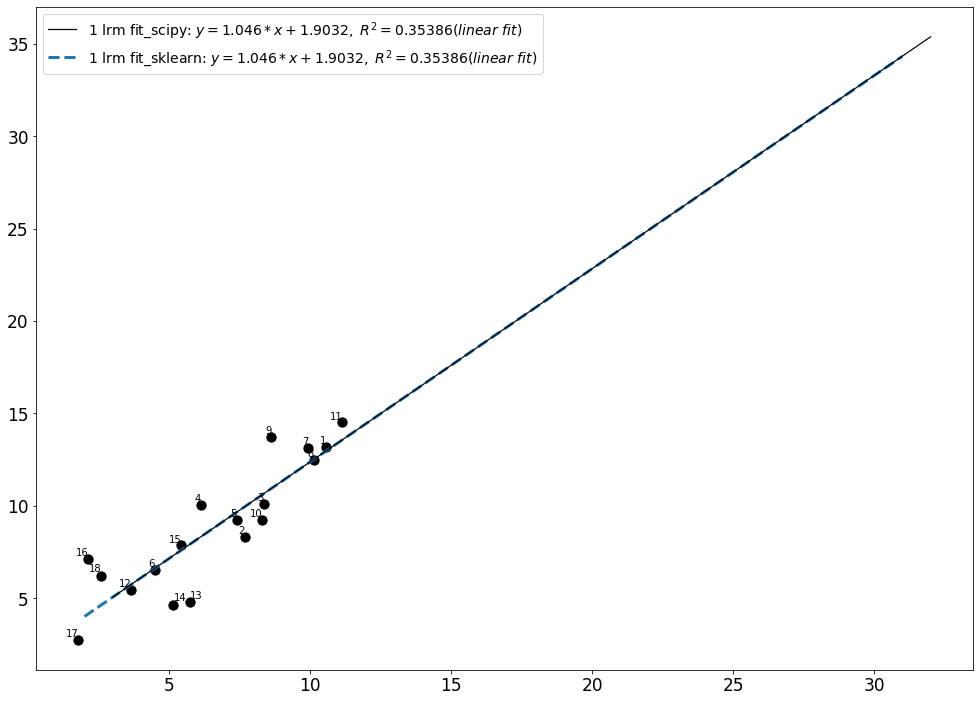

In [11]:
## Test PLot6:
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 15, 'legend.fontsize': 14, 
       'axes.titlesize': 16, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


fig6  = plt.figure(figsize =(16.8, 12.2))  # (16.2, 9.3))
ax6  = plt.axes()

# x = arange(0.003, 0.018, 0.001)   #..15 yr
# x = arange(0.006, 0.032, 0.001)   #..150yrs
x   = linspace(0.002, 0.031, 18) * 1000.   # for all
y   = linspace(0.003, 0.032, 18) * 1000.
# deck_marker = [',', '.', 'v', '^', '<', '>', 'o', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# output_dabr_pi_obspredi  = {}

output_mons = {}
regr_data_0K =   []
report_data_0K =   []

regr_data_273K = []
report_data_273K = []

regr_data_leastabrbias = []
report_data_leastabrbias = []

regr_data_largestpiR2 = []
report_data_largestpiR2 = []

yr   =  150
# plt.gcf()

plot_scat1 = []
plot_scat2 = []
plot_scat3 = []
plot_scat4 = []


for a in range(len(deck2)):    
    
    output_mons[deck_nas2[a]]  = arange(shape_mon_modelabr[deck_nas2[a]])   #..how many years for collected 'abr-4x' data

    scp1 = ax6.scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'], s=86, marker ='o', color="black") # black
    regr_data_0K = append(regr_data_0K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'])
    report_data_0K = append(report_data_0K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'])
    # scatter group1
    plot_scat1.append(scp1)
    
    # Add annotate to the first point of each GCM
    ax6.annotate(n_name[a], xy=(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K']), 
                 xytext=(0, 2.17 - random.rand(1)), textcoords = "offset points", 
                 horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'] else "right", verticalalignment = "bottom")


#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K, POCV_0K  = curve_fit(target_func, regr_data_0K, report_data_0K)
# Calc the R square, plot the fit line:
calced_ydata_0K = target_func(regr_data_0K, *POPT_0K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_0K  = calc_r2(regr_data_0K, report_data_0K)
fitp1 = plt.plot(y, POPT_0K[0] * y + POPT_0K[1], label="1 lrm fit_scipy: "+r"$y = %.3f * x + %.4f,\ R^{2}=%.5f(linear\ fit)$" % (POPT_0K[0], POPT_0K[1], R_square_0K), color="black", linewidth = 1.2, zorder = 4)
print(POPT_0K[0], POPT_0K[1], R_square_0K)

# sklearn-liner regression 
regr_skk  = linear_model.LinearRegression()

result1 = regr_skk.fit(regr_data_0K.reshape(-1,1), report_data_0K.reshape(-1,1))
print(result1.coef_, result1.intercept_)

fitp2 = plt.plot(x, (x * 1.046 + 1.90315), linestyle = '--', linewidth=3, label="1 lrm fit_sklearn: "+r"$y = %.3f * x + %.4f,\ R^{2}=%.5f(linear\ fit)$" % (regr_skk.coef_, regr_skk.intercept_, r2_score(report_data_0K.reshape(-1,1), regr_data_0K.reshape(-1,1))))
# Add Reference line:
# Refp  = plt.plot(x, y, label = 'reference line', c='blue', linestyle='--', linewidth = 3.8, zorder = 5)  # Blue

# sns.set_style("darkgrid", {"grid.color": "gray", "grid.linestyle": ":"})
plt.legend()
# print(linspace(0.002, 0.031, 18)*1000. * result1.coef_)

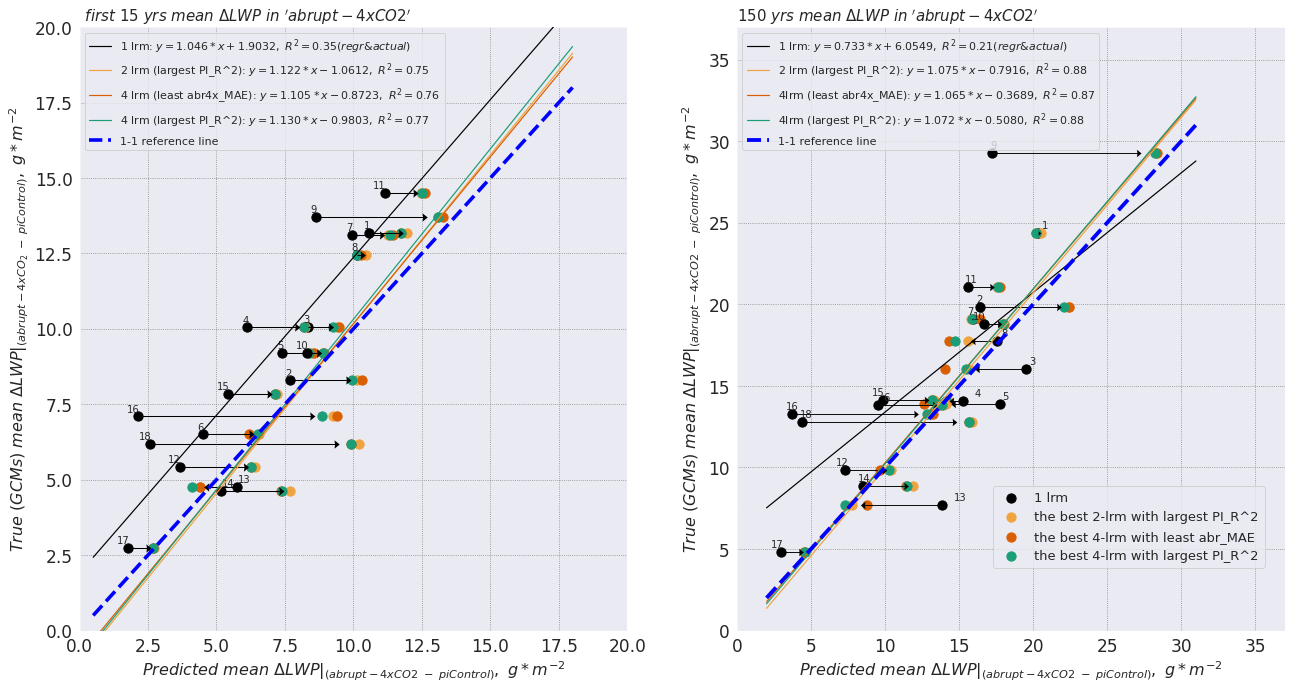

In [16]:
## PLot6:
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 16, 'legend.fontsize': 11, 
       'axes.titlesize': 17, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


fig6, ax6  = plt.subplots(1, 2, figsize =(21.6, 11.1))  # (16.2, 9.3))

x_15yr = linspace(0.0005, 0.018, 18) *1000.  #..15 yr
y_15yr = x_15yr
x   = linspace(0.002, 0.031, 18) * 1000.   # for all 150yr
y   = x

# deck_marker = [',', '.', 'v', '^', '<', '>', 'o', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# output_dabr_pi_obspredi  = {}

# 15yr 
regr_data_0K_15yr =   []
report_data_0K_15yr =   []
regr_data_273K_15yr = []
report_data_273K_15yr = []
regr_data_leastabrbias_15yr = []
report_data_leastabrbias_15yr = []
regr_data_largestpiR2_15yr = []
report_data_largestpiR2_15yr = []


# 150 yr
regr_data_0K =   []
report_data_0K =   []
regr_data_273K = []
report_data_273K = []
regr_data_leastabrbias = []
report_data_leastabrbias = []
regr_data_largestpiR2 = []
report_data_largestpiR2 = []

yr1   =  150
yr2   =  15
# plt.gcf()
output_mons   =  {}
plot_scat1 = []
plot_scat2 = []
plot_scat3 = []
plot_scat4 = []

plot_scat1_15yr = []
plot_scat2_15yr = []
plot_scat3_15yr = []
plot_scat4_15yr = []

# 150 yr
for a in range(len(deck2)):    
    
    output_mons[deck_nas2[a]]  = arange(shape_mon_modelabr[deck_nas2[a]])   #..how many years for collected 'abr-4x' data

    scp1 = ax6[1].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], s=86, marker ='o', color="black") # black
    regr_data_0K = append(regr_data_0K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'])
    report_data_0K = append(report_data_0K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'])
    # scatter group1
    plot_scat1.append(scp1)
    
    scp2 = ax6[1].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'], s=86, marker ='o', color="#f1a340") # yellow
    regr_data_273K = append(regr_data_273K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'])
    report_data_273K = append(report_data_273K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'])
    # scatter group2
    plot_scat2.append(scp2)
    
    scp3 = ax6[1].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'], s=86, marker = 'o', color="#d95f02")# red
    regr_data_leastabrbias = append(regr_data_leastabrbias, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'])
    report_data_leastabrbias = append(report_data_leastabrbias, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'])
    # scatter group3
    plot_scat3.append(scp3)
    
    scp4 = ax6[1].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'], s=86, marker ='o', color="#1b9e77") # green
    regr_data_largestpiR2 = append(regr_data_largestpiR2, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'])
    report_data_largestpiR2 = append(report_data_largestpiR2, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'])
    # scatter group4
    plot_scat4.append(scp4)
    
    
    # #.. Observation (MAC_LWP) calced sensitivity for each of GCMs
    # output_dabr_pi_obspredi[deck_nas2[a]]  = output_obsercoef_predi[deck_nas2[a]][shape_yr_modelPI[deck_nas2[a]]:] - mean(output_obsercoef_predi[deck_nas2[a]][0:shape_yr_modelPI[deck_nas[a]]])
    # plt.scatter(output_dabr_pi_obspredi[deck_nas2[a]][yr],  output_dabr_pi_report[deck_nas2[a]][yr] , s = 125., label = deck_nas2[a] + ' add OBS sensitivities')
    # h = append(h, output_dabr_pi_obspredi[deck_nas2[a]])
    
    # Add line/Arrows between scatter Point
    ax6[1].quiver(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], 
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K']),
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K']),
              units='width', angles='xy', scale_units='xy', width=0.0017, scale = 1.10, color = "black", headwidth=8, zorder=2)

    # Add annotate to the first point of each GCM
    ax6[1].annotate(n_name[a], xy=(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K']), 
                 xytext=(12.9*random.rand(1), 2.77), textcoords = "offset points", 
                 horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'] else "right", verticalalignment = "bottom")

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K, POCV_0K  = curve_fit(target_func, regr_data_0K , report_data_0K)
# Calc the R square, plot the fit line:
calced_ydata_0K = target_func(regr_data_0K, *POPT_0K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_0K  = calc_r2(regr_data_0K, report_data_0K)
fitp1 = ax6[1].plot(y, POPT_0K[0] * x + POPT_0K[1], label="1 lrm: "+r"$y = %.3f * x + %.4f,\ R^{2}= %.2f(regr&actual)$" % (POPT_0K[0], POPT_0K[1], R_square_0K), color="black", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
POPT_273K, POCV_273K  = curve_fit(target_func, regr_data_273K, report_data_273K)
# Calc the R square, plot the fit line:
calced_ydata_273K  = target_func(regr_data_273K, *POPT_273K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_273K  = calc_r2(regr_data_273K, report_data_273K)
fitp2 = ax6[1].plot(y, POPT_273K[0] * x + POPT_273K[1], label="2 lrm (largest PI_R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_273K[0], POPT_273K[1], R_square_273K), color="#f1a340", linewidth = 1.2, zorder = 4)


#.. linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model
POPT_leastabrbias, POCV_leastabrbias  = curve_fit(target_func, regr_data_leastabrbias, report_data_leastabrbias)
# Calc the R square, plot the fit line:
calced_ydata_leastabrbias = target_func(regr_data_leastabrbias, *POPT_leastabrbias)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_leastabrbias  = calc_r2(regr_data_leastabrbias, report_data_leastabrbias)
fitp3 = ax6[1].plot(y, POPT_leastabrbias[0] * x + POPT_leastabrbias[1], label="4lrm (least abr4x_MAE): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_leastabrbias[0], POPT_leastabrbias[1], R_square_leastabrbias), color="#d95f02", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
POPT_largestpiR2, POCV_largestpiR2  = curve_fit(target_func, regr_data_largestpiR2, report_data_largestpiR2)
# Calc the R square, plot the fit line:
calced_ydata_largestpiR2 = target_func(regr_data_largestpiR2, *POPT_largestpiR2)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_largestpiR2  = calc_r2(regr_data_largestpiR2, report_data_largestpiR2)
fitp3 = ax6[1].plot(y, POPT_largestpiR2[0] * x + POPT_largestpiR2[1], label= "4lrm (largest PI_R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_largestpiR2[0], POPT_largestpiR2[1], R_square_largestpiR2), color="#1b9e77", linewidth = 1.2, zorder = 4)

###### end fitting_line plot

# Add Reference line:
Refp  = ax6[1].plot(x, y, label = "1-1 reference line", c='blue', linestyle= '--', linewidth = 3.8, zorder = 5)  # Blue


# Observational band:
# plt.plot(full(len(x), (min(h) - 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
# plt.plot(full(len(x), (max(h) + 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
ax6[1].set_xlim([0., 37.])
ax6[1].set_ylim([0., 37.])

ax6[1].set_xlabel(r"$ Predicted\ mean\ \Delta LWP|_{(abrupt-4xCO2\ -\ piControl)},\ $" + r"$g*m^{-2}$")
ax6[1].set_ylabel(r"$ True\ (GCMs)\ mean\ \Delta LWP|_{(abrupt-4xCO2\ -\ piControl)},\ $" + r"$g*m^{-2}$")

ax6[1].set_title( r"$%d\ yrs\ mean\ \Delta LWP\ in\ 'abrupt-4xCO2'$"%(yr1) , loc ='left', fontsize =15)
legend61 = ax6[1].legend([scp1, scp2, scp3, scp4], ['1 lrm', 'the best 2-lrm with largest PI_R^2', 'the best 4-lrm with least abr_MAE ', 'the best 4-lrm with largest PI_R^2'], 
                    loc='lower right', bbox_to_anchor=(0.975, 0.093), fontsize= 13)
ax6[1].legend(loc='upper left')
ax6[1].add_artist(legend61)

sns.set_style("darkgrid", {"grid.color": "gray", "grid.linestyle": ":"})


# 15yr:

for a in range(len(deck2)):    
    

    scp1_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'], s=86, marker ='o', color="black") # black
    regr_data_0K_15yr = append(regr_data_0K_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'])
    report_data_0K_15yr = append(report_data_0K_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'])
    # scatter group1
    plot_scat1_15yr.append(scp1_15yr)
    
    scp2_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'], s=86, marker ='o', color="#f1a340") # yellow
    regr_data_273K_15yr = append(regr_data_273K_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'])
    report_data_273K_15yr = append(report_data_273K_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'])
    # scatter group2
    plot_scat2_15yr.append(scp2_15yr)
    
    scp3_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_leastabrbias'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_leastabrbias'], s=86, marker = 'o', color="#d95f02")# red
    regr_data_leastabrbias_15yr = append(regr_data_leastabrbias_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_leastabrbias'])
    report_data_leastabrbias_15yr = append(report_data_leastabrbias_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_leastabrbias'])
    # scatter group3
    plot_scat3_15yr.append(scp3_15yr)
    
    scp4_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_largestpiR2'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_largestpiR2'], s=86, marker ='o', color="#1b9e77") # green
    regr_data_largestpiR2_15yr = append(regr_data_largestpiR2_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_largestpiR2'])
    report_data_largestpiR2_15yr = append(report_data_largestpiR2_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_largestpiR2'])
    # scatter group4
    plot_scat4_15yr.append(scp4_15yr)
    
    
    # #.. Observation (MAC_LWP) calced sensitivity for each of GCMs
    # output_dabr_pi_obspredi[deck_nas2[a]]  = output_obsercoef_predi[deck_nas2[a]][shape_yr_modelPI[deck_nas2[a]]:] - mean(output_obsercoef_predi[deck_nas2[a]][0:shape_yr_modelPI[deck_nas[a]]])
    # plt.scatter(output_dabr_pi_obspredi[deck_nas2[a]][yr],  output_dabr_pi_report[deck_nas2[a]][yr] , s = 125., label = deck_nas2[a] + ' add OBS sensitivities')
    # h = append(h, output_dabr_pi_obspredi[deck_nas2[a]])
    
    # Add line/Arrows between scatter Point(S)
    # print()
    ax6[0].quiver(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'], 
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K']),
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K']),
              units='width', angles='xy', scale_units='xy', width=0.0019, scale = 1.10, color = "black", headwidth=8, zorder=2)

    # Add annotate to the first point of each GCM
    ax6[0].annotate(n_name[a], xy=(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K']), 
                 xytext=(1.3, 2.37), textcoords = "offset points", 
                 horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'] else "right", verticalalignment = "bottom") #  arrowprops=dict(facecolor='black', shrink=0.95)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K_15yr, POCV_0K_15yr  = curve_fit(target_func, regr_data_0K_15yr , report_data_0K_15yr)
# Calc the R square, plot the fit line:
R_square_0K_15yr  = calc_r2(regr_data_0K_15yr, report_data_0K_15yr)
fitp1_15yr = ax6[0].plot(y_15yr, POPT_0K_15yr[0] * x_15yr + POPT_0K_15yr[1], label="1 lrm: "+r"$y = %.3f * x + %.4f,\ R^{2}= %.2f(regr&actual)$" % (POPT_0K_15yr[0], POPT_0K_15yr[1], R_square_0K_15yr), color="black", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
POPT_273K_15yr, POCV_273K_15yr  = curve_fit(target_func, regr_data_273K_15yr, report_data_273K_15yr)
# Calc the R square, plot the fit line:
R_square_273K_15yr  = calc_r2(regr_data_273K_15yr, report_data_273K_15yr)
fitp2_15yr = ax6[0].plot(y_15yr, POPT_273K_15yr[0] * x_15yr + POPT_273K_15yr[1], label="2 lrm (largest PI_R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_273K_15yr[0], POPT_273K_15yr[1], R_square_273K_15yr), color="#f1a340", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model
POPT_leastabrbias_15yr, POCV_leastabrbias_15yr  = curve_fit(target_func, regr_data_leastabrbias_15yr, report_data_leastabrbias_15yr)
# Calc the R square, plot the fit line:
R_square_leastabrbias_15yr  = calc_r2(regr_data_leastabrbias_15yr, report_data_leastabrbias_15yr)
fitp3_15yr = ax6[0].plot(y_15yr, POPT_leastabrbias_15yr[0] * x_15yr + POPT_leastabrbias_15yr[1], label="4 lrm (least abr4x_MAE): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_leastabrbias_15yr[0], POPT_leastabrbias_15yr[1], R_square_leastabrbias_15yr), color="#d95f02", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
POPT_largestpiR2_15yr, POCV_largestpiR2_15yr  = curve_fit(target_func, regr_data_largestpiR2_15yr, report_data_largestpiR2_15yr)
# Calc the R square, plot the fit line:
R_square_largestpiR2_15yr  = calc_r2(regr_data_largestpiR2_15yr, report_data_largestpiR2_15yr)
fitp3_15yr = ax6[0].plot(y_15yr, POPT_largestpiR2_15yr[0] * x_15yr + POPT_largestpiR2_15yr[1], label= "4 lrm (largest PI_R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_largestpiR2_15yr[0], POPT_largestpiR2_15yr[1], R_square_largestpiR2_15yr), color="#1b9e77", linewidth = 1.2, zorder = 4)

###### end fitting_line plot

# Add Reference line:
Refp  = ax6[0].plot(x_15yr, y_15yr, label = "1-1 reference line", c='blue', linestyle= '--', linewidth = 3.6, zorder = 5)  # Blue


# Observational band:
# plt.plot(full(len(x), (min(h) - 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
# plt.plot(full(len(x), (max(h) + 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)

ax6[0].set_xlim([0., 20.])
ax6[0].set_ylim([0., 20.])


ax6[0].set_xlabel(r"$ Predicted\ mean\ \Delta LWP|_{(abrupt-4xCO{2}\ -\ piControl)},\ $" + r"$g*m^{-2}$")
ax6[0].set_ylabel(r"$ True\ (GCMs)\ mean\ \Delta LWP|_{(abrupt-4xCO_{2}\ -\ piControl)},\ $" + r"$g*m^{-2}$")

ax6[0].set_title( r"$\ first\ %d\ yrs\ mean\ \Delta LWP\ in\ 'abrupt-4xCO2'$"%(yr2) , loc ='left', fontsize =15)
legend62 = ax6[0].legend([scp1_15yr, scp2_15yr, scp3_15yr, scp4_15yr], ['1 lrm', 'the best 2-lrm', 'the best 4-lrm with least abr_MAE', 'the best 4-lrm with largest PI_R^2'], 
                    loc='lower right', bbox_to_anchor=(0.965, 0.093), fontsize= 13)
ax6[0].legend(loc='upper left')
# ax6[0].add_artist(legend62)

# plt.savefig('plot6_Scatters_0K&273K&Bestfit5&6_Compositeonmeand(LWP)', dpi = 500)
# plt.savefig("plot6_3", dpi = 500)

In [97]:
print(1000.*regr_data_0K)
print(1000.*report_data_0K)

x = array([20.31969288, 16.42245359, 19.49929039, 15.27522641, 17.75969895,  9.51465783,
 15.94579419 , 17.55826368, 17.21027466, 16.65799056, 15.5973086,   7.3153503, 13.83997309,  8.53506344,  9.8733702,   3.73919073,  2.95396728,  4.40829008]) *(1./1000)

y = array([24.39877929, 19.85377042, 16.03064902, 14.07887328, 13.88738618, 13.82360605,
 19.10723209, 17.77672482, 29.278003,   18.77615813, 21.04546457,  9.86254724, 7.67339088,  8.84114473, 14.13177421,  13.29088098,  4.82944001, 12.76356024 ]) *(1./1000)

x = regr_data_0K
y = report_data_0K
popt, pocv = curve_fit(target_func, x ,y)
print(popt)

# sklearn-liner regression 
regr_skk  = linear_model.LinearRegression()

result1 = regr_skk.fit(x.reshape(-1,1), y.reshape(-1,1))
print(regr_skk.coef_, regr_skk.intercept_ , r2_score(y.reshape(-1,1),x.reshape(-1,1)))

[20319.69288483 16422.45359475 19499.29038735 15275.22641057
 17759.69894507  9514.65782656 15945.79419191 17558.26368307
 17210.27466096 16657.99055837 15597.30860014  7315.35030326
 13839.97308984  8535.06344272  9873.3701958   3739.1907333
  2953.96727937  4408.29008058]
[24398.77929157 19853.77042408 16030.64901707 14078.8732788
 13887.38617743 13823.60605399 19107.23208543 17776.72482239
 29278.00300434 18776.15812618 21045.46457308  9862.54724272
  7673.3908781   8841.14472732 14131.77420522 13290.88098478
  4829.44001401 12763.56023633]
[0.73339819 6.05492678]
[[0.73339819]] [6.05492678] 0.20658021595794296


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:145: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x2ba110ff5d10>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


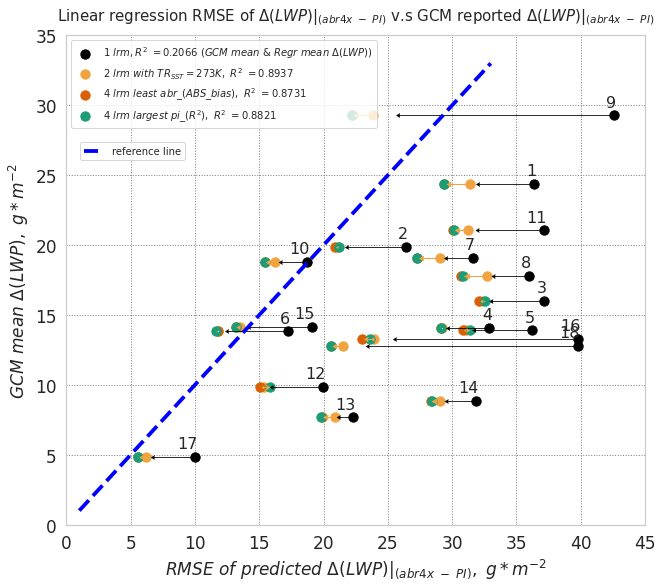

In [130]:
## PLot6(Alternate):
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 17, 'legend.fontsize': 10, 
       'axes.titlesize': 16, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


fig6  = plt.figure(figsize =(10.37, 9.0))  # (16.2, 9.3))
ax6  = plt.axes()

# x = arange(0.003, 0.018, 0.001)   #..15 yr
# x = arange(0.006, 0.032, 0.001)   #..150yrs
x   = linspace(0.001, 0.033, 18) * 1000.   # for all
y   = x
# deck_marker = [',', '.', 'v', '^', '<', '>', 'o', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# output_dabr_pi_obspredi  = {}

output_mons = {}

regr_data_0K =   []
report_data_0K =   []
regr_data_273K = []
report_data_273K = []
regr_data_leastabrbias = []
report_data_leastabrbias = []
regr_data_largestpiR2 = []
report_data_largestpiR2 = []

yr   =  150
# plt.gcf()

plot_scat1 = []
plot_scat2 = []
plot_scat3 = []
plot_scat4 = []


for a in range(len(deck2)):    
    
    output_mons[deck_nas2[a]]  = arange(shape_mon_modelabr[deck_nas2[a]])   #..how many years for collected 'abrupt-4x' data

    scp1 = ax6.scatter(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], s=87, marker ='o', color="black") # black
    regr_data_0K = append(regr_data_0K, output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'])
    report_data_0K = append(report_data_0K, output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'])
    # scatter group1
    plot_scat1.append(scp1)
    
    scp2 = ax6.scatter(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'], s=87, marker ='o', color="#f1a340") # yellow
    regr_data_273K = append(regr_data_273K, output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'])
    report_data_273K = append(report_data_273K, output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'])
    # scatter group2
    plot_scat2.append(scp2)
    
    scp3 = ax6.scatter(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'], s=87, marker = 'o', color="#d95f02")# red
    regr_data_leastabrbias = append(regr_data_leastabrbias, output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'])
    report_data_leastabrbias = append(report_data_leastabrbias, output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'])
    # scatter group3
    plot_scat3.append(scp3)
    
    scp4 = ax6.scatter(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'], s=87, marker ='o', color="#1b9e77") # green
    regr_data_largestpiR2 = append(regr_data_largestpiR2, output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'])
    report_data_largestpiR2 = append(report_data_largestpiR2, output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'])
    # scatter group4
    plot_scat4.append(scp4)
    
    
    # #.. Observation (MAC_LWP) calced sensitivity for each of GCMs
    # output_dabr_pi_obspredi[deck_nas2[a]]  = output_obsercoef_predi[deck_nas2[a]][shape_yr_modelPI[deck_nas2[a]]:] - mean(output_obsercoef_predi[deck_nas2[a]][0:shape_yr_modelPI[deck_nas[a]]])
    # plt.scatter(output_dabr_pi_obspredi[deck_nas2[a]][yr],  output_dabr_pi_report[deck_nas2[a]][yr] , s = 125., label = deck_nas2[a] + ' add OBS sensitivities')
    # h = append(h, output_dabr_pi_obspredi[deck_nas2[a]])
    
    # Add line/Arrows between scatter Point(S)
    # print()
    ax6.quiver(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], 
               1000.*(output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K'] - output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_0K']),
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K']),
              units='width', angles='xy', scale_units='xy', width=0.0014, scale = 1.10, color = "black", headwidth=6, zorder=2)

    ax6.quiver(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'], 
               1000.*(output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'] - output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K']), 
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'] - output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K']), 
              units='width', angles='xy', scale_units='xy', width=0.0016, scale = 1.09, color = "#f1a340", headwidth=6, zorder=4)

    ax6.quiver(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'], 
             1000.*(output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'] - output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K']), 
             1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2']-  output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K']), 
              units='width', angles='xy', scale_units='xy', width=0.0016, scale = 1.09, color=  "#f1a340", headwidth=6, zorder=3)

    # Add annotate to the first point of each GCM
    ax6.annotate(n_name[a], xy=(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K']), 
                 xytext=(2.69, 5.67), textcoords = "offset points", 
                 horizontalalignment= "right", verticalalignment = "bottom", fontsize = 16)


# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
# POPT_0K, POCV_0K  = curve_fit(target_func, regr_data_0K , report_data_0K)
# # Calc the R square, plot the fit line:
# calced_ydata_0K = target_func(regr_data_0K, *POPT_0K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
# R_square_0K  = calc_r2(regr_data_0K, report_data_0K)
# fitp1 = plt.plot(y, POPT_0K[0] * x + POPT_0K[1], label="1 lrm: "+r"$y = %.3f * x + %.4f,\ R^{2}= %.5f(regr&actual)$" % (POPT_0K[0], POPT_0K[1], R_square_0K), color="black", linewidth = 1.2, zorder = 4)

# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
# POPT_273K, POCV_273K  = curve_fit(target_func, regr_data_273K, report_data_273K)
# # Calc the R square, plot the fit line:
# calced_ydata_273K  = target_func(regr_data_273K, *POPT_273K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
# R_square_273K  = calc_r2(regr_data_273K, report_data_273K)
# fitp2 = plt.plot(y, POPT_273K[0] * x + POPT_273K[1], label="2 lrm: "+r"$y = %.3f * x %.4f,\ R^{2}= %.5f$"% (POPT_273K[0], POPT_273K[1], R_square_273K), color="#f1a340", linewidth = 0.7, zorder = 4)


# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model
# POPT_leastabrbias, POCV_leastabrbias  = curve_fit(target_func, regr_data_leastabrbias, report_data_leastabrbias)
# # Calc the R square, plot the fit line:
# calced_ydata_leastabrbias = target_func(regr_data_leastabrbias, *POPT_leastabrbias)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
# R_square_leastabrbias  = calc_r2(regr_data_leastabrbias, report_data_leastabrbias)
# fitp3 = plt.plot(y, POPT_leastabrbias[0] * x + POPT_leastabrbias[1], label="least abr_(ABS_bias): "+r"$y = %.3f * x %.4f,\ R^{2}= %.5f$"% (POPT_leastabrbias[0], POPT_leastabrbias[1], R_square_leastabrbias), color="#d95f02", linewidth = 0.7, zorder = 4)

# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
# POPT_largestpiR2, POCV_largestpiR2  = curve_fit(target_func, regr_data_largestpiR2, report_data_largestpiR2)
# # Calc the R square, plot the fit line:
# calced_ydata_largestpiR2 = target_func(regr_data_largestpiR2, *POPT_largestpiR2)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
# R_square_largestpiR2  = calc_r2(regr_data_largestpiR2, report_data_largestpiR2)
# fitp3 = plt.plot(y, POPT_largestpiR2[0] * x + POPT_largestpiR2[1], label= "largest PI_(R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.5f$"% (POPT_largestpiR2[0], POPT_largestpiR2[1], R_square_largestpiR2), color="#1b9e77", linewidth = 0.7, zorder = 4)

##### end fitting_line plot

# Add Reference line:
Reline = ax6.plot(x, y, label = 'reference line', c='blue', linestyle='--', linewidth = 3.8, zorder = 5)  # Blue


# Observational band:
# plt.plot(full(len(x), (min(h) - 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
# plt.plot(full(len(x), (max(h) + 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
plt.ylim([0., 35.])
plt.xlim([0., 45.])
plt.xlabel(r"$ RMSE\ of\ predicted\ \Delta (LWP)|_{(abr4x\ -\ PI)},\ $" + r"$g*m^{-2}$")
plt.ylabel(r"$ GCM\ mean\ \Delta (LWP),\ $" + r"$g*m^{-2}$")

plt.title("Linear regression RMSE of " +r"$\Delta (LWP)|_{(abr4x\ -\ PI)}$" + " v.s GCM reported " + r"$\Delta (LWP)|_{(abr4x\ -\ PI)}$",  fontsize =15, pad = 15.67)

legend62 = ax6.legend(loc = 'upper left', bbox_to_anchor = (0.015, 0.792))
legend61 = ax6.legend([scp1, scp2, scp3, scp4, Reline], [r"$1\ lrm,R^{2}\ =%.4f $" %R_square_0K + r"$\ (GCM\ mean\ &\ Regr\ mean\ \Delta (LWP)) $", r"$2\ lrm\ with\ TR_{SST}=273K,\ R^{2}\ =%.4f $" %R_square_273K, 
               r"$ 4\ lrm\ least\ abr\_(ABS\_bias),\ R^{2}\ =%.4f $" %R_square_leastabrbias, r"$ 4\ lrm\ largest\ pi\_ (R^{2}),\ R^{2}\ =%.4f $" %R_square_largestpiR2, r"$Reference\ Line$"], loc='upper left')

plt.gca().add_artist(legend62)

sns.set_style("whitegrid", {"grid.color": "gray", "grid.linestyle": ":"})

# plt.savefig("plot6_Scatter_0K&273K&Bestfit5&6_CompositeRMSE&d(LWP)_whole150yrs", dpi = 500)


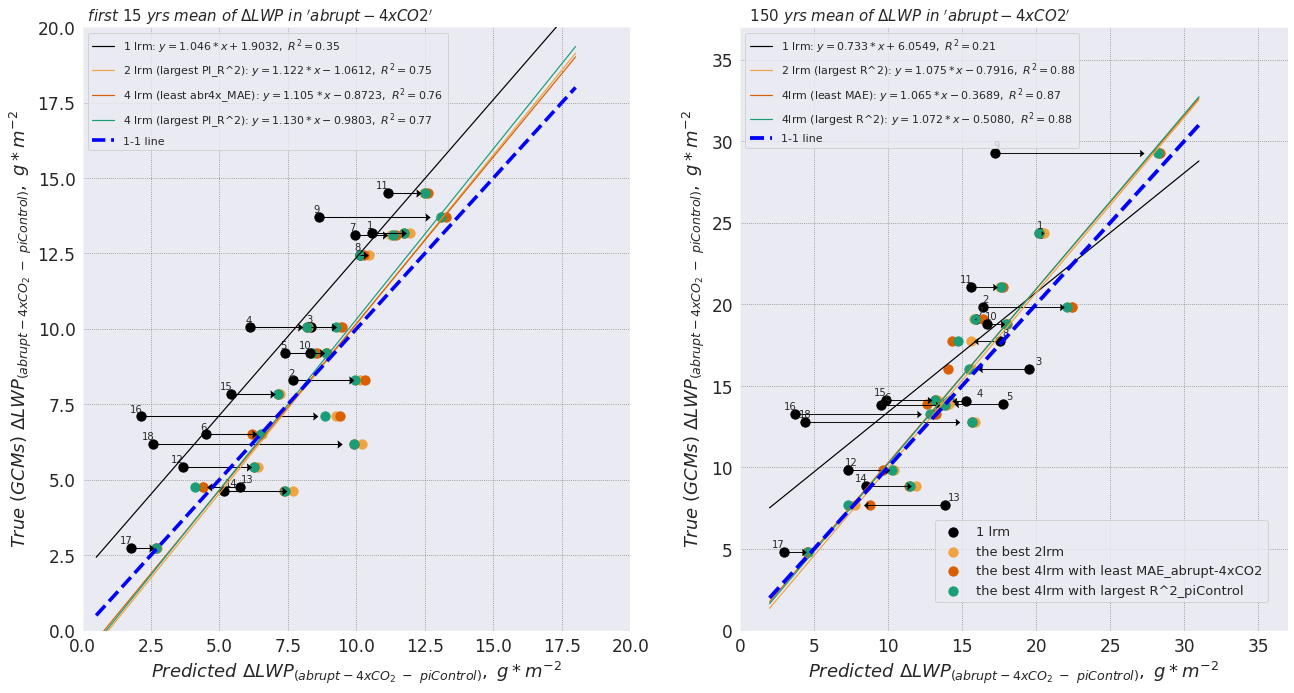

In [25]:
## PLot6:
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 18, 'legend.fontsize': 11, 
       'axes.titlesize': 17, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


fig6, ax6  = plt.subplots(1, 2, figsize =(21.6, 11.1))  # (16.2, 9.3))

x_15yr = linspace(0.0005, 0.018, 18) *1000.  #..15 yr
y_15yr = x_15yr
x   = linspace(0.002, 0.031, 18) * 1000.   # for all 150yr
y   = x

# deck_marker = [',', '.', 'v', '^', '<', '>', 'o', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# output_dabr_pi_obspredi  = {}

# 15yr 
regr_data_0K_15yr =   []
report_data_0K_15yr =   []
regr_data_273K_15yr = []
report_data_273K_15yr = []
regr_data_leastabrbias_15yr = []
report_data_leastabrbias_15yr = []
regr_data_largestpiR2_15yr = []
report_data_largestpiR2_15yr = []


# 150 yr
regr_data_0K =   []
report_data_0K =   []
regr_data_273K = []
report_data_273K = []
regr_data_leastabrbias = []
report_data_leastabrbias = []
regr_data_largestpiR2 = []
report_data_largestpiR2 = []

yr1   =  150
yr2   =  15
# plt.gcf()
output_mons   =  {}
plot_scat1 = []
plot_scat2 = []
plot_scat3 = []
plot_scat4 = []

plot_scat1_15yr = []
plot_scat2_15yr = []
plot_scat3_15yr = []
plot_scat4_15yr = []

# 150 yr
for a in range(len(deck2)):    
    
    output_mons[deck_nas2[a]]  = arange(shape_mon_modelabr[deck_nas2[a]])   #..how many years for collected 'abr-4x' data

    scp1 = ax6[1].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], s=86, marker ='o', color="black") # black
    regr_data_0K = append(regr_data_0K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'])
    report_data_0K = append(report_data_0K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'])
    # scatter group1
    plot_scat1.append(scp1)
    
    scp2 = ax6[1].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'], s=86, marker ='o', color="#f1a340") # yellow
    regr_data_273K = append(regr_data_273K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'])
    report_data_273K = append(report_data_273K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'])
    # scatter group2
    plot_scat2.append(scp2)
    
    scp3 = ax6[1].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'], s=86, marker = 'o', color="#d95f02")# red
    regr_data_leastabrbias = append(regr_data_leastabrbias, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'])
    report_data_leastabrbias = append(report_data_leastabrbias, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'])
    # scatter group3
    plot_scat3.append(scp3)
    
    scp4 = ax6[1].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'], s=86, marker ='o', color="#1b9e77") # green
    regr_data_largestpiR2 = append(regr_data_largestpiR2, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'])
    report_data_largestpiR2 = append(report_data_largestpiR2, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'])
    # scatter group4
    plot_scat4.append(scp4)
    
    
    # #.. Observation (MAC_LWP) calced sensitivity for each of GCMs
    # output_dabr_pi_obspredi[deck_nas2[a]]  = output_obsercoef_predi[deck_nas2[a]][shape_yr_modelPI[deck_nas2[a]]:] - mean(output_obsercoef_predi[deck_nas2[a]][0:shape_yr_modelPI[deck_nas[a]]])
    # plt.scatter(output_dabr_pi_obspredi[deck_nas2[a]][yr],  output_dabr_pi_report[deck_nas2[a]][yr] , s = 125., label = deck_nas2[a] + ' add OBS sensitivities')
    # h = append(h, output_dabr_pi_obspredi[deck_nas2[a]])
    
    # Add line/Arrows between scatter Point
    ax6[1].quiver(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], 
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K']),
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K']),
              units='width', angles='xy', scale_units='xy', width=0.0017, scale = 1.10, color = "black", headwidth=8, zorder=2)

    # Add annotate to the first point of each GCM
    ax6[1].annotate(n_name[a], xy=(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K']), 
                 xytext=(12.9*random.rand(1), 2.77), textcoords = "offset points", 
                 horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'] else "right", verticalalignment = "bottom")

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K, POCV_0K  = curve_fit(target_func, regr_data_0K , report_data_0K)
# Calc the R square, plot the fit line:
calced_ydata_0K = target_func(regr_data_0K, *POPT_0K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_0K  = calc_r2(regr_data_0K, report_data_0K)
fitp1 = ax6[1].plot(y, POPT_0K[0] * x + POPT_0K[1], label="1 lrm: "+r"$y = %.3f * x + %.4f,\ R^{2}= %.2f $" % (POPT_0K[0], POPT_0K[1], R_square_0K), color="black", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
POPT_273K, POCV_273K  = curve_fit(target_func, regr_data_273K, report_data_273K)
# Calc the R square, plot the fit line:
calced_ydata_273K  = target_func(regr_data_273K, *POPT_273K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_273K  = calc_r2(regr_data_273K, report_data_273K)
fitp2 = ax6[1].plot(y, POPT_273K[0] * x + POPT_273K[1], label="2 lrm (largest R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_273K[0], POPT_273K[1], R_square_273K), color="#f1a340", linewidth = 1.2, zorder = 4)


#.. linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model
POPT_leastabrbias, POCV_leastabrbias  = curve_fit(target_func, regr_data_leastabrbias, report_data_leastabrbias)
# Calc the R square, plot the fit line:
calced_ydata_leastabrbias = target_func(regr_data_leastabrbias, *POPT_leastabrbias)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_leastabrbias  = calc_r2(regr_data_leastabrbias, report_data_leastabrbias)
fitp3 = ax6[1].plot(y, POPT_leastabrbias[0] * x + POPT_leastabrbias[1], label="4lrm (least MAE): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_leastabrbias[0], POPT_leastabrbias[1], R_square_leastabrbias), color="#d95f02", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
POPT_largestpiR2, POCV_largestpiR2  = curve_fit(target_func, regr_data_largestpiR2, report_data_largestpiR2)
# Calc the R square, plot the fit line:
calced_ydata_largestpiR2 = target_func(regr_data_largestpiR2, *POPT_largestpiR2)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_largestpiR2  = calc_r2(regr_data_largestpiR2, report_data_largestpiR2)
fitp3 = ax6[1].plot(y, POPT_largestpiR2[0] * x + POPT_largestpiR2[1], label= "4lrm (largest R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_largestpiR2[0], POPT_largestpiR2[1], R_square_largestpiR2), color="#1b9e77", linewidth = 1.2, zorder = 4)

###### end fitting_line plot

# Add Reference line:
Refp  = ax6[1].plot(x, y, label = "1-1 line", c='blue', linestyle= '--', linewidth = 3.8, zorder = 5)  # Blue


# Observational band:
# plt.plot(full(len(x), (min(h) - 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
# plt.plot(full(len(x), (max(h) + 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
ax6[1].set_xlim([0., 37.])
ax6[1].set_ylim([0., 37.])

ax6[1].set_xlabel(r"$ Predicted\ \Delta LWP_{(abrupt-4xCO_{2}\ -\ piControl)},\ $" + r"$g*m^{-2}$")
ax6[1].set_ylabel(r"$ True\ (GCMs)\ \Delta LWP_{(abrupt-4xCO_{2}\ -\ piControl)},\ $" + r"$g*m^{-2}$")

ax6[1].set_title( r"$\ \ %d\ yrs\ mean\ of\ \Delta LWP\ in\ 'abrupt-4xCO2'$"%(yr1) , loc ='left', fontsize =15)
legend61 = ax6[1].legend([scp1, scp2, scp3, scp4], ['1 lrm', 'the best 2lrm', 'the best 4lrm with least MAE_abrupt-4xCO2', 'the best 4lrm with largest R^2_piControl'], 
                    loc='lower right', bbox_to_anchor=(0.975, 0.036), fontsize= 13)
ax6[1].legend(loc='upper left')
ax6[1].add_artist(legend61)

sns.set_style("darkgrid", {"grid.color": "gray", "grid.linestyle": ":"})


# 15yr:

for a in range(len(deck2)):    
    

    scp1_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'], s=86, marker ='o', color="black") # black
    regr_data_0K_15yr = append(regr_data_0K_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'])
    report_data_0K_15yr = append(report_data_0K_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'])
    # scatter group1
    plot_scat1_15yr.append(scp1_15yr)
    
    scp2_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'], s=86, marker ='o', color="#f1a340") # yellow
    regr_data_273K_15yr = append(regr_data_273K_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'])
    report_data_273K_15yr = append(report_data_273K_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'])
    # scatter group2
    plot_scat2_15yr.append(scp2_15yr)
    
    scp3_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_leastabrbias'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_leastabrbias'], s=86, marker = 'o', color="#d95f02")# red
    regr_data_leastabrbias_15yr = append(regr_data_leastabrbias_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_leastabrbias'])
    report_data_leastabrbias_15yr = append(report_data_leastabrbias_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_leastabrbias'])
    # scatter group3
    plot_scat3_15yr.append(scp3_15yr)
    
    scp4_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_largestpiR2'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_largestpiR2'], s=86, marker ='o', color="#1b9e77") # green
    regr_data_largestpiR2_15yr = append(regr_data_largestpiR2_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_largestpiR2'])
    report_data_largestpiR2_15yr = append(report_data_largestpiR2_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_largestpiR2'])
    # scatter group4
    plot_scat4_15yr.append(scp4_15yr)
    
    
    # #.. Observation (MAC_LWP) calced sensitivity for each of GCMs
    # output_dabr_pi_obspredi[deck_nas2[a]]  = output_obsercoef_predi[deck_nas2[a]][shape_yr_modelPI[deck_nas2[a]]:] - mean(output_obsercoef_predi[deck_nas2[a]][0:shape_yr_modelPI[deck_nas[a]]])
    # plt.scatter(output_dabr_pi_obspredi[deck_nas2[a]][yr],  output_dabr_pi_report[deck_nas2[a]][yr] , s = 125., label = deck_nas2[a] + ' add OBS sensitivities')
    # h = append(h, output_dabr_pi_obspredi[deck_nas2[a]])
    
    # Add line/Arrows between scatter Point(S)
    # print()
    ax6[0].quiver(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'], 
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K']),
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K']),
              units='width', angles='xy', scale_units='xy', width=0.0019, scale = 1.10, color = "black", headwidth=8, zorder=2)

    # Add annotate to the first point of each GCM
    ax6[0].annotate(n_name[a], xy=(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K']), 
                 xytext=(1.3, 2.37), textcoords = "offset points", 
                 horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'] else "right", verticalalignment = "bottom") #  arrowprops=dict(facecolor='black', shrink=0.95)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K_15yr, POCV_0K_15yr  = curve_fit(target_func, regr_data_0K_15yr , report_data_0K_15yr)
# Calc the R square, plot the fit line:
R_square_0K_15yr  = calc_r2(regr_data_0K_15yr, report_data_0K_15yr)
fitp1_15yr = ax6[0].plot(y_15yr, POPT_0K_15yr[0] * x_15yr + POPT_0K_15yr[1], label="1 lrm: "+r"$y = %.3f * x + %.4f,\ R^{2}= %.2f $" % (POPT_0K_15yr[0], POPT_0K_15yr[1], R_square_0K_15yr), color="black", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
POPT_273K_15yr, POCV_273K_15yr  = curve_fit(target_func, regr_data_273K_15yr, report_data_273K_15yr)
# Calc the R square, plot the fit line:
R_square_273K_15yr  = calc_r2(regr_data_273K_15yr, report_data_273K_15yr)
fitp2_15yr = ax6[0].plot(y_15yr, POPT_273K_15yr[0] * x_15yr + POPT_273K_15yr[1], label="2 lrm (largest PI_R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_273K_15yr[0], POPT_273K_15yr[1], R_square_273K_15yr), color="#f1a340", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model
POPT_leastabrbias_15yr, POCV_leastabrbias_15yr  = curve_fit(target_func, regr_data_leastabrbias_15yr, report_data_leastabrbias_15yr)
# Calc the R square, plot the fit line:
R_square_leastabrbias_15yr  = calc_r2(regr_data_leastabrbias_15yr, report_data_leastabrbias_15yr)
fitp3_15yr = ax6[0].plot(y_15yr, POPT_leastabrbias_15yr[0] * x_15yr + POPT_leastabrbias_15yr[1], label="4 lrm (least abr4x_MAE): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_leastabrbias_15yr[0], POPT_leastabrbias_15yr[1], R_square_leastabrbias_15yr), color="#d95f02", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
POPT_largestpiR2_15yr, POCV_largestpiR2_15yr  = curve_fit(target_func, regr_data_largestpiR2_15yr, report_data_largestpiR2_15yr)
# Calc the R square, plot the fit line:
R_square_largestpiR2_15yr  = calc_r2(regr_data_largestpiR2_15yr, report_data_largestpiR2_15yr)
fitp3_15yr = ax6[0].plot(y_15yr, POPT_largestpiR2_15yr[0] * x_15yr + POPT_largestpiR2_15yr[1], label= "4 lrm (largest PI_R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_largestpiR2_15yr[0], POPT_largestpiR2_15yr[1], R_square_largestpiR2_15yr), color="#1b9e77", linewidth = 1.2, zorder = 4)

###### end fitting_line plot

# Add Reference line:
Refp  = ax6[0].plot(x_15yr, y_15yr, label = "1-1 line", c='blue', linestyle= '--', linewidth = 3.6, zorder = 5)  # Blue


# Observational band:
# plt.plot(full(len(x), (min(h) - 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
# plt.plot(full(len(x), (max(h) + 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)

ax6[0].set_xlim([0., 20.])
ax6[0].set_ylim([0., 20.])


ax6[0].set_xlabel(r"$ Predicted\ \Delta LWP_{(abrupt-4xCO_{2}\ -\ piControl)},\ $" + r"$g*m^{-2}$")
ax6[0].set_ylabel(r"$ True\ (GCMs)\ \Delta LWP_{(abrupt-4xCO_{2}\ -\ piControl)},\ $" + r"$g*m^{-2}$")

ax6[0].set_title( r"$\ first\ %d\ yrs\ mean\ of\ \Delta LWP\ in\ 'abrupt-4xCO2'$"%(yr2) , loc ='left', fontsize =15)
legend62 = ax6[0].legend([scp1_15yr, scp2_15yr, scp3_15yr, scp4_15yr], ['1 lrm', 'the best 2lrm', 'the best 4lrm with least MAE_abrupt-4xCO2', 'the best 4lrm with largest R^2_piControl'], 
                    loc='lower right', bbox_to_anchor=(0.985, 0.086), fontsize= 13)
ax6[0].legend(loc='upper left')
# ax6[0].add_artist(legend62)

plt.savefig('may3rd_plotScatters', dpi = 400)
